### This Jupyter notebook describes the step to merge all the hyperspectral informations collected on the field and agronomic treatments and measurements over 3 sites (Changins (CH), Goumoens (GO) and Reckenholz (RE) and 2 years (2021 and 2022)

#### At the end there are some data visualization to understand a little bit the data that we are dealing with

#### 1) Load library

In [13]:
# Load the needed python libraries 
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io
import os

import seaborn as sns
import statsmodels.api as sm
from scipy import stats

#### 2) Load a list containing all the hyperspectral measurement by dates and sites

###### Note: the csv files should be loaded on your local jupyter environment

In [2]:
#### Load a list with all the hyperspectral files ###

# Get the current directory
current_directory = os.getcwd()

# List all files in the directory starting with "WL"
file_list = [f for f in os.listdir(current_directory) if f.startswith("WL")]

# Display the list of files
file_list

['WL_20210219_CH.csv',
 'WL_20210310_CH.csv',
 'WL_20210310_GO.csv',
 'WL_20210319_CH.csv',
 'WL_20210322_GO.csv',
 'WL_20210323_RE.csv',
 'WL_20210331_CH.csv',
 'WL_20210414_GO.csv',
 'WL_20210419_CH.csv',
 'WL_20210430_RE.csv',
 'WL_20210503_CH.csv',
 'WL_20210503_GO.csv',
 'WL_20210512_CH.csv',
 'WL_20210526_CH.csv',
 'WL_20210528_GO.csv',
 'WL_20210528_RE.csv',
 'WL_20210601_CH.csv',
 'WL_20210609_CH.csv',
 'WL_20210610_GO.csv',
 'WL_20210616_CH.csv',
 'WL_20210623_CH.csv',
 'WL_20210625_RE.csv',
 'WL_20210707_GO.csv',
 'WL_20210712_CH.csv',
 'WL_20220302_CH.csv',
 'WL_20220307_GO.csv',
 'WL_20220310_RE.csv',
 'WL_20220325_CH.csv',
 'WL_20220329_GO.csv',
 'WL_20220406_RE.csv',
 'WL_20220428_RE.csv',
 'WL_20220502_CH.csv',
 'WL_20220502_GO.csv',
 'WL_20220518_CH.csv',
 'WL_20220520_GO.csv',
 'WL_20220527_CH.csv',
 'WL_20220601_CH.csv',
 'WL_20220602_RE.csv',
 'WL_20220610_GO.csv',
 'WL_20220615_RE.csv',
 'WL_20220621_CH.csv',
 'WL_20220701_GO.csv',
 'WL_20220706_RE.csv',
 'WL_WholeS

#### 3) Organize the files according to sites (CH. GO and RE) by creating a list for each site

In [3]:
# Separate the files names according to site

# Separate the list into three lists based on the ending of each string
list_CH = [f for f in file_list if f.endswith('CH.csv')]
list_GO = [f for f in file_list if f.endswith('GO.csv')]
list_RE = [f for f in file_list if f.endswith('RE.csv')]

# Display the lists
list_CH, list_GO, list_RE

(['WL_20210219_CH.csv',
  'WL_20210310_CH.csv',
  'WL_20210319_CH.csv',
  'WL_20210331_CH.csv',
  'WL_20210419_CH.csv',
  'WL_20210503_CH.csv',
  'WL_20210512_CH.csv',
  'WL_20210526_CH.csv',
  'WL_20210601_CH.csv',
  'WL_20210609_CH.csv',
  'WL_20210616_CH.csv',
  'WL_20210623_CH.csv',
  'WL_20210712_CH.csv',
  'WL_20220302_CH.csv',
  'WL_20220325_CH.csv',
  'WL_20220502_CH.csv',
  'WL_20220518_CH.csv',
  'WL_20220527_CH.csv',
  'WL_20220601_CH.csv',
  'WL_20220621_CH.csv'],
 ['WL_20210310_GO.csv',
  'WL_20210322_GO.csv',
  'WL_20210414_GO.csv',
  'WL_20210503_GO.csv',
  'WL_20210528_GO.csv',
  'WL_20210610_GO.csv',
  'WL_20210707_GO.csv',
  'WL_20220307_GO.csv',
  'WL_20220329_GO.csv',
  'WL_20220502_GO.csv',
  'WL_20220520_GO.csv',
  'WL_20220610_GO.csv',
  'WL_20220701_GO.csv'],
 ['WL_20210323_RE.csv',
  'WL_20210430_RE.csv',
  'WL_20210528_RE.csv',
  'WL_20210625_RE.csv',
  'WL_20220310_RE.csv',
  'WL_20220406_RE.csv',
  'WL_20220428_RE.csv',
  'WL_20220602_RE.csv',
  'WL_20220615

#### 4) Merge the hyperspectral information for each survey date for Changins

In [4]:
# Initialize an empty dataframe to store the concatenated result
WL_CH = pd.DataFrame()

# Process each file in the list
for file_name in list_CH:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name,  sep=";")
    print(file_name)
    print(df.head())
    print(WL_CH)

    
    # Extract the date (assuming the date is in YYYYMMDD format within the filename)
    date_str = file_name[3:-7]  # Extract YYYYMMDD from the filename
    
    # Add a new column "date" to the dataframe
    df['date'] = date_str
    
    # Extract the last two letters before ".csv" (e.g., "CH", "GO", "RE")
    site = file_name[12:-4]
    
    # Add a new column "site" to the dataframe
    df['site'] = site
    
    # Concatenate the current dataframe to the final dataframe
    WL_CH = pd.concat([WL_CH, df], axis=0, ignore_index=True)

# Display the final concatenated dataframe
print(WL_CH)

# Optionally, save the final concatenated DataFrame to a new CSV file
# final_df.to_csv('final_combined.csv', index=False)

WL_20210219_CH.csv
   ID   CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  \
0   1  Before1stN  0.046091  0.046062  0.046056  0.046075  0.046130  0.046203   
1   2  Before1stN  0.041327  0.041489  0.041671  0.041870  0.042087  0.042264   
2   3  Before1stN  0.042755  0.042691  0.042646  0.042616  0.042595  0.042603   
3   4  Before1stN  0.045935  0.045978  0.046029  0.046090  0.046152  0.046250   
4   5  Before1stN  0.044563  0.044477  0.044460  0.044484  0.044503  0.044559   

   rflt_356  rflt_357  ...  rflt_2491  rflt_2492  rflt_2493  rflt_2494  \
0  0.046288  0.046373  ...   1.194782   1.190672   1.118453   0.991645   
1  0.042406  0.042540  ...   1.199243   1.211974   1.192672   1.151842   
2  0.042642  0.042721  ...   0.210884   0.186621   0.181730   0.177406   
3  0.046371  0.046471  ...   1.297822   1.153841   0.988344   0.793460   
4  0.044651  0.044770  ...   1.777789   1.701089   1.544480   1.344946   

   rflt_2495  rflt_2496  rflt_2497  rflt_2498  rf

In [175]:
print(WL_CH)
print(WL_CH.head())

       ID      CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  \
0     1.0     Before1stN  0.046091  0.046062  0.046056  0.046075  0.046130   
1     2.0     Before1stN  0.041327  0.041489  0.041671  0.041870  0.042087   
2     3.0     Before1stN  0.042755  0.042691  0.042646  0.042616  0.042595   
3     4.0     Before1stN  0.045935  0.045978  0.046029  0.046090  0.046152   
4     5.0     Before1stN  0.044563  0.044477  0.044460  0.044484  0.044503   
...   ...            ...       ...       ...       ...       ...       ...   
1495  NaN  BeforeHarvest  0.059191  0.059121  0.059064  0.059029  0.059025   
1496  NaN  BeforeHarvest  0.056488  0.056488  0.056515  0.056572  0.056675   
1497  NaN  BeforeHarvest  0.041283  0.041262  0.041269  0.041301  0.041356   
1498  NaN  BeforeHarvest  0.042724  0.042724  0.042732  0.042759  0.042829   
1499  NaN  BeforeHarvest  0.055560  0.055523  0.055523  0.055563  0.055653   

      rflt_355  rflt_356  rflt_357  ...  rflt_2494  rflt_2495  

#### 5) Merge the hyperspectral information for each survey date for Goumoens

In [67]:
# Initialize an empty dataframe to store the concatenated result
WL_GO = pd.DataFrame()

# Process each file in the list
for file_name in list_GO:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name,  sep=";")
    print(file_name)
    print(df.head())
    
    # Extract the date (assuming the date is in YYYYMMDD format within the filename)
    date_str = file_name[3:-7]  # Extract YYYYMMDD from the filename
    
    # Add a new column "date" to the dataframe
    df['date'] = date_str
    
    # Extract the last two letters before ".csv" (e.g., "CH", "GO", "RE")
    site = file_name[12:-4]
    
    # Add a new column "site" to the dataframe
    df['site'] = site
    
    # Concatenate the current dataframe to the final dataframe
    WL_GO = pd.concat([WL_GO, df], axis=0, ignore_index=True)

# Display the final concatenated dataframe
print(WL_GO)

# Optionally, save the final concatenated DataFrame to a new CSV file
# final_df.to_csv('final_combined.csv', index=False)

WL_20210310_GO.csv
   ID  CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  \
0   1  After1stN  0.039125  0.039116  0.039132  0.039177  0.039266  0.039366   
1   2  After1stN  0.027250  0.027242  0.027230  0.027223  0.027239  0.027251   
2   3  After1stN  0.037270  0.037308  0.037369  0.037459  0.037605  0.037721   
3   4  After1stN  0.039040  0.039078  0.039141  0.039229  0.039345  0.039464   
4   5  After1stN  0.041552  0.041552  0.041561  0.041593  0.041678  0.041780   

   rflt_356  rflt_357  ...  rflt_2491  rflt_2492  rflt_2493  rflt_2494  \
0  0.039477  0.039604  ...   0.280386   0.336808   0.376384   0.403463   
1  0.027266  0.027305  ...   0.120822   0.115033   0.131796   0.153826   
2  0.037819  0.037966  ...   0.254345   0.251330   0.260566   0.279803   
3  0.039587  0.039720  ...   0.246010   0.236879   0.250105   0.264031   
4  0.041896  0.042040  ...   0.376004   0.366634   0.373483   0.381208   

   rflt_2495  rflt_2496  rflt_2497  rflt_2498  rflt_249

In [69]:
print(WL_GO)

      ID      CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  \
0    1.0      After1stN  0.039125  0.039116  0.039132  0.039177  0.039266   
1    2.0      After1stN  0.027250  0.027242  0.027230  0.027223  0.027239   
2    3.0      After1stN  0.037270  0.037308  0.037369  0.037459  0.037605   
3    4.0      After1stN  0.039040  0.039078  0.039141  0.039229  0.039345   
4    5.0      After1stN  0.041552  0.041552  0.041561  0.041593  0.041678   
..   ...            ...       ...       ...       ...       ...       ...   
970  NaN  BeforeHarvest  0.024434  0.024411  0.024395  0.024384  0.024376   
971  NaN  BeforeHarvest  0.022565  0.022544  0.022526  0.022510  0.022493   
972  NaN  BeforeHarvest  0.035397  0.035397  0.035397  0.035413  0.035472   
973  NaN  BeforeHarvest  0.040721  0.040693  0.040685  0.040700  0.040752   
974  NaN  BeforeHarvest  0.046816  0.046823  0.046835  0.046852  0.046866   

     rflt_355  rflt_356  rflt_357  ...  rflt_2494  rflt_2495  rflt_2496  \


#### 6) Merge the hyperspectral information for each survey date for Reckenholz

In [71]:
# Initialize an empty dataframe to store the concatenated result
WL_RE = pd.DataFrame()

# Process each file in the list
for file_name in list_RE:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_name,  sep=";")
    print(file_name)
    print(df.head())
    
    # Extract the date (assuming the date is in YYYYMMDD format within the filename)
    date_str = file_name[3:-7]  # Extract YYYYMMDD from the filename
    
    # Add a new column "date" to the dataframe
    df['date'] = date_str
    
    # Extract the last two letters before ".csv" (e.g., "CH", "GO", "RE")
    site = file_name[12:-4]
    
    # Add a new column "site" to the dataframe
    df['site'] = site
    
    # Concatenate the current dataframe to the final dataframe
    WL_RE = pd.concat([WL_RE, df], axis=0, ignore_index=True)

# Display the final concatenated dataframe
print(WL_RE)

# Optionally, save the final concatenated DataFrame to a new CSV file
# final_df.to_csv('final_combined.csv', index=False)

WL_20210323_RE.csv
   ID  CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  \
0   1  After1stN  0.019259  0.019352  0.019466  0.019583  0.019677  0.019750   
1   2  After1stN  0.027893  0.027869  0.027853  0.027852  0.027880  0.027917   
2   3  After1stN  0.019596  0.019571  0.019566  0.019565  0.019536  0.019513   
3   4  After1stN  0.021019  0.020962  0.020907  0.020860  0.020839  0.020793   
4   5  After1stN  0.022500  0.022513  0.022532  0.022551  0.022559  0.022567   

   rflt_356  rflt_357  ...  rflt_2491  rflt_2492  rflt_2493  rflt_2494  \
0  0.019807  0.019859  ...   2.071795   1.984163   1.724434   1.470386   
1  0.027961  0.028006  ...   1.094590   1.042803   1.109252   1.220449   
2  0.019499  0.019501  ...   0.372590   0.391032   0.409671   0.422001   
3  0.020731  0.020700  ...   1.265751   1.407797   1.475373   1.511810   
4  0.022573  0.022577  ...   0.272513   0.274125   0.256758   0.263167   

   rflt_2495  rflt_2496  rflt_2497  rflt_2498  rflt_249

In [73]:
print(WL_RE)

     ID      CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  \
0     1      After1stN  0.019259  0.019352  0.019466  0.019583  0.019677   
1     2      After1stN  0.027893  0.027869  0.027853  0.027852  0.027880   
2     3      After1stN  0.019596  0.019571  0.019566  0.019565  0.019536   
3     4      After1stN  0.021019  0.020962  0.020907  0.020860  0.020839   
4     5      After1stN  0.022500  0.022513  0.022532  0.022551  0.022559   
..   ..            ...       ...       ...       ...       ...       ...   
745  71  BeforeHarvest  0.028401  0.028376  0.028366  0.028367  0.028369   
746  72  BeforeHarvest  0.024849  0.024808  0.024783  0.024772  0.024768   
747  73  BeforeHarvest  0.011556  0.011533  0.011529  0.011534  0.011531   
748  74  BeforeHarvest  0.048255  0.048227  0.048212  0.048209  0.048212   
749  75  BeforeHarvest  0.029320  0.029301  0.029294  0.029297  0.029307   

     rflt_355  rflt_356  rflt_357  ...  rflt_2493  rflt_2494  rflt_2495  \
0    0.01975

#### 7) Merge the hyperspectral information for all sites

In [75]:
WL_WholeSites = pd.concat([WL_CH, WL_GO,WL_RE], axis=0, ignore_index=True, join='inner' )

In [77]:
WL_WholeSites

ID      CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  \
0      1.0     Before1stN  0.046091  0.046062  0.046056  0.046075  0.046130   
1      2.0     Before1stN  0.041327  0.041489  0.041671  0.041870  0.042087   
2      3.0     Before1stN  0.042755  0.042691  0.042646  0.042616  0.042595   
3      4.0     Before1stN  0.045935  0.045978  0.046029  0.046090  0.046152   
4      5.0     Before1stN  0.044563  0.044477  0.044460  0.044484  0.044503   
...    ...            ...       ...       ...       ...       ...       ...   
3220  71.0  BeforeHarvest  0.028401  0.028376  0.028366  0.028367  0.028369   
3221  72.0  BeforeHarvest  0.024849  0.024808  0.024783  0.024772  0.024768   
3222  73.0  BeforeHarvest  0.011556  0.011533  0.011529  0.011534  0.011531   
3223  74.0  BeforeHarvest  0.048255  0.048227  0.048212  0.048209  0.048212   
3224  75.0  BeforeHarvest  0.029320  0.029301  0.029294  0.029297  0.029307   

      rflt_355  rflt_356  rflt_357  ...  rflt_2493  rflt_2494  rflt_2495  \
0     0.046203  0.046288  0.046373  ...   1.118453   0.991645   0.781112   
1     0.042264  0.042406  0.042540  ...   1.192672   1.151842   1.095079   
2     0.042603  0.042642  0.042721  ...   0.181730   0.177406   0.145330   
3     0.046250  0.046371  0.046471  ...   0.988344   0.793460   0.499411   
4     0.044559  0.044651  0.044770  ...   1.544480   1.344946   1.096752   
...        ...       ...       ...  ...        ...        ...        ...   
3220  0.028383  0.028414  0.028477  ...   0.366227   0.343807   0.319107   
3221  0.024790  0.024834  0.024891  ...   0.273343   0.251954   0.223128   
3222  0.011535  0.011545  0.011559  ...   0.160152   0.192299   0.206990   
3223  0.048245  0.048307  0.048402  ...   0.445575   0.447846   0.435431   
3224  0.029320  0.029338  0.029367  ...   0.307671   0.298999   0.283127   

      rflt_2496  rflt_2497  rflt_2498  rflt_2499  rflt_2500      date  site  
0      0.555108   0.503799   0.595473   0.725592   0.898742  20210219    CH  
1      1.035165   1.025958   1.058941   1.061023   1.012180  20210219    CH  
2      0.117168   0.169604   0.290346   0.394486   0.466533  20210219    CH  
3      0.214361   0.235756   0.516004   0.717842   0.796984  20210219    CH  
4      0.852687   0.796600   0.899228   0.933204   0.854493  20210219    CH  
...         ...        ...        ...        ...        ...       ...   ...  
3220   0.289771   0.247909   0.194601   0.153819   0.125340  20220706    RE  
3221   0.193217   0.182453   0.187443   0.198498   0.216376  20220706    RE  
3222   0.213190   0.217898   0.219901   0.220887   0.222278  20220706    RE  
3223   0.414115   0.388644   0.358056   0.335172   0.322305  20220706    RE  
3224   0.264233   0.253166   0.248216   0.234852   0.210976  20220706    RE  

[3225 rows x 2155 columns]

#### 8) Create a colum year by extracting info from date column

In [79]:
# Create a new column "Year" by extracting the first 4 characters (YYYY) from the "Date" column
WL_WholeSites['Year'] = WL_WholeSites['date'].str[:4]
WL_WholeSites.head()

ID   CropStage  rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  \
0  1.0  Before1stN  0.046091  0.046062  0.046056  0.046075  0.046130   
1  2.0  Before1stN  0.041327  0.041489  0.041671  0.041870  0.042087   
2  3.0  Before1stN  0.042755  0.042691  0.042646  0.042616  0.042595   
3  4.0  Before1stN  0.045935  0.045978  0.046029  0.046090  0.046152   
4  5.0  Before1stN  0.044563  0.044477  0.044460  0.044484  0.044503   

   rflt_355  rflt_356  rflt_357  ...  rflt_2494  rflt_2495  rflt_2496  \
0  0.046203  0.046288  0.046373  ...   0.991645   0.781112   0.555108   
1  0.042264  0.042406  0.042540  ...   1.151842   1.095079   1.035165   
2  0.042603  0.042642  0.042721  ...   0.177406   0.145330   0.117168   
3  0.046250  0.046371  0.046471  ...   0.793460   0.499411   0.214361   
4  0.044559  0.044651  0.044770  ...   1.344946   1.096752   0.852687   

   rflt_2497  rflt_2498  rflt_2499  rflt_2500      date  site  Year  
0   0.503799   0.595473   0.725592   0.898742  20210219    CH  2021  
1   1.025958   1.058941   1.061023   1.012180  20210219    CH  2021  
2   0.169604   0.290346   0.394486   0.466533  20210219    CH  2021  
3   0.235756   0.516004   0.717842   0.796984  20210219    CH  2021  
4   0.796600   0.899228   0.933204   0.854493  20210219    CH  2021  

[5 rows x 2156 columns]

#### 9) Keep track of the merged hyperspectral dataset by saving it in the Jupyter environment

In [81]:
WL_WholeSites.to_csv('WL_WholeSites.csv', index=False)

#### 10) Load the agronomic treatments and measurements file for all sites and years

###### Note: you should have this file in your local jupyter environment

In [16]:
df_Agro_WA = pd.read_csv("Whole_Dataset_AgroMeasWA.csv",  sep=";")
print(df_Agro_WA)
print(df_Agro_WA.columns)

     ID          Experiment  Year  row  col Exp  Location site      Town  \
0     1  WheatAdvisor_exact  2020    1    1  WA      1260   CH  Changins   
1     2  WheatAdvisor_exact  2020    2    1  WA      1260   CH  Changins   
2     3  WheatAdvisor_exact  2020    3    1  WA      1260   CH  Changins   
3     4  WheatAdvisor_exact  2020    4    1  WA      1260   CH  Changins   
4     5  WheatAdvisor_exact  2020    4    2  WA      1260   CH  Changins   
..   ..                 ...   ...  ...  ...  ..       ...  ...       ...   
434  71  WheatAdvisor_exact  2021    1   18  WA      1260   CH  Changins   
435  72  WheatAdvisor_exact  2021    2   18  WA      1260   CH  Changins   
436  73  WheatAdvisor_exact  2021    3   18  WA      1260   CH  Changins   
437  74  WheatAdvisor_exact  2021    4   18  WA      1260   CH  Changins   
438  75  WheatAdvisor_exact  2021    5   18  WA      1260   CH  Changins   

        Variety  ... MeanMSR_Re717_BHPH  MeanLAIBHHPH MeanLAIBHPH  \
0     CH_Camedo  .

#### 11) Select the years of interest 

In [17]:
selected_factors = [2021,2022]

df_Agro_WA_2021_2022 = df_Agro_WA[df_Agro_WA['Year'].isin(selected_factors)]

# Print the shape of the subset DataFrame (18 varieties x 3 repetitions x 2 blocks = 120)
print(df_Agro_WA_2021_2022.head())

    ID          Experiment  Year  row  col Exp  Location site      Town  \
64   1  WheatAdvisor_exact  2021    1    1  WA      1376   GO  Goumoens   
65   2  WheatAdvisor_exact  2021    2    1  WA      1376   GO  Goumoens   
66   3  WheatAdvisor_exact  2021    3    1  WA      1376   GO  Goumoens   
67   4  WheatAdvisor_exact  2021    4    1  WA      1376   GO  Goumoens   
68   5  WheatAdvisor_exact  2021    5    1  WA      1376   GO  Goumoens   

       Variety  ... MeanMSR_Re717_BHPH  MeanLAIBHHPH MeanLAIBHPH  \
64  Montalbano  ...           1.447841      3.466667    3.726667   
65    CH_Claro  ...           0.759900      2.575556    2.746667   
66   CH_Camedo  ...           1.490450      3.678333    3.420833   
67     CH_Nara  ...           1.463113      3.584444    3.568333   
68       Runal  ...           0.815150      2.075000    2.079167   

    Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  R_NDRE717_BHHPH  \
64        20210528   0.563815      20210503&28&0610         0.552054

##### 12) You can reload the previously pre-processed merged hyperspectral file here

In [14]:
WL_WholeSites_Clean = pd.read_csv("WL_WholeSites.csv",  sep=";")
WL_WholeSites_Clean.head()

ID   CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  \
0   1  Before1stN  0.046567  0.046704  0.046859  0.047021  0.047168  0.047302   
1   2  Before1stN  0.042753  0.042765  0.042799  0.042936  0.043066  0.043191   
2   3  Before1stN  0.042900  0.043016  0.043135  0.043239  0.043332  0.043426   
3   4  Before1stN  0.046715  0.046834  0.046948  0.047058  0.047181  0.047306   
4   5  Before1stN  0.045033  0.045197  0.045369  0.045534  0.045663  0.045775   

   rflt_365  rflt_366  ...  rflt_2494  rflt_2495  rflt_2496  rflt_2497  \
0  0.047417  0.047545  ...   0.991645   0.781112   0.555108   0.503799   
1  0.043307  0.043424  ...   1.151842   1.095079   1.035165   1.025958   
2  0.043546  0.043660  ...   0.177406   0.145330   0.117168   0.169604   
3  0.047412  0.047560  ...   0.793460   0.499411   0.214361   0.235756   
4  0.045909  0.046005  ...   1.344946   1.096752   0.852687   0.796600   

   rflt_2498  rflt_2499  rflt_2500      date  site  Year  
0   0.595473   0.725592   0.898742  20210219    CH  2021  
1   1.058941   1.061023   1.012180  20210219    CH  2021  
2   0.290346   0.394486   0.466533  20210219    CH  2021  
3   0.516004   0.717842   0.796984  20210219    CH  2021  
4   0.899228   0.933204   0.854493  20210219    CH  2021  

[5 rows x 2147 columns]

#### 13) Merge the the agronomic file with hyperspectral file

In [18]:
# Merging the two dataframes on columns 'col1' and 'col2'
df_Agro_WA_2021_2022['Year'] = df_Agro_WA_2021_2022['Year'].astype(str)
WL_WholeSites_Clean['Year'] = WL_WholeSites_Clean['Year'].astype(str)


merged_df = pd.merge(WL_WholeSites_Clean, df_Agro_WA_2021_2022, on=['ID','site','Year'], how='inner')  # 'inner' for inner join

# Display the result
print(merged_df)

      ID      CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
0      1     Before1stN  0.046567  0.046704  0.046859  0.047021  0.047168   
1      2     Before1stN  0.042753  0.042765  0.042799  0.042936  0.043066   
2      3     Before1stN  0.042900  0.043016  0.043135  0.043239  0.043332   
3      4     Before1stN  0.046715  0.046834  0.046948  0.047058  0.047181   
4      5     Before1stN  0.045033  0.045197  0.045369  0.045534  0.045663   
...   ..            ...       ...       ...       ...       ...       ...   
2695  71  BeforeHarvest  0.028646  0.028764  0.028877  0.028959  0.029018   
2696  72  BeforeHarvest  0.025060  0.025159  0.025241  0.025287  0.025331   
2697  73  BeforeHarvest  0.011583  0.011602  0.011625  0.011650  0.011664   
2698  74  BeforeHarvest  0.048618  0.048745  0.048870  0.048979  0.049060   
2699  75  BeforeHarvest  0.029436  0.029460  0.029492  0.029545  0.029590   

      rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  

C:\Users\vuill\AppData\Local\Temp\ipykernel_20864\1612446323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Agro_WA_2021_2022['Year'] = df_Agro_WA_2021_2022['Year'].astype(str)


#### 14) Keep track of the final merged file  by saving it in the Jupyter environment

In [3]:
merged_df.to_csv('final_HS_Merged.csv', index=False)


NameError: name 'merged_df' is not defined

##### 15) You can reload the previously pre-processed final merged file here

In [23]:
final_HS_Merged = pd.read_csv("final_HS_Merged.csv",  sep=",")
merged_df=final_HS_Merged
final_HS_Merged.head()


C:\Users\vuill\AppData\Local\Temp\ipykernel_20864\2397024303.py:1: DtypeWarning: Columns (2259) have mixed types. Specify dtype option on import or set low_memory=False.
  final_HS_Merged = pd.read_csv("final_HS_Merged.csv",  sep=",")


ID   CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  \
0   1  Before1stN  0.046567  0.046704  0.046859  0.047021  0.047168  0.047302   
1   2  Before1stN  0.042753  0.042765  0.042799  0.042936  0.043066  0.043191   
2   3  Before1stN  0.042900  0.043016  0.043135  0.043239  0.043332  0.043426   
3   4  Before1stN  0.046715  0.046834  0.046948  0.047058  0.047181  0.047306   
4   5  Before1stN  0.045033  0.045197  0.045369  0.045534  0.045663  0.045775   

   rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  MeanLAIBHPH  \
0  0.047417  0.047545  ...            1.100238      3.367222     3.136667   
1  0.043307  0.043424  ...            0.416664      1.685556     1.465000   
2  0.043546  0.043660  ...            0.919589      2.987222     3.137500   
3  0.047412  0.047560  ...            0.939131      3.116111     2.858333   
4  0.045909  0.046005  ...            0.882945      2.810556     2.635000   

   Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  R_NDRE717_BHHPH  \
0        20210527   0.564690      20210518&27&0603         0.562016   
1        20210527   0.240186      20210518&27&0603         0.257691   
2        20210527   0.503334      20210518&27&0603         0.502541   
3        20210527   0.526015      20210518&27&0603         0.522559   
4        20210527   0.490496      20210518&27&0603         0.489624   

   YieldGrain0PercKgM2  HIgrain_g  Histraw_g  
0             0.708323       88.5       86.3  
1             0.319911       72.2      123.9  
2             0.665302       61.4       70.3  
3             0.586376       55.6       81.0  
4                  NaN       64.3       10.0  

[5 rows x 2285 columns]

#### 16) Choose to focus only on specific crop stage (heading) for the start of the project

In [25]:
df_heading = merged_df[merged_df['CropStage']=='Heading']
df_heading.head()

ID CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  \
450   1   Heading  0.018496  0.018435  0.018400  0.018405  0.018403  0.018397   
451   2   Heading  0.020588  0.020687  0.020785  0.020865  0.020946  0.021021   
452   3   Heading  0.011134  0.011124  0.011104  0.011091  0.011060  0.011027   
453   4   Heading  0.014384  0.014365  0.014328  0.014269  0.014220  0.014181   
454   5   Heading  0.031535  0.031565  0.031607  0.031671  0.031738  0.031801   

     rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  MeanLAIBHPH  \
450  0.018387  0.018440  ...            1.100238      3.367222     3.136667   
451  0.021073  0.021132  ...            0.416664      1.685556     1.465000   
452  0.011021  0.011047  ...            0.919589      2.987222     3.137500   
453  0.014157  0.014164  ...            0.939131      3.116111     2.858333   
454  0.031855  0.031862  ...            0.882945      2.810556     2.635000   

     Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  R_NDRE717_BHHPH  \
450        20210527   0.564690      20210518&27&0603         0.562016   
451        20210527   0.240186      20210518&27&0603         0.257691   
452        20210527   0.503334      20210518&27&0603         0.502541   
453        20210527   0.526015      20210518&27&0603         0.522559   
454        20210527   0.490496      20210518&27&0603         0.489624   

     YieldGrain0PercKgM2  HIgrain_g  Histraw_g  
450             0.708323       88.5       86.3  
451             0.319911       72.2      123.9  
452             0.665302       61.4       70.3  
453             0.586376       55.6       81.0  
454                  NaN       64.3       10.0  

[5 rows x 2285 columns]

In [11]:
df_heading['Year']

450     2021
451     2021
452     2021
453     2021
454     2021
        ... 
2545    2022
2546    2022
2547    2022
2548    2022
2549    2022
Name: Year, Length: 375, dtype: int64

#### 17) For further invesigation, create one df with only 2021 year

In [26]:
df_heading_2021 = df_heading[df_heading['Year']==2021]
df_heading_2021.head()

ID CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  \
450   1   Heading  0.018496  0.018435  0.018400  0.018405  0.018403  0.018397   
451   2   Heading  0.020588  0.020687  0.020785  0.020865  0.020946  0.021021   
452   3   Heading  0.011134  0.011124  0.011104  0.011091  0.011060  0.011027   
453   4   Heading  0.014384  0.014365  0.014328  0.014269  0.014220  0.014181   
454   5   Heading  0.031535  0.031565  0.031607  0.031671  0.031738  0.031801   

     rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  MeanLAIBHPH  \
450  0.018387  0.018440  ...            1.100238      3.367222     3.136667   
451  0.021073  0.021132  ...            0.416664      1.685556     1.465000   
452  0.011021  0.011047  ...            0.919589      2.987222     3.137500   
453  0.014157  0.014164  ...            0.939131      3.116111     2.858333   
454  0.031855  0.031862  ...            0.882945      2.810556     2.635000   

     Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  R_NDRE717_BHHPH  \
450        20210527   0.564690      20210518&27&0603         0.562016   
451        20210527   0.240186      20210518&27&0603         0.257691   
452        20210527   0.503334      20210518&27&0603         0.502541   
453        20210527   0.526015      20210518&27&0603         0.522559   
454        20210527   0.490496      20210518&27&0603         0.489624   

     YieldGrain0PercKgM2  HIgrain_g  Histraw_g  
450             0.708323       88.5       86.3  
451             0.319911       72.2      123.9  
452             0.665302       61.4       70.3  
453             0.586376       55.6       81.0  
454                  NaN       64.3       10.0  

[5 rows x 2285 columns]

#### 18) For further invesigation, create one df with only 2021 year and one site (Changins)

df_heading_2021_CH = df_heading_2021[df_heading_2021['site']=='CH']
print(df_heading_2021_CH.head())
print(df_heading_2021_CH.shape)

In [14]:
df_heading_2021_CH.columns

Index(['ID', 'CropStage', 'rflt_359', 'rflt_360', 'rflt_361', 'rflt_362',
       'rflt_363', 'rflt_364', 'rflt_365', 'rflt_366',
       ...
       'MeanMSR_Re717_BHPH', 'MeanLAIBHHPH', 'MeanLAIBHPH', 'Date_R_NDRE717',
       'R_NDRE717', 'Date_R_NDRE717_BHHPH', 'R_NDRE717_BHHPH',
       'YieldGrain0PercKgM2', 'HIgrain_g', 'Histraw_g'],
      dtype='object', length=2285)

#### 19) Store information of treatment as separated df

In [ ]:
cat_var= df_heading_2021_CH[['Variety','NTrt']]
cat_var

#### 20) For further invesigation, create one df with only hyperspectral info in 2021 year and Changins site

In [ ]:
WL_heading_2021_CH=df_heading_2021_CH.iloc[:,2:2144]   
WL_heading_2021_CH.head()

#### 21) For further invesigation, merged df with only hyperspectral info in 2021 year and Changins site with treatment info

In [17]:
merged_df_heading_2021_CH = pd.merge(WL_heading_2021_CH,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2021_CH.head()


rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  rflt_365  \
450  0.018496  0.018435  0.018400  0.018405  0.018403  0.018397  0.018387   
451  0.020588  0.020687  0.020785  0.020865  0.020946  0.021021  0.021073   
452  0.011134  0.011124  0.011104  0.011091  0.011060  0.011027  0.011021   
453  0.014384  0.014365  0.014328  0.014269  0.014220  0.014181  0.014157   
454  0.031535  0.031565  0.031607  0.031671  0.031738  0.031801  0.031855   

     rflt_366  rflt_367  rflt_368  ...  rflt_2493  rflt_2494  rflt_2495  \
450  0.018440  0.018525  0.018520  ...   1.581961   1.396175   1.250916   
451  0.021132  0.021188  0.021193  ...   2.709242   2.497226   2.356950   
452  0.011047  0.011089  0.011094  ...   0.075658   0.111415   0.137614   
453  0.014164  0.014190  0.014202  ...   2.136170   1.965117   1.682155   
454  0.031862  0.031833  0.031797  ...   2.530151   2.548726   2.548493   

     rflt_2496  rflt_2497  rflt_2498  rflt_2499  rflt_2500     Variety  NTrt  
450   1.105511   0.872317   0.564462   0.355053   0.268673     CH_Nara    N4  
451   2.202022   1.856865   1.350191   0.806330   0.143074    CH_Claro    N0  
452   0.149119   0.088025   0.000000   0.000000   0.064033       Runal    N1  
453   1.333840   1.004942   0.680806   0.348400   0.000000  Montalbano    N1  
454   2.491856   2.283583   1.939153   1.535481   1.027469     CH_Nara    N1  

[5 rows x 2144 columns]

#### 22) Explore data distribution of response variable of interest: grain yield

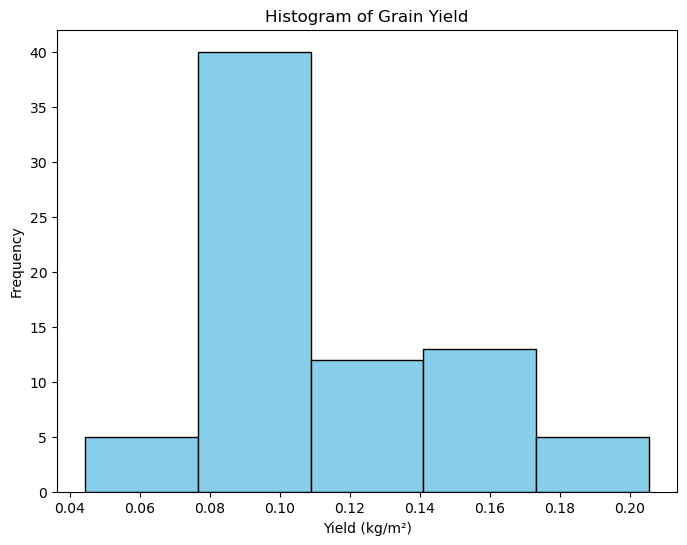

In [18]:
# Create a histogram for 'YieldGrain0PercKgM2'
plt.figure(figsize=(8, 6))
plt.hist(merged_df_heading_2021_CH['YieldGrain0PercKgM2'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Histogram of Grain Yield')
plt.xlabel('Yield (kg/m²)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### 23) Explore data distribution of one hyperspectral feature at 705 nm

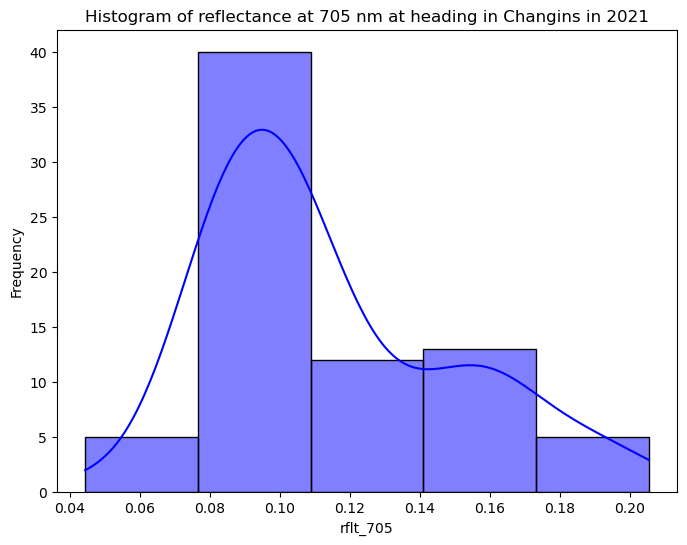

In [19]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(merged_df_heading_2021_CH['rflt_705'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of reflectance at 705 nm at heading in Changins in 2021')
plt.xlabel('rflt_705')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### 24) Explore data distribution of one hyperspectral feature at 740 nm

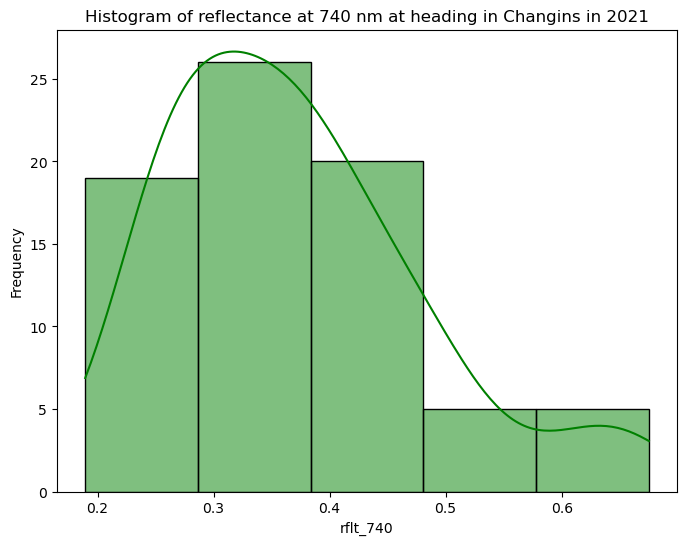

In [20]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(merged_df_heading_2021_CH['rflt_740'], bins=5, kde=True, color='green')

# Add labels and title
plt.title('Histogram of reflectance at 740 nm at heading in Changins in 2021')
plt.xlabel('rflt_740')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### 25) Make the same type of data exploration as before with a different crop stage : before 3rd Nitrogen application

In [21]:
df_Before3rdN= merged_df[merged_df['CropStage']=='Before3rdN']
df_Before3rdN.head()

ID   CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
225   1  Before3rdN  0.021327  0.021333  0.021355  0.021388  0.021405   
226   2  Before3rdN  0.023566  0.023573  0.023595  0.023660  0.023716   
227   3  Before3rdN  0.023962  0.024045  0.024139  0.024220  0.024297   
228   4  Before3rdN  0.022805  0.022816  0.022815  0.022801  0.022814   
229   5  Before3rdN  0.022119  0.022123  0.022133  0.022142  0.022151   

     rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
225  0.021431  0.021521  0.021581  ...            1.100238      3.367222   
226  0.023773  0.023845  0.023970  ...            0.416664      1.685556   
227  0.024383  0.024514  0.024568  ...            0.919589      2.987222   
228  0.022843  0.022866  0.022909  ...            0.939131      3.116111   
229  0.022171  0.022233  0.022305  ...            0.882945      2.810556   

     MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
225     3.136667        20210527   0.564690      20210518&27&0603   
226     1.465000        20210527   0.240186      20210518&27&0603   
227     3.137500        20210527   0.503334      20210518&27&0603   
228     2.858333        20210527   0.526015      20210518&27&0603   
229     2.635000        20210527   0.490496      20210518&27&0603   

     R_NDRE717_BHHPH  YieldGrain0PercKgM2  HIgrain_g  Histraw_g  
225         0.562016             0.708323       88.5       86.3  
226         0.257691             0.319911       72.2      123.9  
227         0.502541             0.665302       61.4       70.3  
228         0.522559             0.586376       55.6       81.0  
229         0.489624                  NaN       64.3       10.0  

[5 rows x 2285 columns]

In [22]:
df_Before3rdN_2021 = df_Before3rdN[df_Before3rdN['Year']==2021]
df_Before3rdN_2021.head()

df_Before3rdN_2021_CH = df_Before3rdN_2021[df_Before3rdN_2021['site']=='CH']
print(df_Before3rdN_2021_CH.head())
print(df_Before3rdN_2021_CH.shape)


     ID   CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
225   1  Before3rdN  0.021327  0.021333  0.021355  0.021388  0.021405   
226   2  Before3rdN  0.023566  0.023573  0.023595  0.023660  0.023716   
227   3  Before3rdN  0.023962  0.024045  0.024139  0.024220  0.024297   
228   4  Before3rdN  0.022805  0.022816  0.022815  0.022801  0.022814   
229   5  Before3rdN  0.022119  0.022123  0.022133  0.022142  0.022151   

     rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
225  0.021431  0.021521  0.021581  ...            1.100238      3.367222   
226  0.023773  0.023845  0.023970  ...            0.416664      1.685556   
227  0.024383  0.024514  0.024568  ...            0.919589      2.987222   
228  0.022843  0.022866  0.022909  ...            0.939131      3.116111   
229  0.022171  0.022233  0.022305  ...            0.882945      2.810556   

     MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
225     3.136667        20210527   

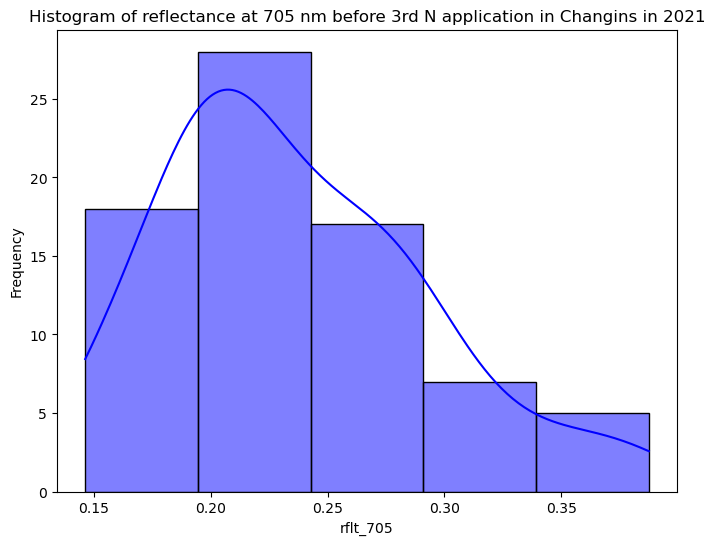

In [23]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_Before3rdN_2021_CH['rflt_705'], bins=5, kde=True, color='blue')

# Add labels and title
plt.title('Histogram of reflectance at 705 nm before 3rd N application in Changins in 2021')
plt.xlabel('rflt_705')
plt.ylabel('Frequency')

# Show the plot
plt.show()

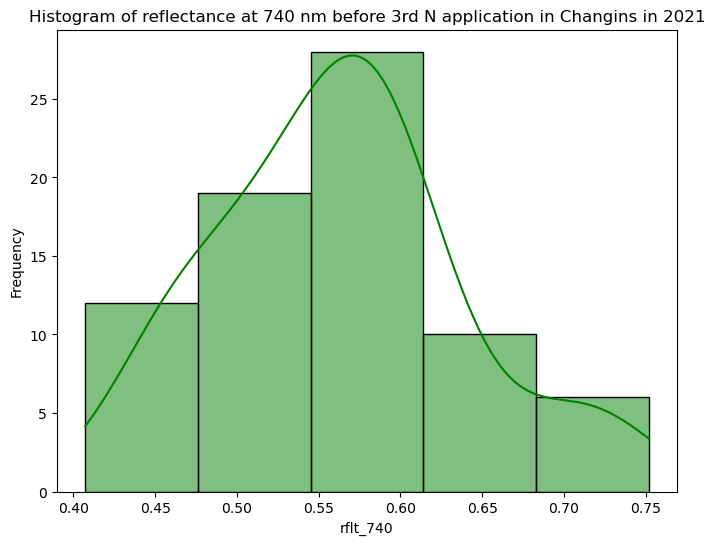

In [24]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_Before3rdN_2021_CH['rflt_740'], bins=5, kde=True, color='green')

# Add labels and title
plt.title('Histogram of reflectance at 740 nm before 3rd N application in Changins in 2021')
plt.xlabel('rflt_740')
plt.ylabel('Frequency')

# Show the plot
plt.show()

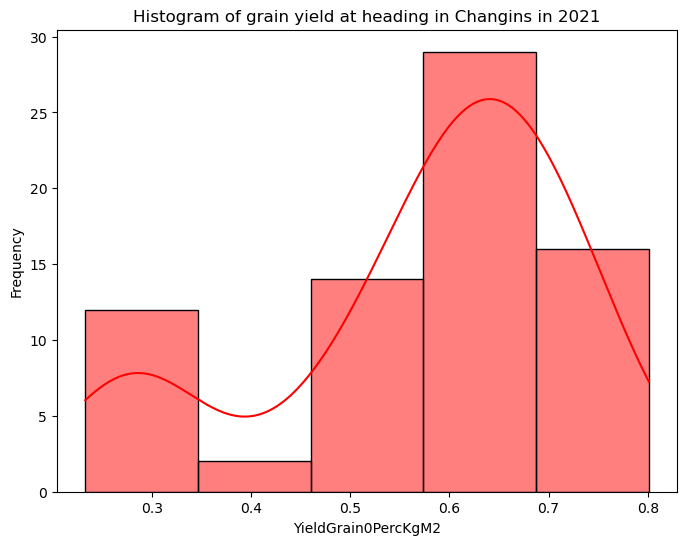

In [25]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_Before3rdN_2021_CH['YieldGrain0PercKgM2'], bins=5, kde=True, color='red')

# Add labels and title
plt.title('Histogram of grain yield at heading in Changins in 2021')
plt.xlabel('YieldGrain0PercKgM2')
plt.ylabel('Frequency')

# Show the plot
plt.show()

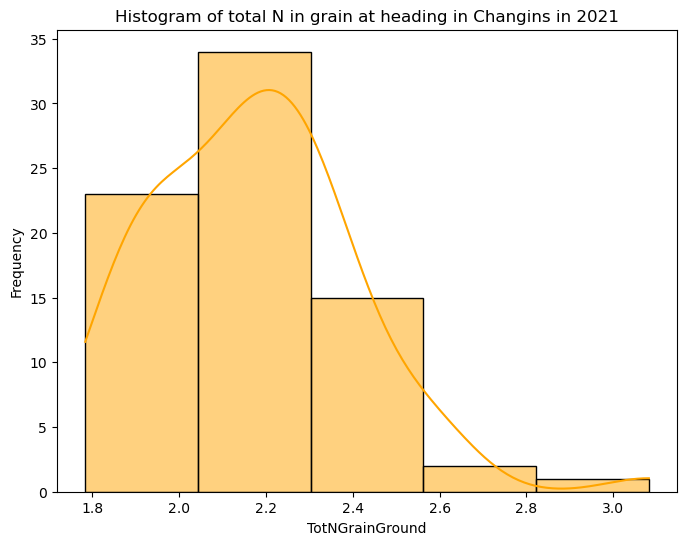

In [26]:
# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_Before3rdN_2021_CH['TotNGrainGround'], bins=5, kde=True, color='orange')

# Add labels and title
plt.title('Histogram of total N in grain at heading in Changins in 2021')
plt.xlabel('TotNGrainGround')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [36]:
merged_df_heading_2021_CH.head()

rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  rflt_365  \
450  0.018496  0.018435  0.018400  0.018405  0.018403  0.018397  0.018387   
451  0.020588  0.020687  0.020785  0.020865  0.020946  0.021021  0.021073   
452  0.011134  0.011124  0.011104  0.011091  0.011060  0.011027  0.011021   
453  0.014384  0.014365  0.014328  0.014269  0.014220  0.014181  0.014157   
454  0.031535  0.031565  0.031607  0.031671  0.031738  0.031801  0.031855   

     rflt_366  rflt_367  rflt_368  ...  rflt_2492  rflt_2493  rflt_2494  \
450  0.018440  0.018525  0.018520  ...   1.756079   1.581961   1.396175   
451  0.021132  0.021188  0.021193  ...   2.894421   2.709242   2.497226   
452  0.011047  0.011089  0.011094  ...   0.049697   0.075658   0.111415   
453  0.014164  0.014190  0.014202  ...   2.242716   2.136170   1.965117   
454  0.031862  0.031833  0.031797  ...   2.459479   2.530151   2.548726   

     rflt_2495  rflt_2496  rflt_2497  rflt_2498  rflt_2499  rflt_2500  NTrt  
450   1.250916   1.105511   0.872317   0.564462   0.355053   0.268673    N4  
451   2.356950   2.202022   1.856865   1.350191   0.806330   0.143074    N0  
452   0.137614   0.149119   0.088025   0.000000   0.000000   0.064033    N1  
453   1.682155   1.333840   1.004942   0.680806   0.348400   0.000000    N1  
454   2.548493   2.491856   2.283583   1.939153   1.535481   1.027469    N1  

[5 rows x 2143 columns]

#### 26) Drop the Variety treatment to visualize hyperspectral info according to N treatment

In [27]:
merged_df_heading_2021_CH.drop('Variety', axis=1, inplace=True)


<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_29464\1680784906.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


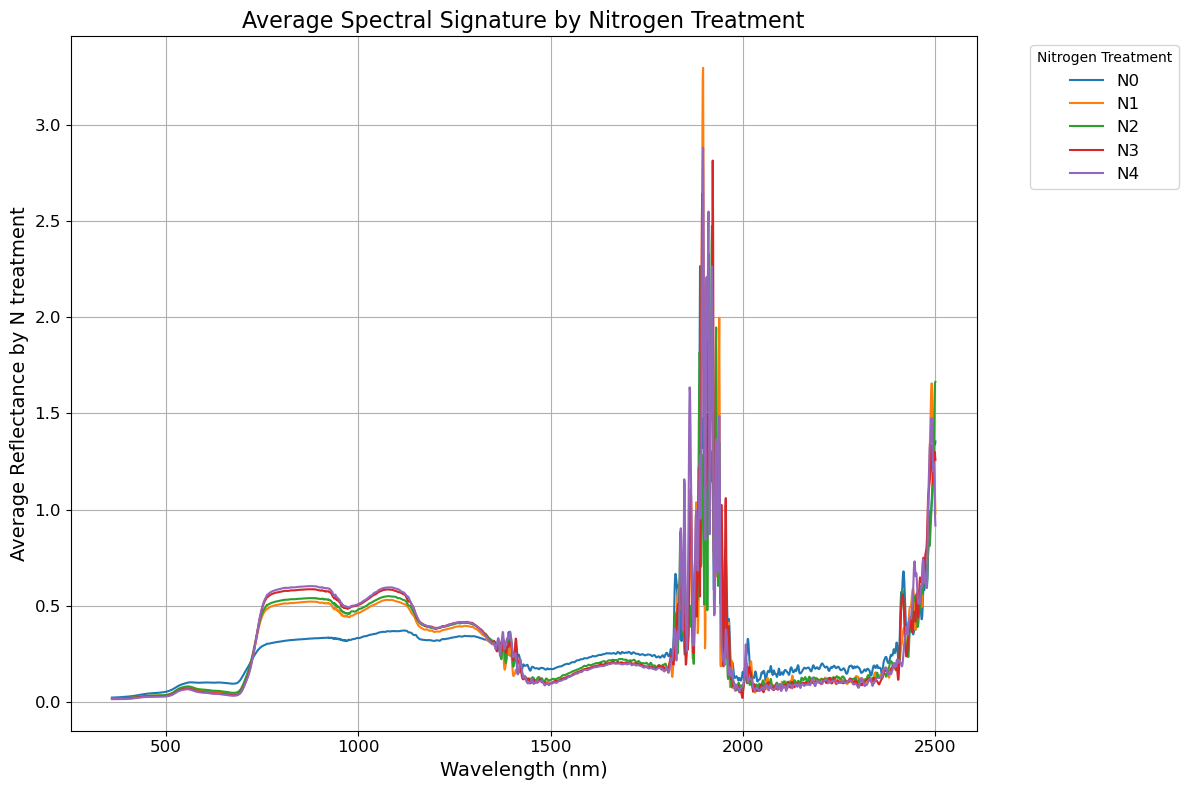

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_CH, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_melted.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



#### 27) Remove aberrant values to plot hyperspectral data

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_44712\1690419686.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: 

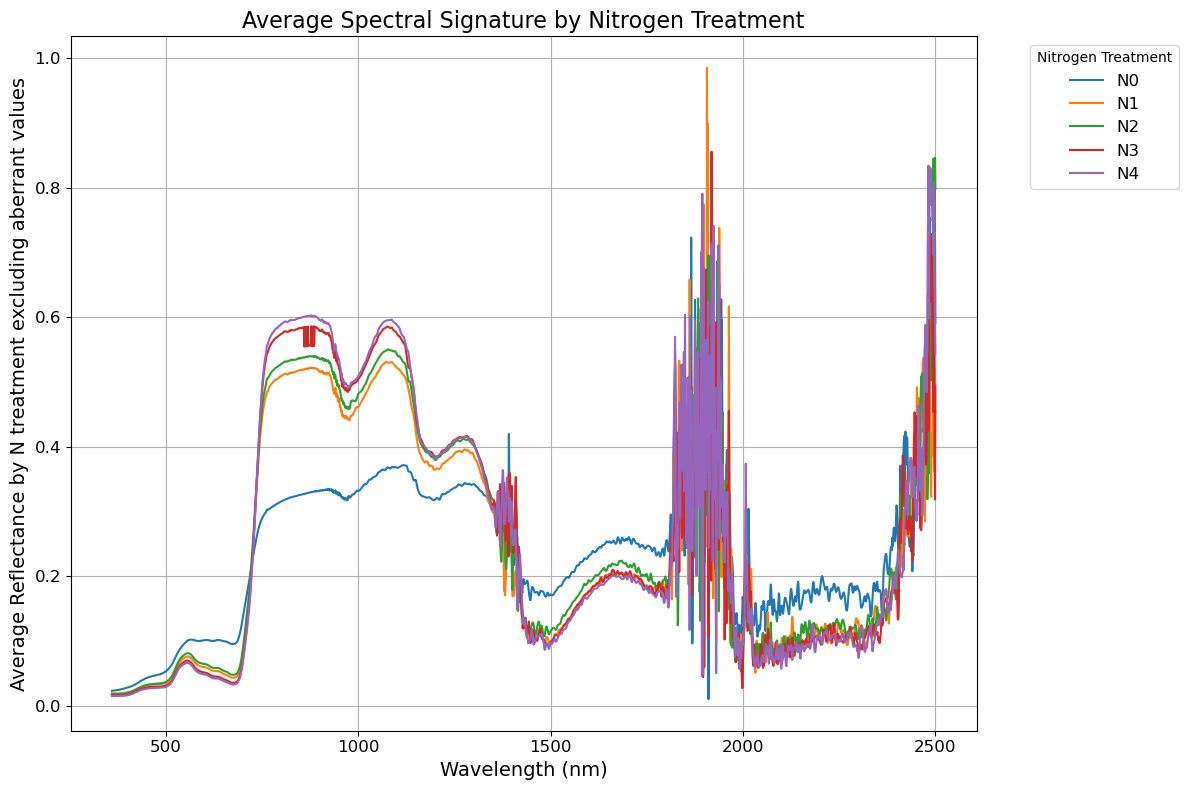

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_CH, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] > 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

#### 28) Drop the N treatment to visualize hyperspectral info according to variety treatment

In [255]:
merged_df_heading_2021_CH = pd.merge(WL_heading_2021_CH,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2021_CH.head()

merged_df_heading_2021_CH.drop('NTrt', axis=1, inplace=True)

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\3780508130.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: 

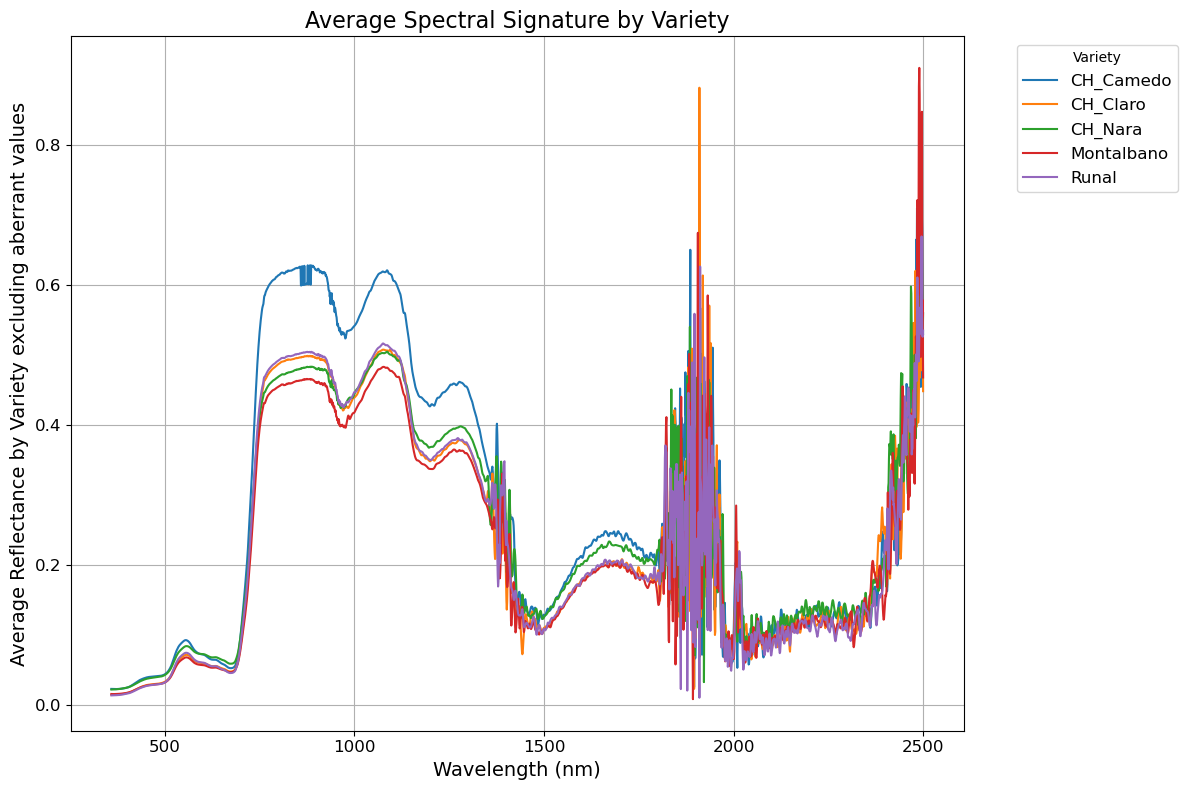

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_CH, id_vars=['Variety'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['Variety', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='Variety', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Variety', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by Variety excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

#### 28) Visualize hyperspectral signature according to specific site Goumoens and specific year 2021 according to N treatment

In [285]:
df_heading_2021_GO = df_heading_2021[df_heading_2021['site']=='GO']
print(df_heading_2021_GO.head())
print(df_heading_2021_GO.shape)
WL_heading_2021_GO=df_heading_2021_GO.iloc[:,2:2144]   
WL_heading_2021_GO.head()
cat_var= df_heading_2021_GO[['Variety','NTrt']]
cat_var
merged_df_heading_2021_GO = pd.merge(WL_heading_2021_GO,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2021_GO.head()

merged_df_heading_2021_GO.drop('Variety', axis=1, inplace=True)


      ID CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
1725   1   Heading  0.010548  0.010540  0.010521  0.010470  0.010418   
1726   2   Heading  0.022317  0.022329  0.022344  0.022376  0.022416   
1727   3   Heading  0.016106  0.016016  0.015931  0.015869  0.015819   
1728   4   Heading  0.013485  0.013465  0.013450  0.013445  0.013439   
1729   5   Heading  0.013277  0.013235  0.013204  0.013200  0.013217   

      rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
1725  0.010388  0.010426  0.010474  ...            1.447841      3.466667   
1726  0.022453  0.022468  0.022463  ...            0.759900      2.575556   
1727  0.015787  0.015781  0.015788  ...            1.490450      3.678333   
1728  0.013437  0.013458  0.013455  ...            1.463113      3.584444   
1729  0.013246  0.013283  0.013286  ...            0.815150      2.075000   

      MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
1725     3.726667        20210528 

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\1288493075.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: Whe

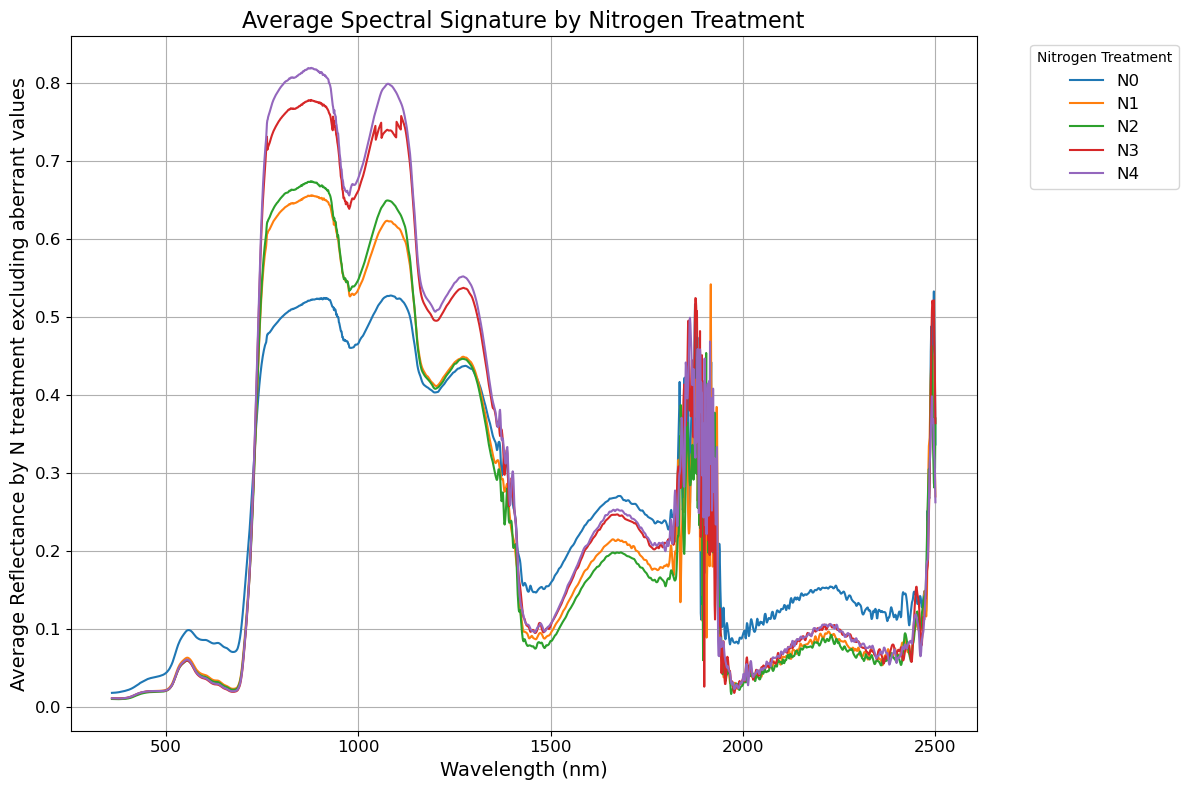

In [287]:
# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_GO, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()


#### 29) Visualize hyperspectral signature according to specific site Goumoens and specific year 2021 according to variety treatment

In [289]:
merged_df_heading_2021_GO = pd.merge(WL_heading_2021_GO,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2021_GO.head()

merged_df_heading_2021_GO.drop('NTrt', axis=1, inplace=True)

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\3286104875.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: 

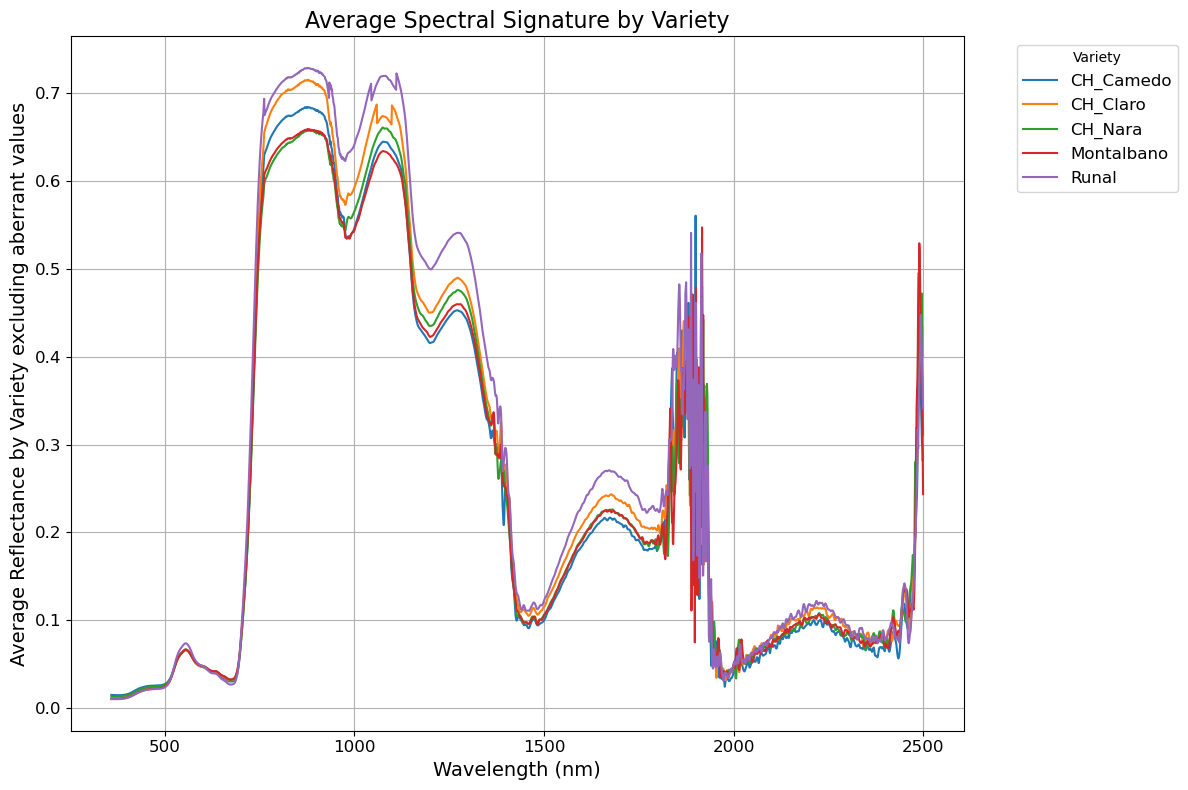

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_GO, id_vars=['Variety'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['Variety', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='Variety', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Variety', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by Variety excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

#### 30) Visualize hyperspectral signature according to specific site Reckenholz and specific year 2021 according to N treatment

In [315]:
df_heading_2021_RE = df_heading_2021[df_heading_2021['site']=='RE']
print(df_heading_2021_RE.head())
print(df_heading_2021_RE.shape)
WL_heading_2021_RE=df_heading_2021_RE.iloc[:,2:2144]   
WL_heading_2021_RE.head()
cat_var= df_heading_2021_RE[['Variety','NTrt']]
cat_var
merged_df_heading_2021_RE = pd.merge(WL_heading_2021_RE,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2021_RE.head()

merged_df_heading_2021_RE.drop('Variety', axis=1, inplace=True)

      ID CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
2100   1   Heading  0.018383  0.018301  0.018232  0.018173  0.018134   
2101   2   Heading  0.022152  0.022150  0.022145  0.022142  0.022153   
2102   3   Heading  0.018470  0.018511  0.018551  0.018586  0.018631   
2103   4   Heading  0.030668  0.030685  0.030716  0.030759  0.030817   
2104   5   Heading  0.024401  0.024418  0.024452  0.024515  0.024560   

      rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
2100  0.018122  0.018157  0.018158  ...            0.997020      2.090000   
2101  0.022169  0.022173  0.022142  ...            0.447049      1.527778   
2102  0.018683  0.018735  0.018808  ...            0.399923      1.699444   
2103  0.030875  0.030915  0.030922  ...            0.724845      1.384444   
2104  0.024605  0.024688  0.024770  ...            0.632754      1.817778   

      MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
2100     2.002500        20210528 

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\2377131731.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: Whe

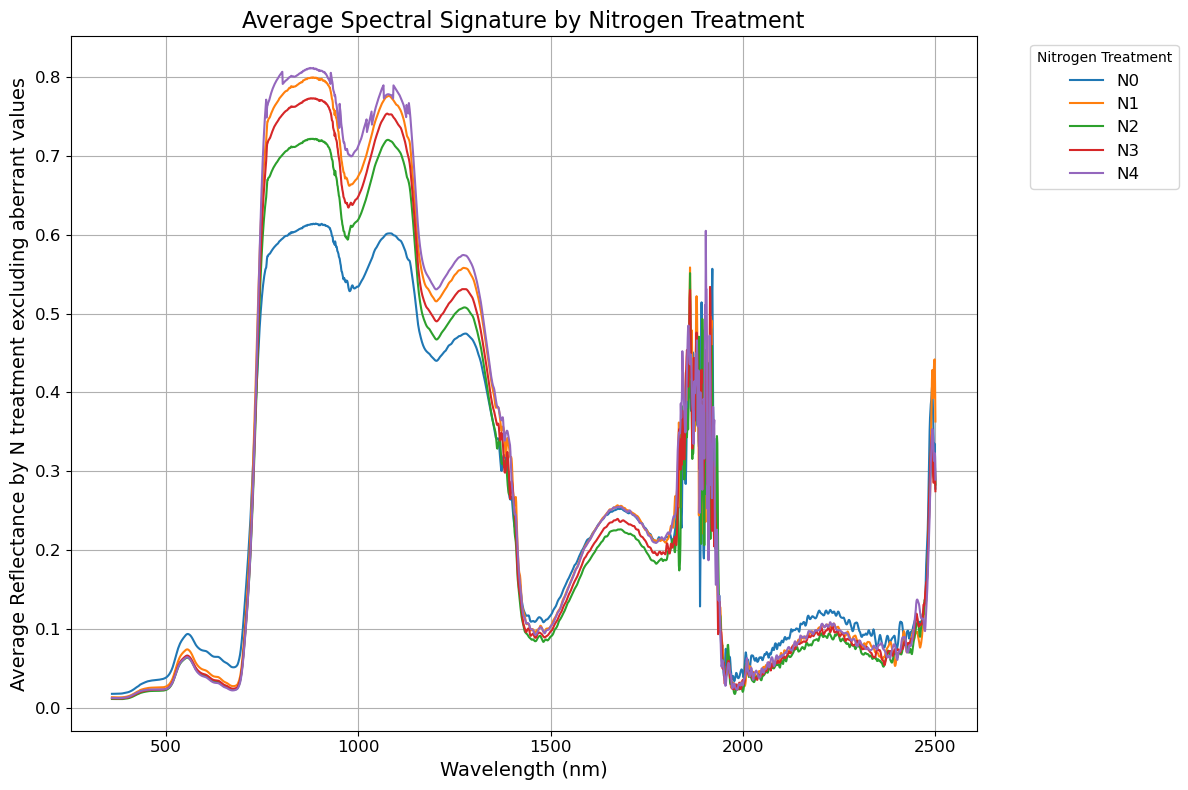

In [317]:
# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_RE, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()


#### 31) Visualize hyperspectral signature according to specific site Reckenholz and specific year 2021 according to variety treatment

In [319]:
merged_df_heading_2021_RE = pd.merge(WL_heading_2021_RE,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2021_RE.head()

merged_df_heading_2021_RE.drop('NTrt', axis=1, inplace=True)

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\843461116.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: W

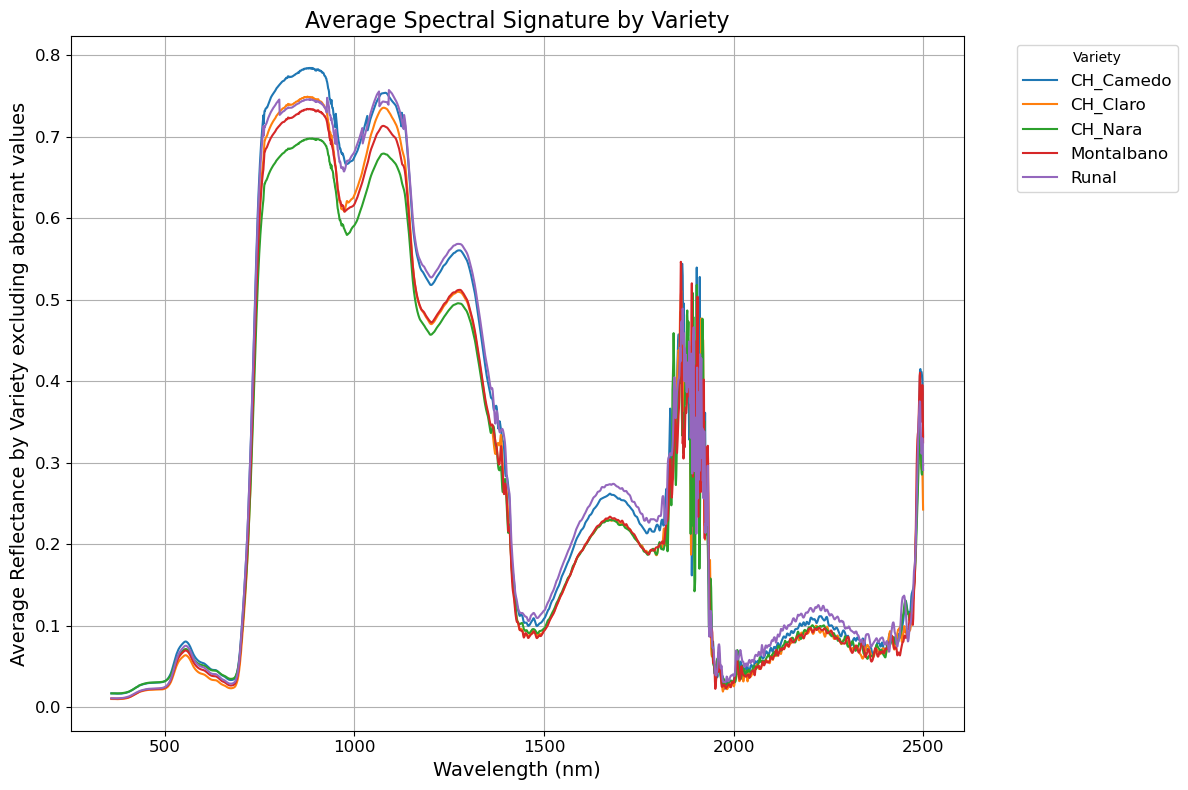

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2021_RE, id_vars=['Variety'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['Variety', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='Variety', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Variety', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by Variety excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

#### 32) Visualize hyperspectral signature according to specific site Reckenholz and specific year 2022 according to treatments

In [53]:
df_heading_2022 = df_heading[df_heading['Year']==2022]
df_heading_2022.head()
df_heading_2022_RE = df_heading_2022[df_heading_2022['site']=='RE']
print(df_heading_2022_RE.head())
print(df_heading_2022_RE.shape)
WL_heading_2022_RE=df_heading_2022_RE.iloc[:,2:2144]   
WL_heading_2022_RE.head()
cat_var= df_heading_2022_RE[['Variety','NTrt']]
cat_var
merged_df_heading_2022_RE = pd.merge(WL_heading_2022_RE,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2022_RE.head()

merged_df_heading_2022_RE.drop('NTrt', axis=1, inplace=True)

      ID CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
2475   1   Heading  0.020070  0.020060  0.020065  0.020094  0.020108   
2476   2   Heading  0.017096  0.017055  0.017029  0.017030  0.017017   
2477   3   Heading  0.033503  0.033485  0.033466  0.033439  0.033416   
2478   4   Heading  0.030966  0.030934  0.030909  0.030900  0.030868   
2479   5   Heading  0.028409  0.028406  0.028411  0.028415  0.028424   

      rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
2475  0.020105  0.020076  0.020059  ...            1.377281      3.970556   
2476  0.017003  0.017017  0.017023  ...            1.739574      5.281667   
2477  0.033403  0.033410  0.033411  ...            1.661352      6.208889   
2478  0.030824  0.030781  0.030741  ...            1.715107      4.337778   
2479  0.028432  0.028428  0.028427  ...            1.926628      6.517778   

      MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
2475     3.700833        20220602 

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_44712\3072242196.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: Whe

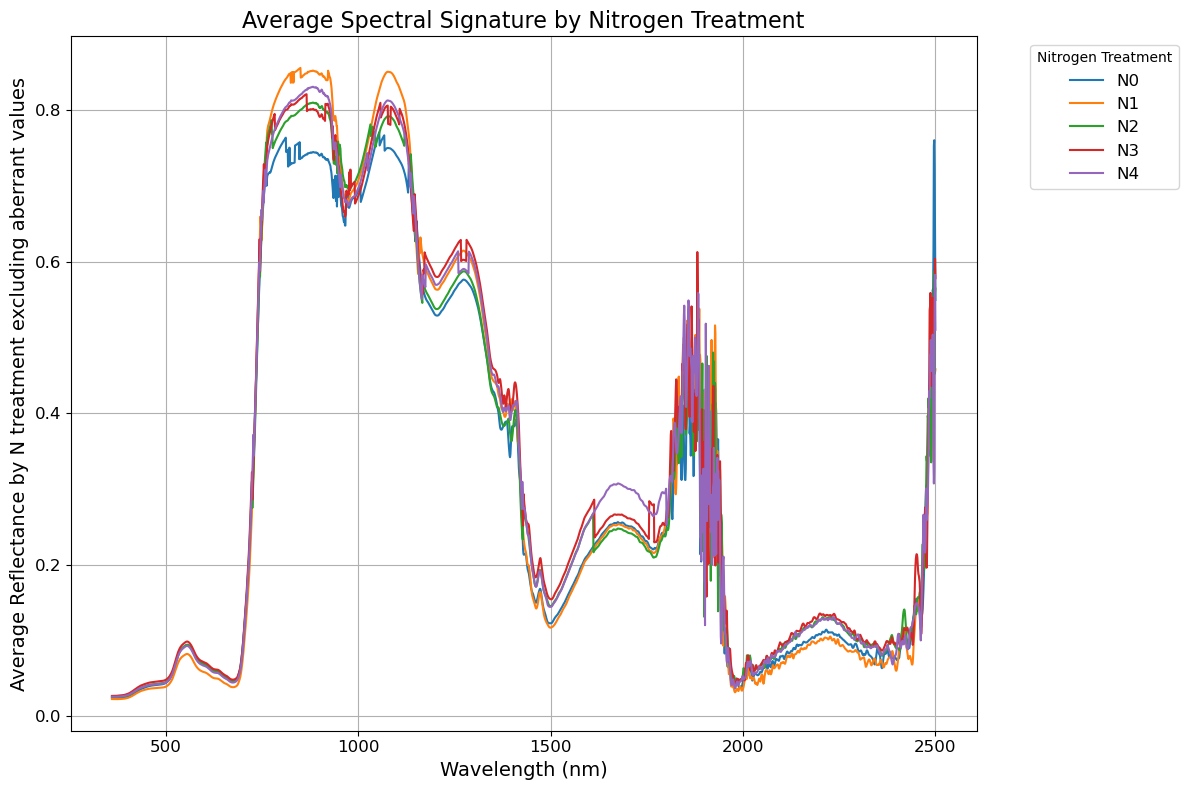

In [65]:
# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2022_RE, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

In [63]:
df_heading_2022 = df_heading[df_heading['Year']==2022]
df_heading_2022.head()
df_heading_2022_RE = df_heading_2022[df_heading_2022['site']=='RE']
print(df_heading_2022_RE.head())
print(df_heading_2022_RE.shape)
WL_heading_2022_RE=df_heading_2022_RE.iloc[:,2:2144]   
WL_heading_2022_RE.head()
cat_var= df_heading_2022_RE[['Variety','NTrt']]
cat_var
merged_df_heading_2022_RE = pd.merge(WL_heading_2022_RE,cat_var,left_index=True, right_index=True, how='inner')
merged_df_heading_2022_RE.head()

merged_df_heading_2022_RE.drop('Variety', axis=1, inplace=True)

      ID CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
2475   1   Heading  0.020070  0.020060  0.020065  0.020094  0.020108   
2476   2   Heading  0.017096  0.017055  0.017029  0.017030  0.017017   
2477   3   Heading  0.033503  0.033485  0.033466  0.033439  0.033416   
2478   4   Heading  0.030966  0.030934  0.030909  0.030900  0.030868   
2479   5   Heading  0.028409  0.028406  0.028411  0.028415  0.028424   

      rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
2475  0.020105  0.020076  0.020059  ...            1.377281      3.970556   
2476  0.017003  0.017017  0.017023  ...            1.739574      5.281667   
2477  0.033403  0.033410  0.033411  ...            1.661352      6.208889   
2478  0.030824  0.030781  0.030741  ...            1.715107      4.337778   
2479  0.028432  0.028428  0.028427  ...            1.926628      6.517778   

      MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
2475     3.700833        20220602 

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_44712\583820840.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: W

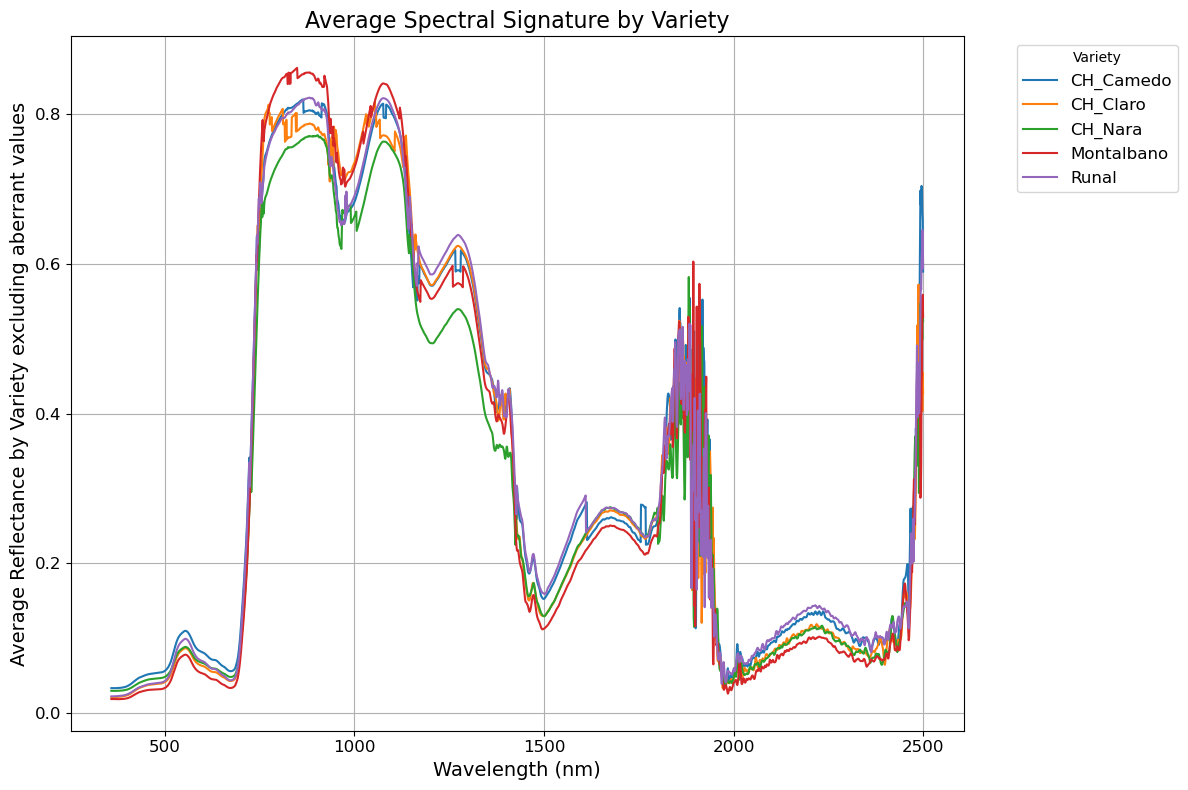

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_heading_2022_RE, id_vars=['Variety'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['Variety', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='Variety', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Variety', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by Variety excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

#### 33) Explore with another crop stage: Anthesis

In [79]:
df_AfterAnthesis = merged_df[merged_df['CropStage']=='AfterAnthesis']
df_AfterAnthesis.head()

ID      CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
750   1  AfterAnthesis  0.038597  0.038624  0.038635  0.038619  0.038613   
751   2  AfterAnthesis  0.044247  0.044353  0.044473  0.044605  0.044734   
752   3  AfterAnthesis  0.038457  0.038501  0.038554  0.038623  0.038649   
753   4  AfterAnthesis  0.034711  0.034716  0.034729  0.034770  0.034809   
754   5  AfterAnthesis  0.041978  0.042060  0.042130  0.042176  0.042249   

     rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
750  0.038612  0.038608  0.038611  ...            1.100238      3.367222   
751  0.044861  0.044984  0.045080  ...            0.416664      1.685556   
752  0.038658  0.038692  0.038697  ...            0.919589      2.987222   
753  0.034844  0.034874  0.034888  ...            0.939131      3.116111   
754  0.042325  0.042367  0.042420  ...            0.882945      2.810556   

     MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
750     3.136667        20210527   0.564690      20210518&27&0603   
751     1.465000        20210527   0.240186      20210518&27&0603   
752     3.137500        20210527   0.503334      20210518&27&0603   
753     2.858333        20210527   0.526015      20210518&27&0603   
754     2.635000        20210527   0.490496      20210518&27&0603   

     R_NDRE717_BHHPH  YieldGrain0PercKgM2  HIgrain_g  Histraw_g  
750         0.562016             0.708323       88.5       86.3  
751         0.257691             0.319911       72.2      123.9  
752         0.502541             0.665302       61.4       70.3  
753         0.522559             0.586376       55.6       81.0  
754         0.489624                  NaN       64.3       10.0  

[5 rows x 2285 columns]

In [89]:
df_AfterAnthesis_2021 = df_AfterAnthesis[df_AfterAnthesis['Year']==2021]
df_AfterAnthesis_2021.head()
df_AfterAnthesis_2021_CH = df_AfterAnthesis_2021[df_AfterAnthesis_2021['site']=='CH']
print(df_AfterAnthesis_2021_CH.head())
print(df_AfterAnthesis_2021_CH.shape)
WL_AfterAnthesis_2021_CH=df_AfterAnthesis_2021_CH.iloc[:,2:2144]   
WL_AfterAnthesis_2021_CH.head()
cat_var= df_AfterAnthesis_2021_CH[['Variety','NTrt']]
cat_var
merged_df_AfterAnthesis_2021_CH = pd.merge(WL_AfterAnthesis_2021_CH,cat_var,left_index=True, right_index=True, how='inner')
merged_df_AfterAnthesis_2021_CH.head()

merged_df_AfterAnthesis_2021_CH.drop('Variety', axis=1, inplace=True)

     ID      CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
750   1  AfterAnthesis  0.038597  0.038624  0.038635  0.038619  0.038613   
751   2  AfterAnthesis  0.044247  0.044353  0.044473  0.044605  0.044734   
752   3  AfterAnthesis  0.038457  0.038501  0.038554  0.038623  0.038649   
753   4  AfterAnthesis  0.034711  0.034716  0.034729  0.034770  0.034809   
754   5  AfterAnthesis  0.041978  0.042060  0.042130  0.042176  0.042249   

     rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
750  0.038612  0.038608  0.038611  ...            1.100238      3.367222   
751  0.044861  0.044984  0.045080  ...            0.416664      1.685556   
752  0.038658  0.038692  0.038697  ...            0.919589      2.987222   
753  0.034844  0.034874  0.034888  ...            0.939131      3.116111   
754  0.042325  0.042367  0.042420  ...            0.882945      2.810556   

     MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
750     3.136667 

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_44712\3144660782.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: Whe

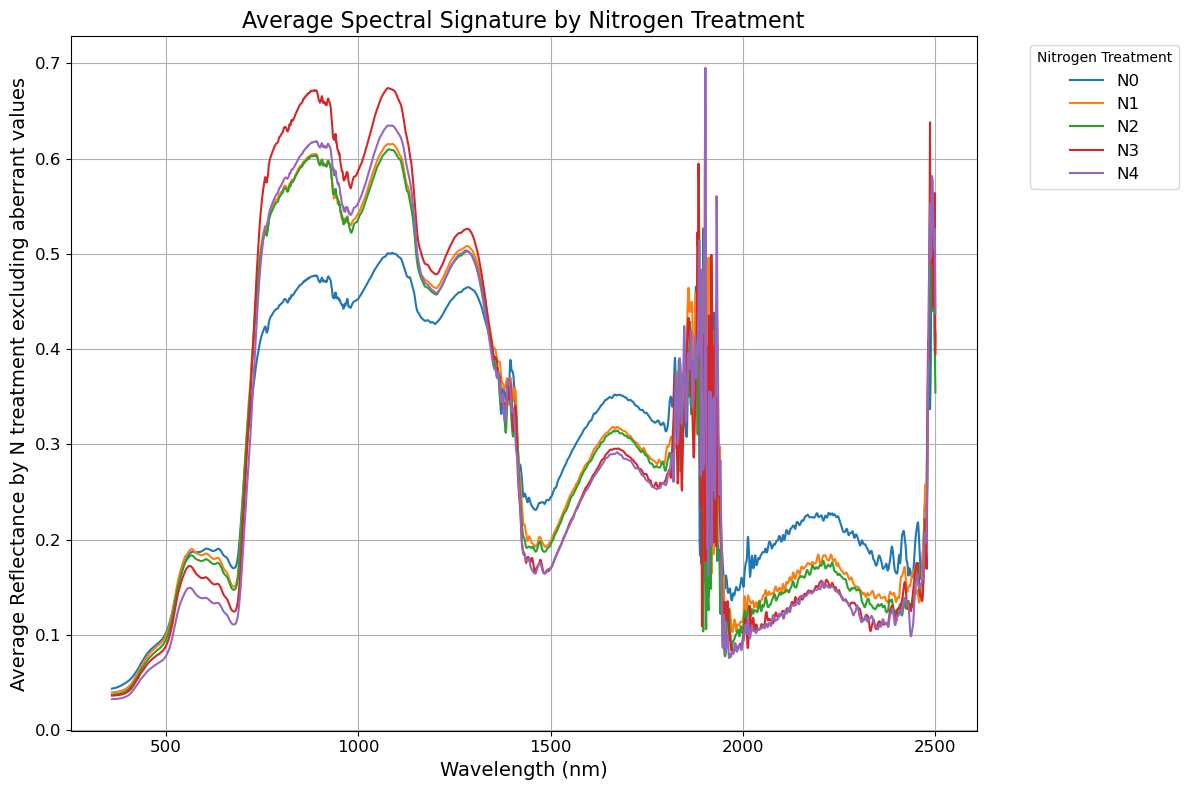

In [91]:
# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_AfterAnthesis_2021_CH, id_vars=['NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['NTrt', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='NTrt', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Nitrogen Treatment', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by N treatment excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

In [95]:
df_AfterAnthesis_2021 = df_AfterAnthesis[df_AfterAnthesis['Year']==2021]
df_AfterAnthesis_2021.head()
df_AfterAnthesis_2021_CH = df_AfterAnthesis_2021[df_AfterAnthesis_2021['site']=='CH']
print(df_AfterAnthesis_2021_CH.head())
print(df_AfterAnthesis_2021_CH.shape)
WL_AfterAnthesis_2021_CH=df_AfterAnthesis_2021_CH.iloc[:,2:2144]   
WL_AfterAnthesis_2021_CH.head()
cat_var= df_AfterAnthesis_2021_CH[['Variety','NTrt']]
cat_var
merged_df_AfterAnthesis_2021_CH = pd.merge(WL_AfterAnthesis_2021_CH,cat_var,left_index=True, right_index=True, how='inner')
merged_df_AfterAnthesis_2021_CH.head()

merged_df_AfterAnthesis_2021_CH.drop('NTrt', axis=1, inplace=True)

     ID      CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  \
750   1  AfterAnthesis  0.038597  0.038624  0.038635  0.038619  0.038613   
751   2  AfterAnthesis  0.044247  0.044353  0.044473  0.044605  0.044734   
752   3  AfterAnthesis  0.038457  0.038501  0.038554  0.038623  0.038649   
753   4  AfterAnthesis  0.034711  0.034716  0.034729  0.034770  0.034809   
754   5  AfterAnthesis  0.041978  0.042060  0.042130  0.042176  0.042249   

     rflt_364  rflt_365  rflt_366  ...  MeanMSR_Re717_BHPH  MeanLAIBHHPH  \
750  0.038612  0.038608  0.038611  ...            1.100238      3.367222   
751  0.044861  0.044984  0.045080  ...            0.416664      1.685556   
752  0.038658  0.038692  0.038697  ...            0.919589      2.987222   
753  0.034844  0.034874  0.034888  ...            0.939131      3.116111   
754  0.042325  0.042367  0.042420  ...            0.882945      2.810556   

     MeanLAIBHPH  Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  \
750     3.136667 

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_44712\3073938590.py:19: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\_core.py:1006: FutureWarning: 

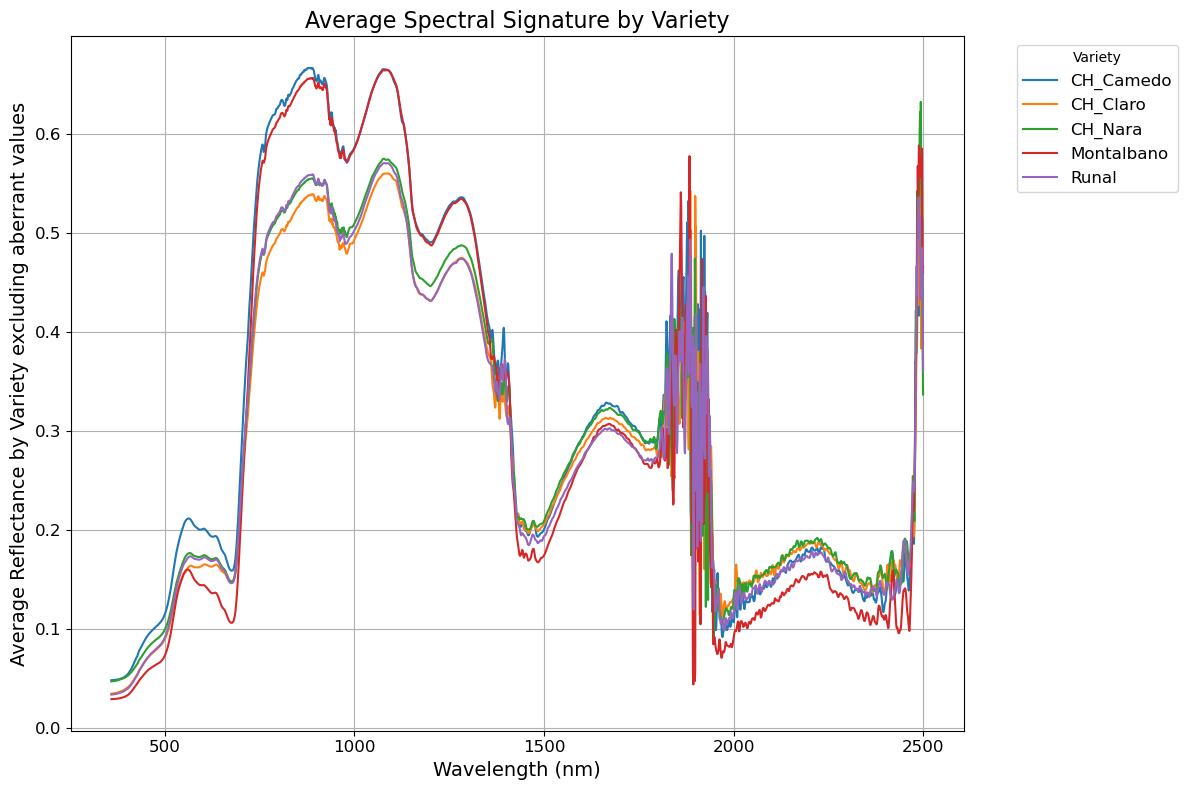

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame structure
# df = pd.DataFrame({
#     'NTrt': ['N1', 'N1', 'N2', 'N2', 'N3', 'N3'],
#     'rflt_359': [0.1, 0.2, 0.3, 1.1, -0.1, 0.5],
#     'rflt_360': [0.15, 0.25, 0.35, 0.95, 0.5, 0.6]
# })

# Assuming your dataframe is called df and has columns like ['NTrt', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the DataFrame using pd.melt()
df_melted = pd.melt(merged_df_AfterAnthesis_2021_CH, id_vars=['Variety'], 
                    var_name='Wavelength', value_name='Reflectance')
df_melted = df_melted.dropna(subset=['Reflectance'])
# Step 2: Extract the numeric part of the 'Wavelength' column
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 4: Filter out reflectance values that are not between 0 and 1
df_filtered = df_melted[(df_melted['Reflectance'] >= 0) & (df_melted['Reflectance'] <= 1)]

# Step 5: Group by 'NTrt' and 'Wavelength' and calculate the average reflectance
df_average = df_filtered.groupby(['Variety', 'Wavelength'], as_index=False).mean()

# Step 6: Plot the average reflectance data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_average, x='Wavelength', y='Reflectance', 
             hue='Variety', markers=True, dashes=False)

# Step 7: Customize the plot
plt.title('Average Spectral Signature by Variety', fontsize=16)
plt.xlabel('Wavelength (nm)',fontsize=14)
plt.ylabel('Average Reflectance by Variety excluding aberrant values',fontsize=14)
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.grid(True)
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=12) 
# Display the plot
plt.tight_layout()
plt.show()

#### 34) Visualize agronomic parameter like grain yield with heat map

In [2]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

In [3]:
df_Agro_WA = pd.read_csv("Whole_Dataset_AgroMeasWA.csv",  sep=";")
print(df_Agro_WA)
print(df_Agro_WA.columns)

     ID          Experiment  Year  row  col Exp  Location site      Town  \
0     1  WheatAdvisor_exact  2020    1    1  WA      1260   CH  Changins   
1     2  WheatAdvisor_exact  2020    2    1  WA      1260   CH  Changins   
2     3  WheatAdvisor_exact  2020    3    1  WA      1260   CH  Changins   
3     4  WheatAdvisor_exact  2020    4    1  WA      1260   CH  Changins   
4     5  WheatAdvisor_exact  2020    4    2  WA      1260   CH  Changins   
..   ..                 ...   ...  ...  ...  ..       ...  ...       ...   
434  71  WheatAdvisor_exact  2021    1   18  WA      1260   CH  Changins   
435  72  WheatAdvisor_exact  2021    2   18  WA      1260   CH  Changins   
436  73  WheatAdvisor_exact  2021    3   18  WA      1260   CH  Changins   
437  74  WheatAdvisor_exact  2021    4   18  WA      1260   CH  Changins   
438  75  WheatAdvisor_exact  2021    5   18  WA      1260   CH  Changins   

        Variety  ... MeanMSR_Re717_BHPH  MeanLAIBHHPH MeanLAIBHPH  \
0     CH_Camedo  .

In [4]:
df_Agro_WA_2021 = df_Agro_WA[df_Agro_WA['Year']==2021]
df_Agro_WA_2021.head()

ID          Experiment  Year  row  col Exp  Location site      Town  \
64   1  WheatAdvisor_exact  2021    1    1  WA      1376   GO  Goumoens   
65   2  WheatAdvisor_exact  2021    2    1  WA      1376   GO  Goumoens   
66   3  WheatAdvisor_exact  2021    3    1  WA      1376   GO  Goumoens   
67   4  WheatAdvisor_exact  2021    4    1  WA      1376   GO  Goumoens   
68   5  WheatAdvisor_exact  2021    5    1  WA      1376   GO  Goumoens   

       Variety  ... MeanMSR_Re717_BHPH  MeanLAIBHHPH MeanLAIBHPH  \
64  Montalbano  ...           1.447841      3.466667    3.726667   
65    CH_Claro  ...           0.759900      2.575556    2.746667   
66   CH_Camedo  ...           1.490450      3.678333    3.420833   
67     CH_Nara  ...           1.463113      3.584444    3.568333   
68       Runal  ...           0.815150      2.075000    2.079167   

    Date_R_NDRE717  R_NDRE717  Date_R_NDRE717_BHHPH  R_NDRE717_BHHPH  \
64        20210528   0.563815      20210503&28&0610         0.552054   
65        20210528   0.340956      20210503&28&0610         0.347006   
66        20210528   0.594121      20210503&28&0610         0.590301   
67        20210528   0.570007      20210503&28&0610         0.576956   
68        20210528   0.370384      20210503&28&0610         0.361839   

   YieldGrain0PercKgM2  HIgrain_g  Histraw_g  
64            0.620691        NaN        NaN  
65            0.414331        NaN        NaN  
66            0.676671        NaN        NaN  
67            0.668456        NaN        NaN  
68            0.375471        NaN        NaN  

[5 rows x 141 columns]

In [5]:
print(df_Agro_WA_2021.columns)


Index(['ID', 'Experiment', 'Year', 'row', 'col', 'Exp', 'Location', 'site',
       'Town', 'Variety',
       ...
       'MeanMSR_Re717_BHPH', 'MeanLAIBHHPH', 'MeanLAIBHPH', 'Date_R_NDRE717',
       'R_NDRE717', 'Date_R_NDRE717_BHHPH', 'R_NDRE717_BHHPH',
       'YieldGrain0PercKgM2', 'HIgrain_g', 'Histraw_g'],
      dtype='object', length=141)


In [6]:
print(df_Agro_WA_2021['Variety'].unique())

['Montalbano' 'CH_Claro' 'CH_Camedo' 'CH_Nara' 'Runal']


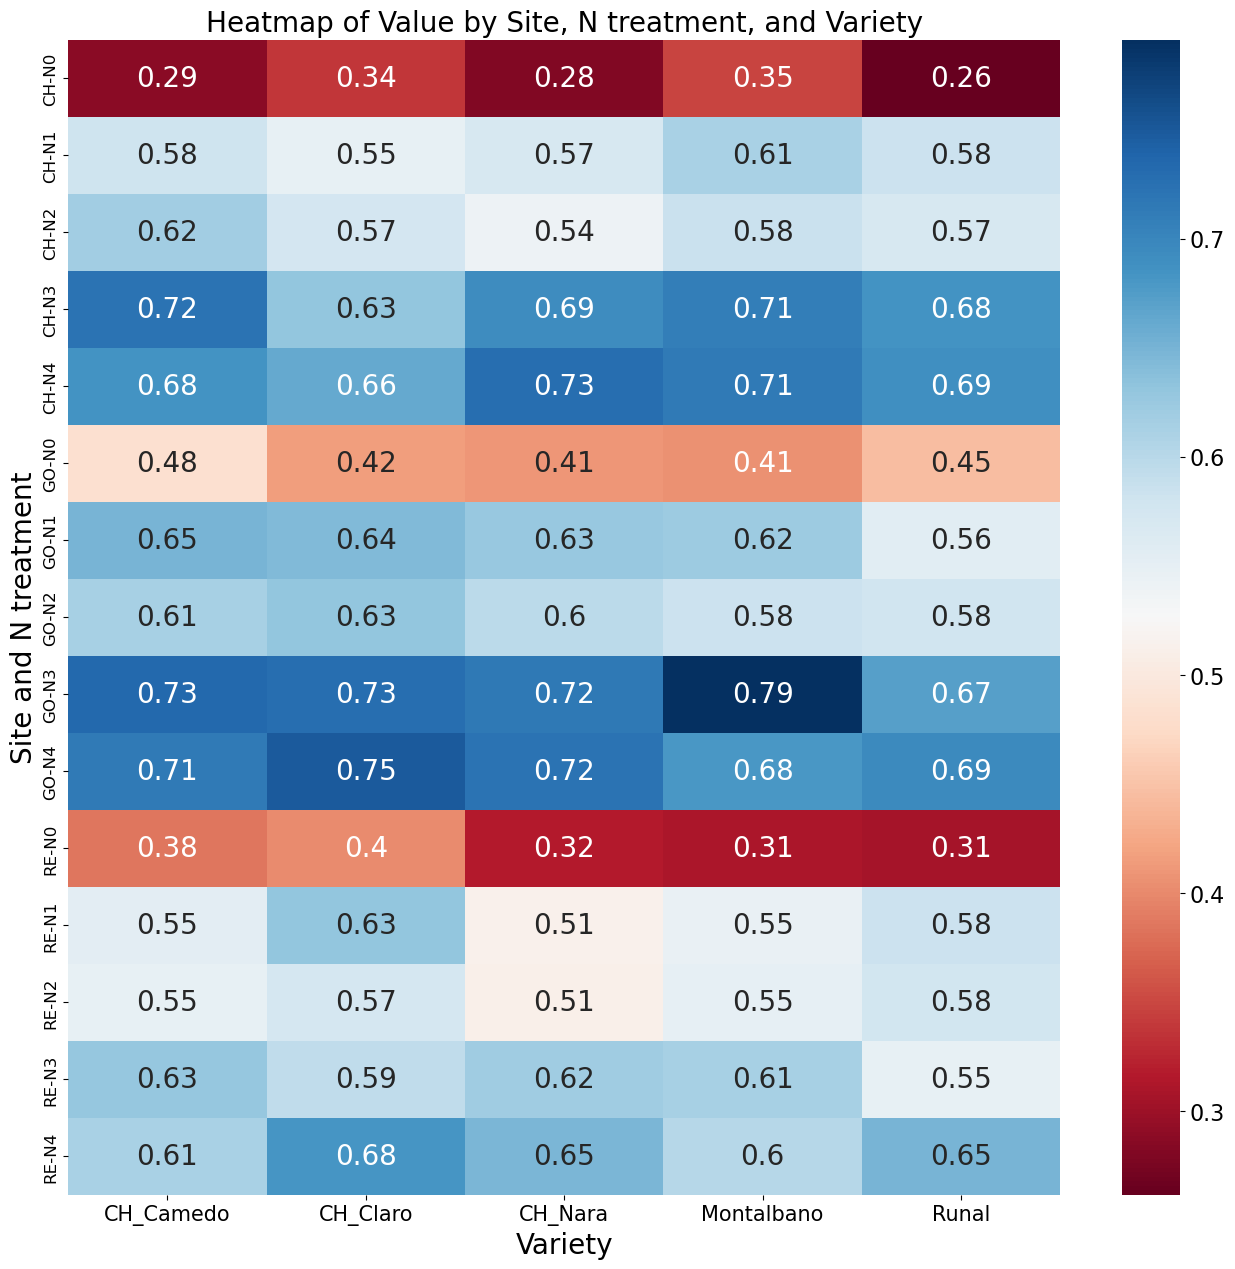

In [29]:
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = df_Agro_WA_2021.pivot_table(index=['site', 'NTrt'], columns='Variety', values='YieldGrain0PercKgM2')

# Plot the heatmap
plt.figure(figsize=(16, 15))
g=sns.heatmap(heatmap_data, annot=True, cmap="RdBu",annot_kws={"size": 20})

# Get the color bar and set the font size of its ticks
colorbar = g.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)  # Set font size for color bar numbers

# Add title
plt.title('Heatmap of Value by Site, N treatment, and Variety',size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.xlabel('Variety', fontsize=20) 
plt.ylabel('Site and N treatment', fontsize=20) 


plt.show()

#### 35) Visualize agronomic parameter like protein in grain with heat map

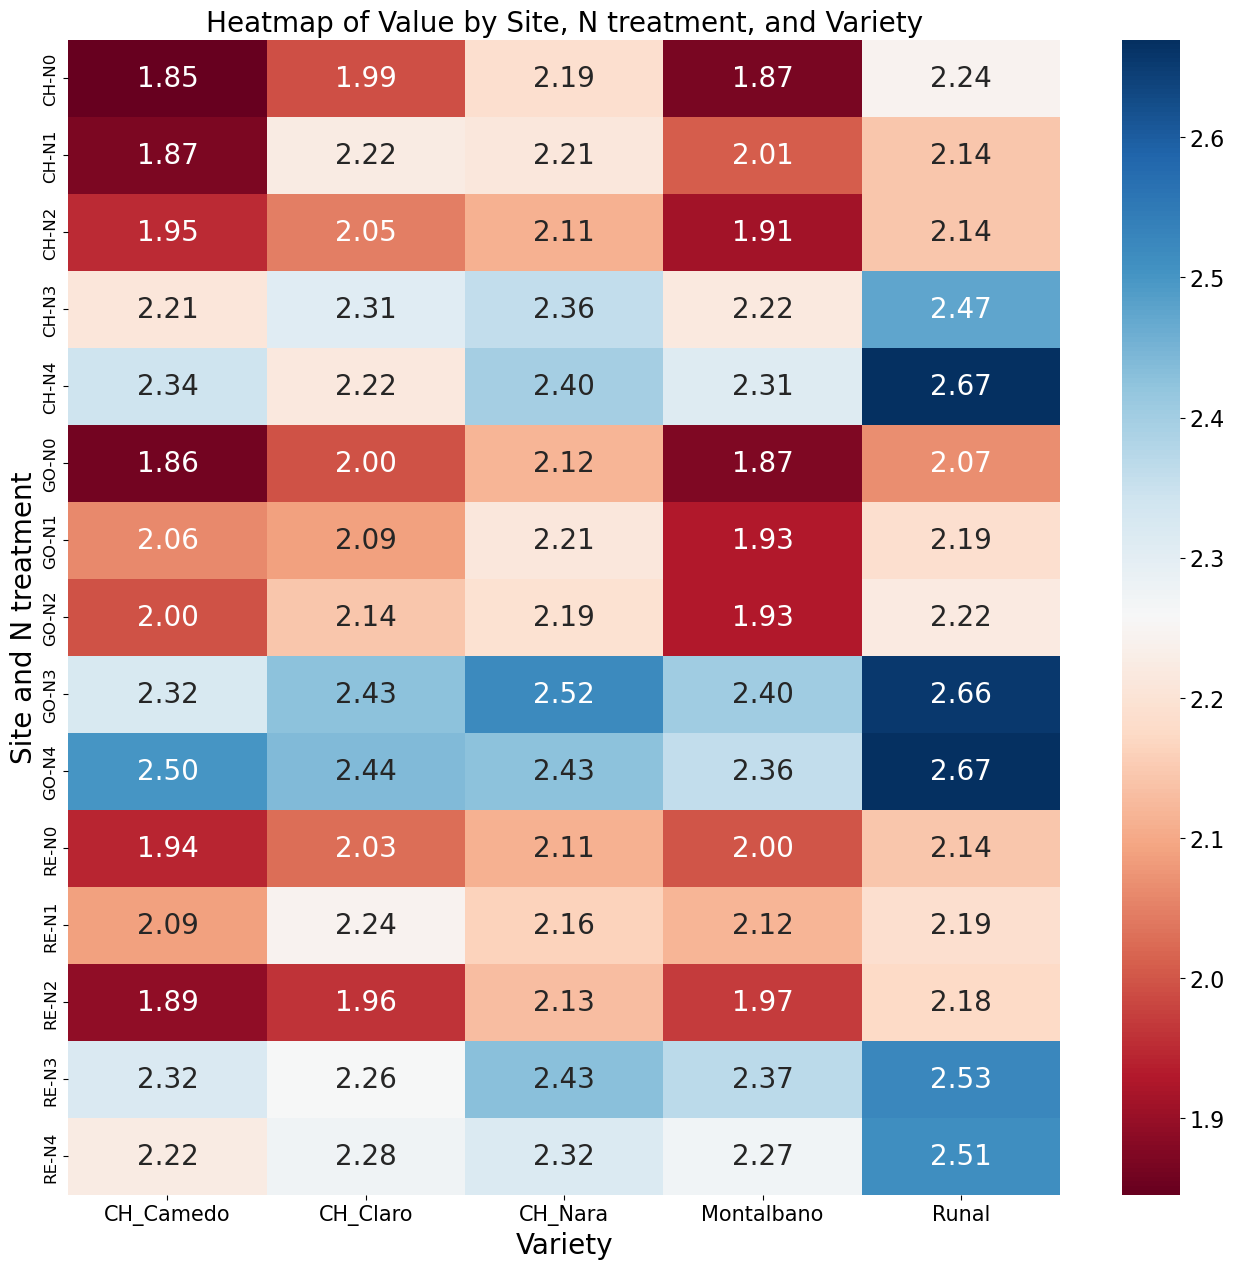

In [35]:
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = df_Agro_WA_2021.pivot_table(index=['site', 'NTrt'], columns='Variety', values='TotNGrainGround')

# Plot the heatmap
plt.figure(figsize=(16, 15))
g=sns.heatmap(heatmap_data, annot=True, cmap="RdBu",annot_kws={"size": 20},fmt=".2f")

# Get the color bar and set the font size of its ticks
colorbar = g.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)  # Set font size for color bar numbers

# Add title
plt.title('Heatmap of Value by Site, N treatment, and Variety',size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.xlabel('Variety', fontsize=20) 
plt.ylabel('Site and N treatment', fontsize=20) 


plt.show()

#### 36) Visualize agronomic parameter like biomass with heat map

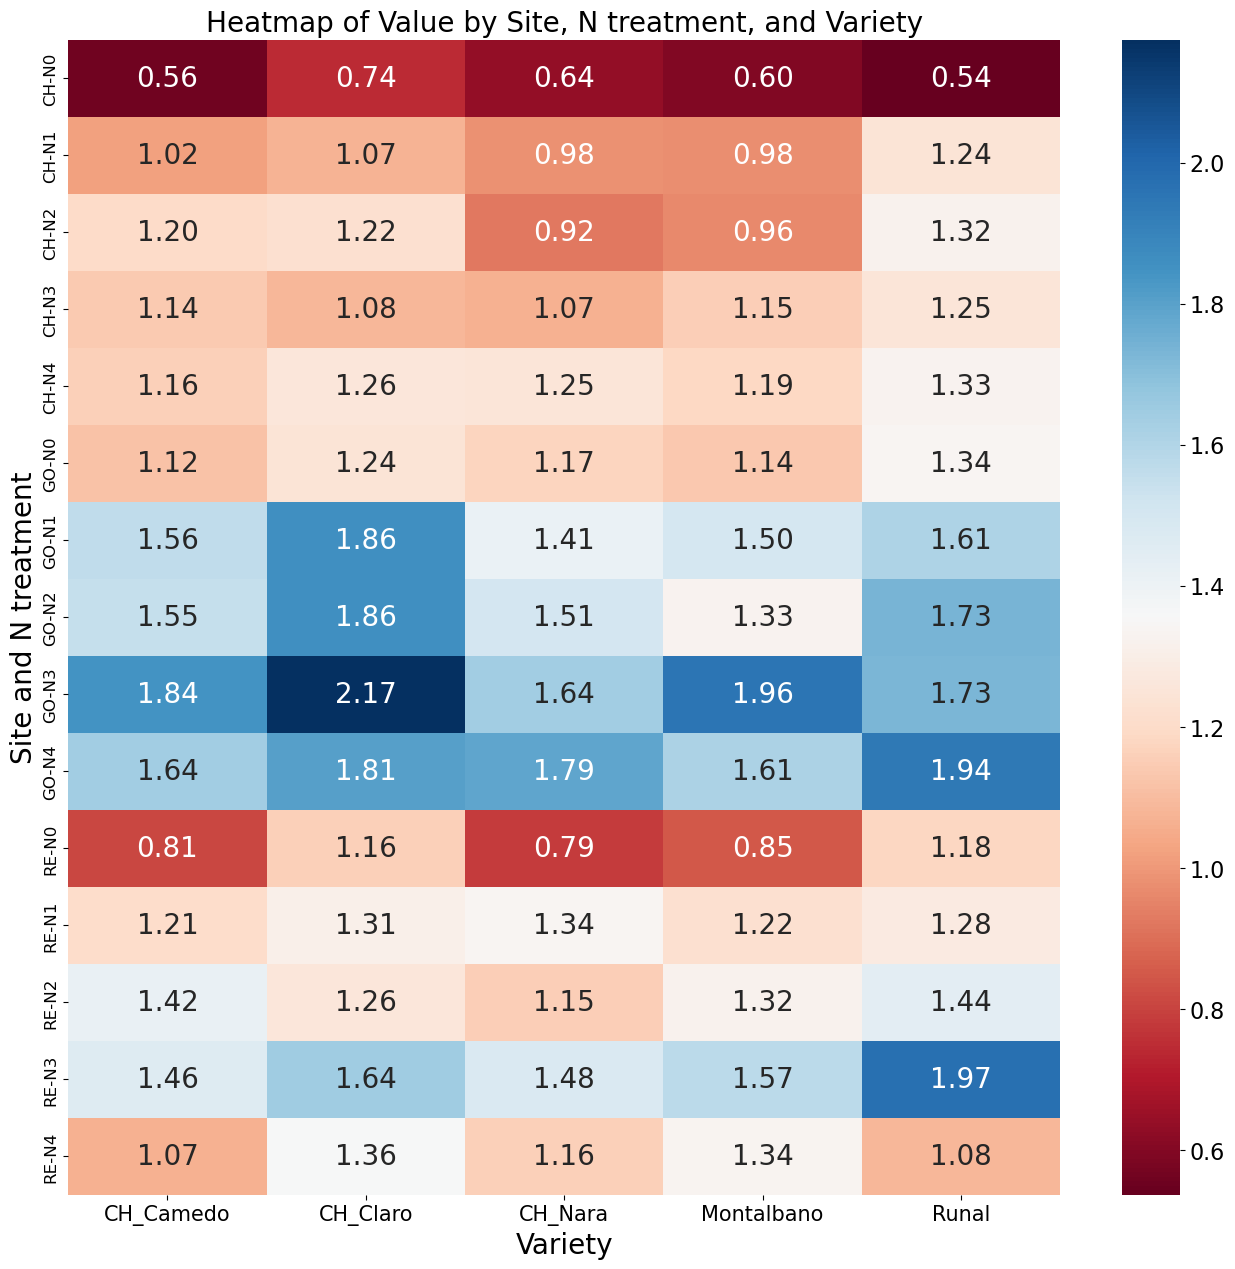

In [36]:
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = df_Agro_WA_2021.pivot_table(index=['site', 'NTrt'], columns='Variety', values='BMflowDry')

# Plot the heatmap
plt.figure(figsize=(16, 15))
g=sns.heatmap(heatmap_data, annot=True, cmap="RdBu",annot_kws={"size": 20},fmt=".2f")

# Get the color bar and set the font size of its ticks
colorbar = g.collections[0].colorbar
colorbar.ax.tick_params(labelsize=16)  # Set font size for color bar numbers

# Add title
plt.title('Heatmap of Value by Site, N treatment, and Variety',size=20)
plt.xticks(size=15)
plt.yticks(size=12)
plt.xlabel('Variety', fontsize=20) 
plt.ylabel('Site and N treatment', fontsize=20) 


plt.show()

#### 37) Visualize agronomic parameter like grain yield with bar plot

C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\vuill\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

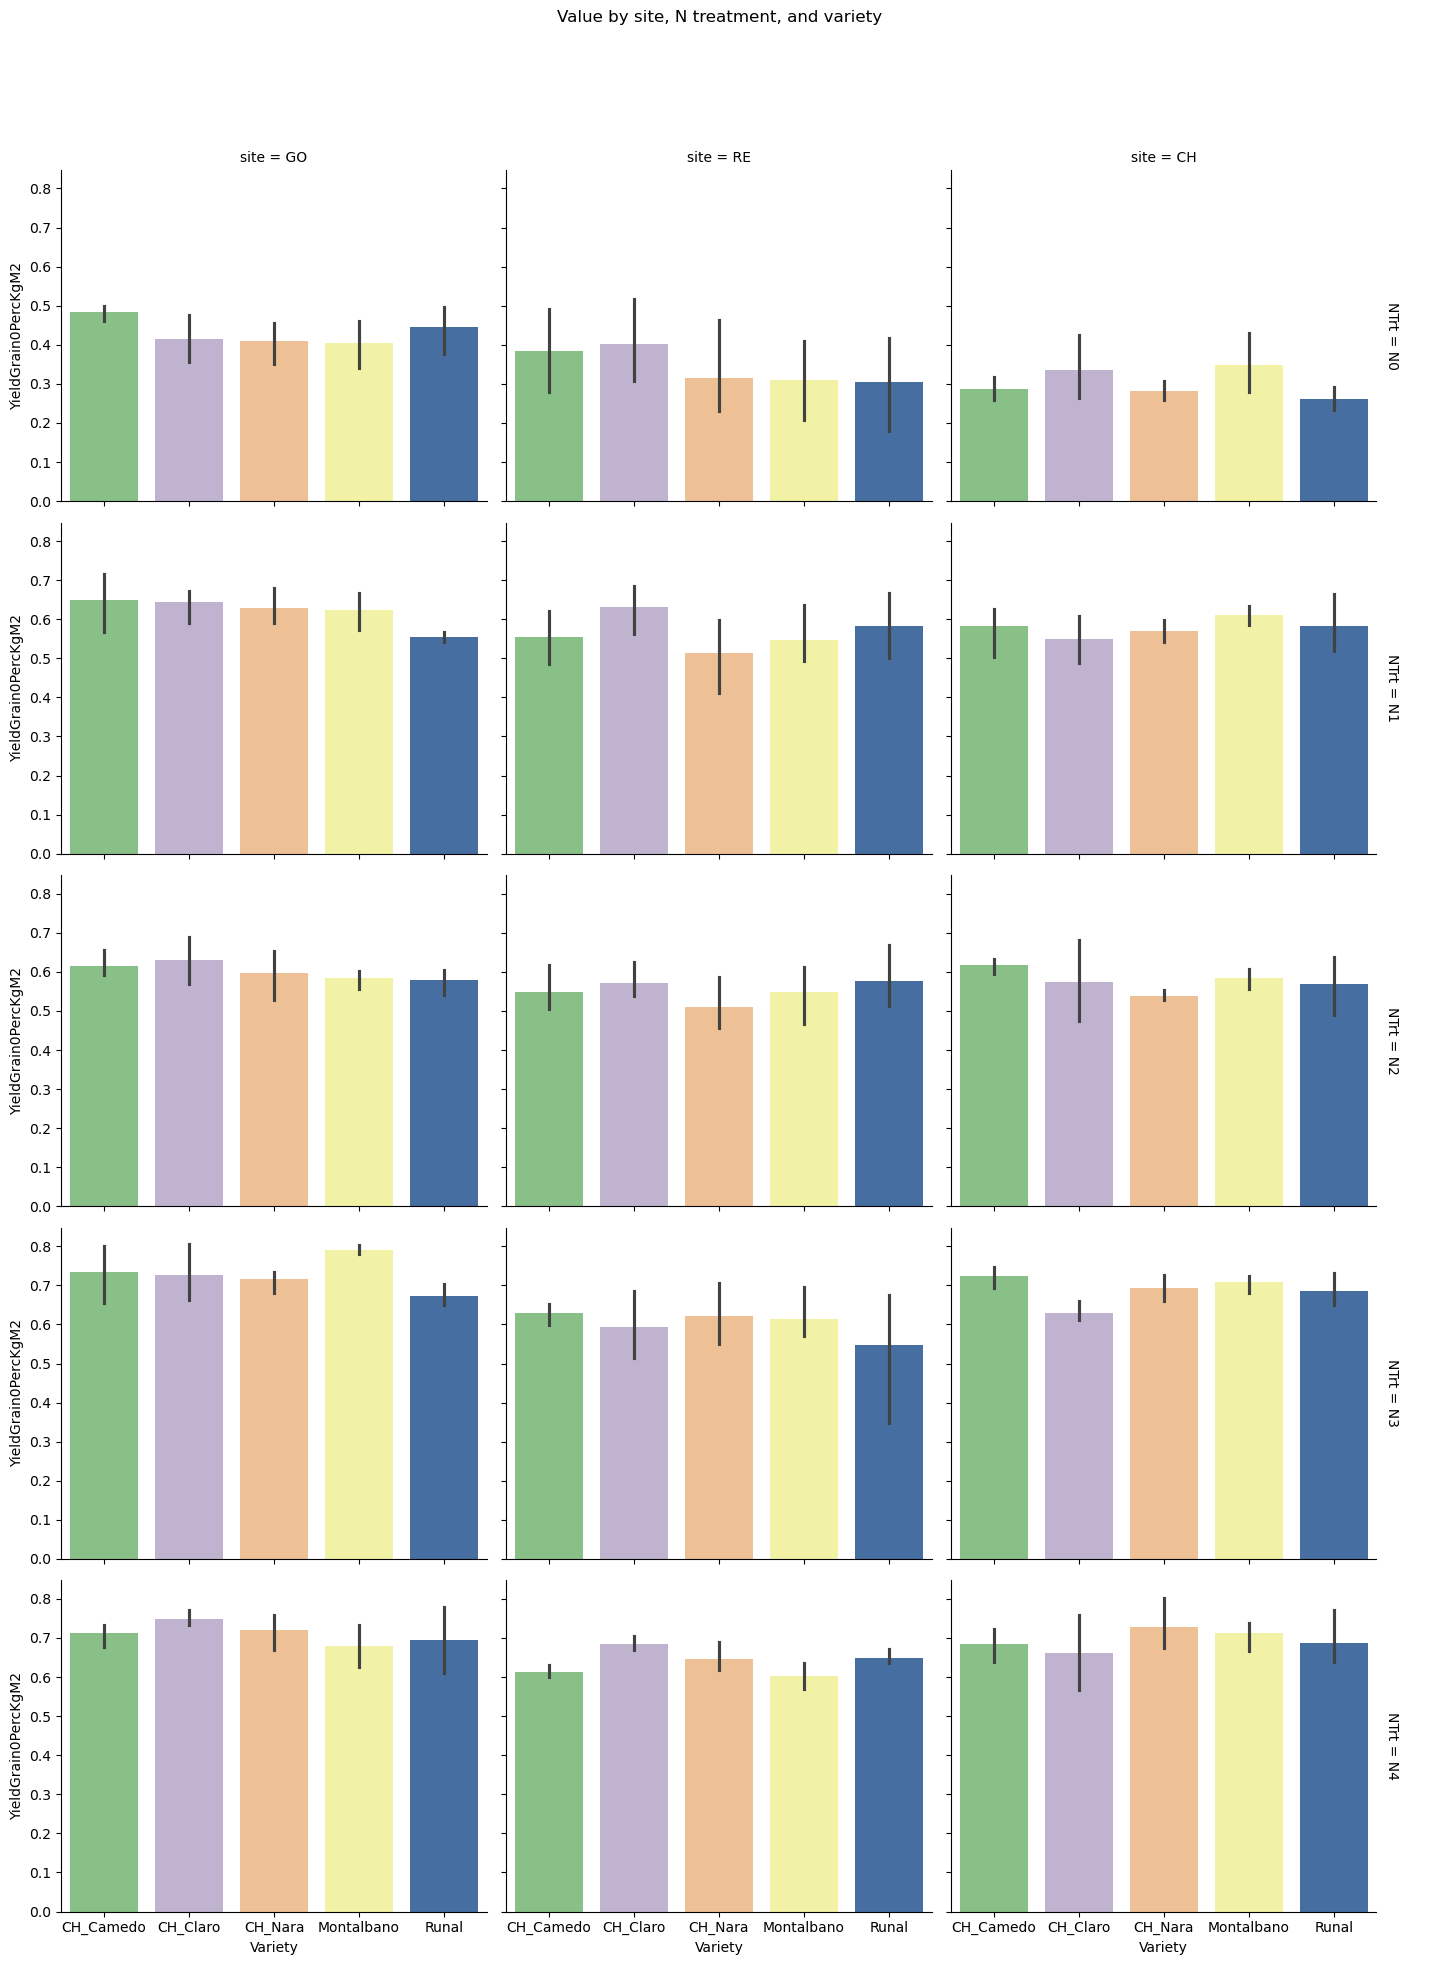

In [37]:
# Create FacetGrid for Site and Ntrt
# Drop rows where 'Variety' or 'YieldGrain0PercKgM2' has missing values
df_clean = df_Agro_WA_2021.dropna(subset=['Variety', 'YieldGrain0PercKgM2'])

# Sort Ntrt and Variety
ntrt_order = sorted(df_clean['NTrt'].unique())  # Sort Ntrt
variety_order = sorted(df_clean['Variety'].unique())  # Sort Variety

g = sns.FacetGrid(df_clean, col="site", row="NTrt", margin_titles=True, row_order= sorted(df_clean['NTrt'].unique()), height=4, aspect=1.2)

# Plot a barplot for Variety against Value in each grid
g.map(sns.barplot, "Variety", "YieldGrain0PercKgM2", order=sorted(df_Agro_WA_2021['Variety'].unique()),palette="Accent")

# Add titles and legend
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Value by site, N treatment, and variety')

plt.show()

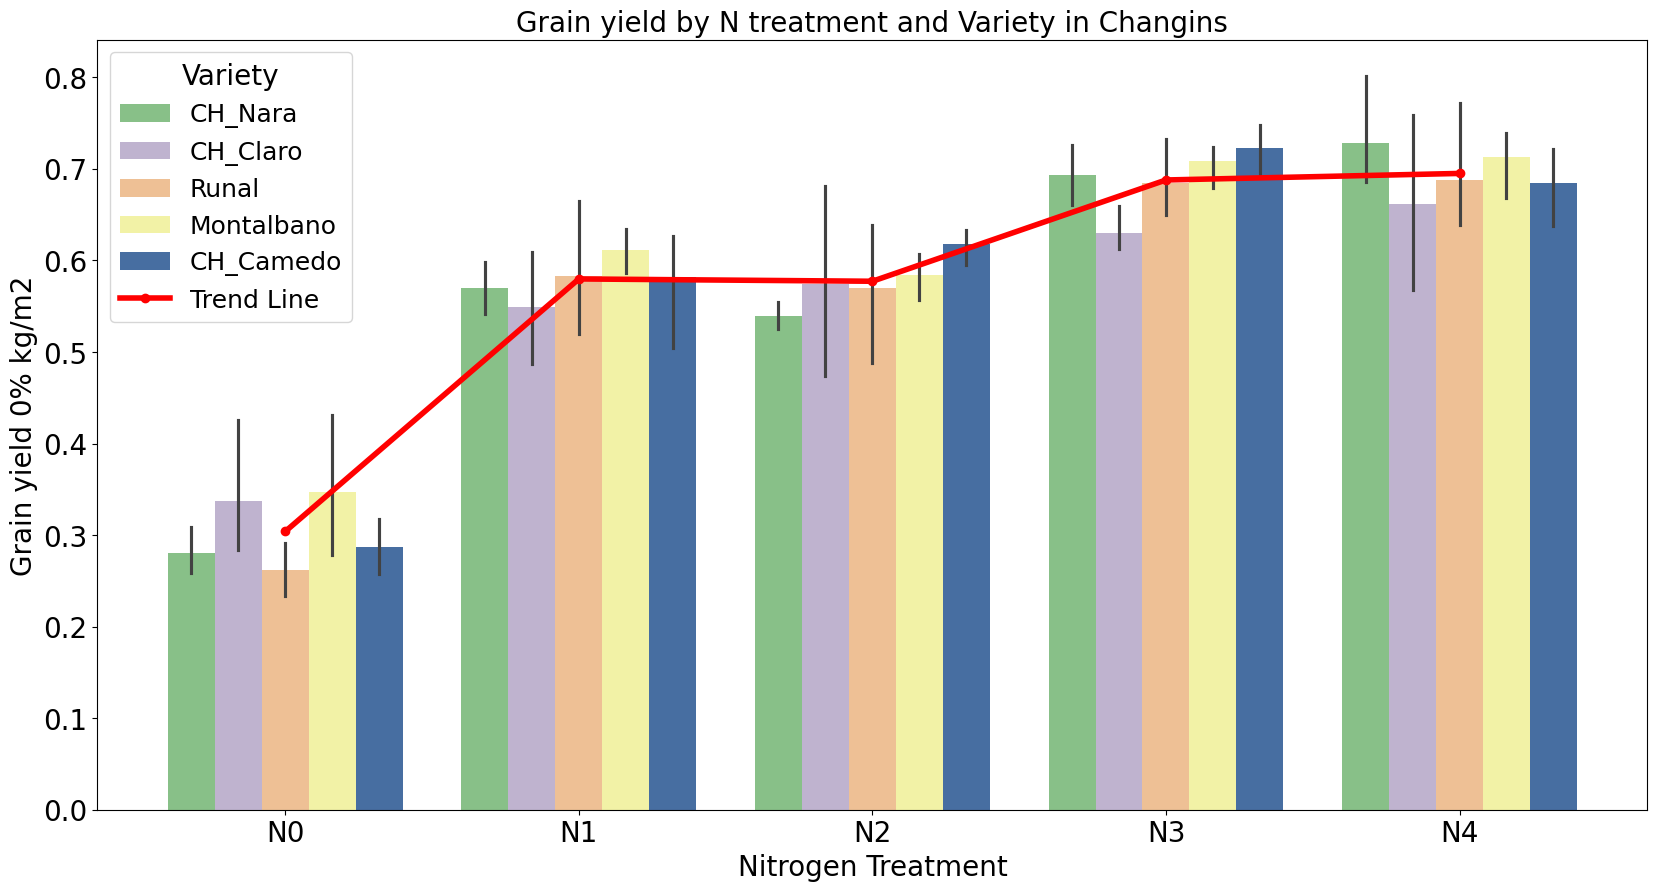

In [68]:
df_clean_CH = df_clean[df_clean['site']=='CH']

# Set figure size
plt.figure(figsize=(20, 10))

# Grouped barplot for Ntrt and Variety by Site
sns.barplot(x="NTrt", y="YieldGrain0PercKgM2", hue="Variety", data=df_clean_CH, errorbar="ci", palette="Accent",order=ntrt_order)

# Calculate the average values per Ntrt (aggregating across varieties)
average_values = df_clean_CH.groupby('NTrt')['YieldGrain0PercKgM2'].mean().reindex(ntrt_order)

# Plot the trend line above the bar plot
plt.plot(ntrt_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Add plot title and labels
plt.title('Grain yield by N treatment and Variety in Changins', fontsize=20)
plt.xlabel('Nitrogen Treatment (Ntrt)')
plt.ylabel('Value')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(title='Variety', fontsize=18, title_fontsize=20)  # Adjust fontsize here
plt.xlabel('Nitrogen Treatment', fontsize=20) 
plt.ylabel('Grain yield 0% kg/m2', fontsize=20) 
# Show plot
plt.show()

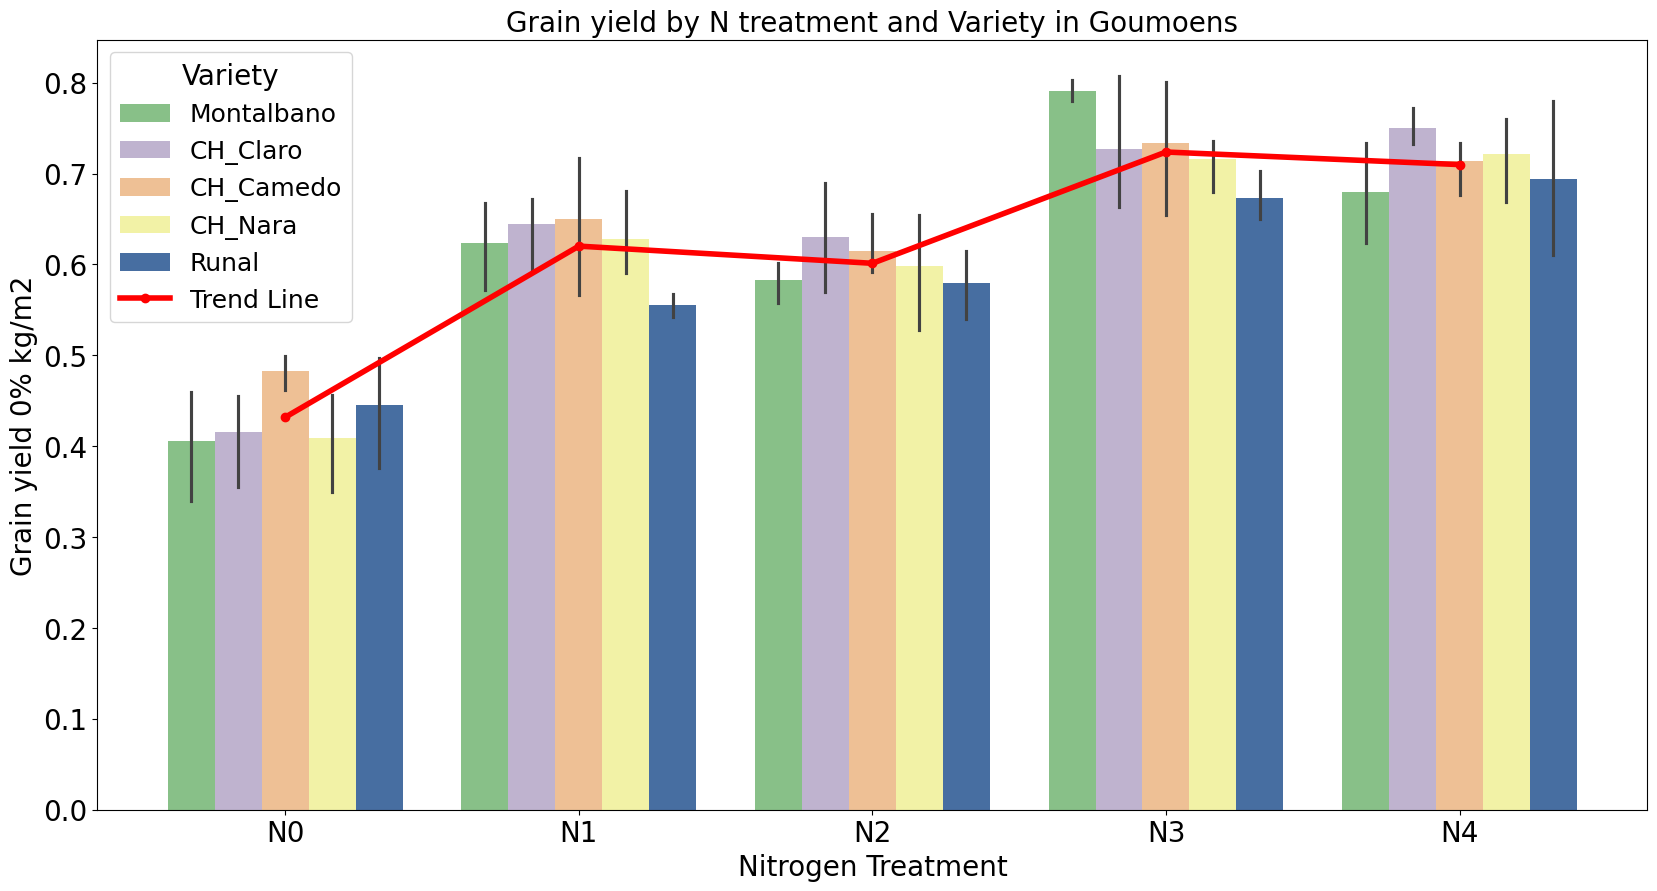

In [67]:
df_clean_GO = df_clean[df_clean['site']=='GO']

# Set figure size
plt.figure(figsize=(20, 10))

# Grouped barplot for Ntrt and Variety by Site
sns.barplot(x="NTrt", y="YieldGrain0PercKgM2", hue="Variety", data=df_clean_GO, errorbar="ci", palette="Accent",order=ntrt_order)

# Calculate the average values per Ntrt (aggregating across varieties)
average_values = df_clean_GO.groupby('NTrt')['YieldGrain0PercKgM2'].mean().reindex(ntrt_order)

# Plot the trend line above the bar plot
plt.plot(ntrt_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')


# Add plot title and labels
plt.title('Grain yield by N treatment and Variety in Goumoens', fontsize=20)
plt.xlabel('Nitrogen Treatment (Ntrt)')
plt.ylabel('Value')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(title='Variety', fontsize=18, title_fontsize=20)  # Adjust fontsize here
plt.xlabel('Nitrogen Treatment', fontsize=20) 
plt.ylabel('Grain yield 0% kg/m2', fontsize=20) 
# Show plot
plt.show()

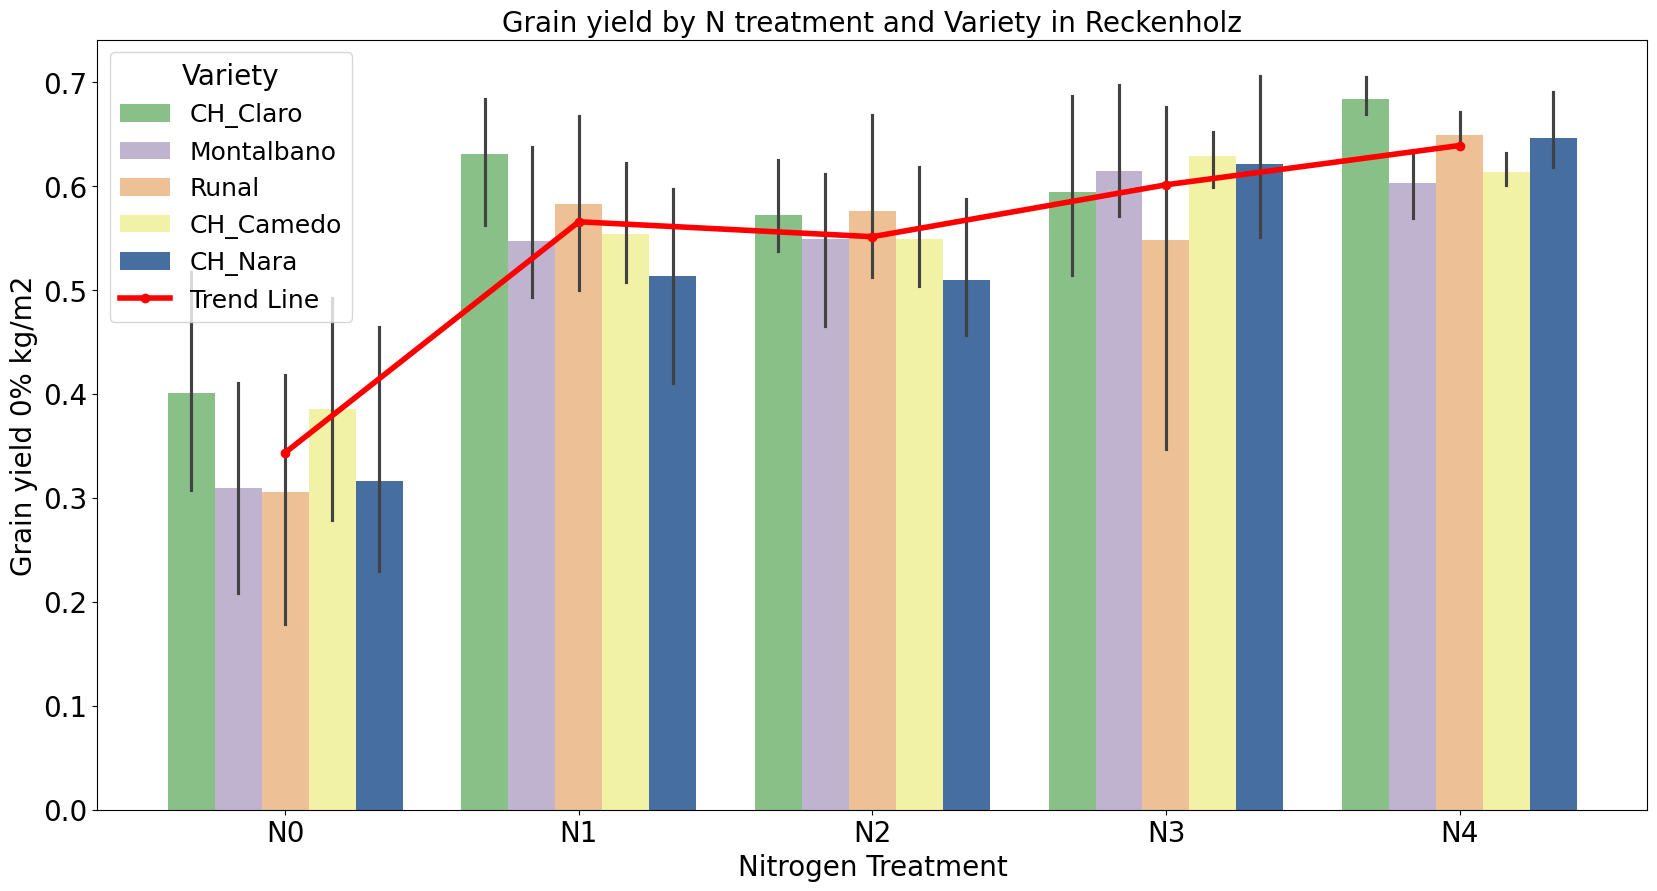

In [69]:
df_clean_RE = df_clean[df_clean['site']=='RE']

# Set figure size
plt.figure(figsize=(20, 10))

# Grouped barplot for Ntrt and Variety by Site
sns.barplot(x="NTrt", y="YieldGrain0PercKgM2", hue="Variety", data=df_clean_RE, errorbar="ci", palette="Accent",order=ntrt_order)

# Calculate the average values per Ntrt (aggregating across varieties)
average_values = df_clean_RE.groupby('NTrt')['YieldGrain0PercKgM2'].mean().reindex(ntrt_order)

# Plot the trend line above the bar plot
plt.plot(ntrt_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Add plot title and labels
plt.title('Grain yield by N treatment and Variety in Reckenholz', fontsize=20)
plt.xlabel('Nitrogen Treatment (Ntrt)')
plt.ylabel('Value')
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(title='Variety', fontsize=18, title_fontsize=20)  # Adjust fontsize here
plt.xlabel('Nitrogen Treatment', fontsize=20) 
plt.ylabel('Grain yield 0% kg/m2', fontsize=20) 
# Show plot
plt.show()

In [105]:
type(average_values)
average_values

NTrt
N0    0.343559
N1    0.565572
N2    0.551191
N3    0.601107
N4    0.638920
Name: YieldGrain0PercKgM2, dtype: float64

#### 38) Visualize agronomic parameter like grain yield with box plot

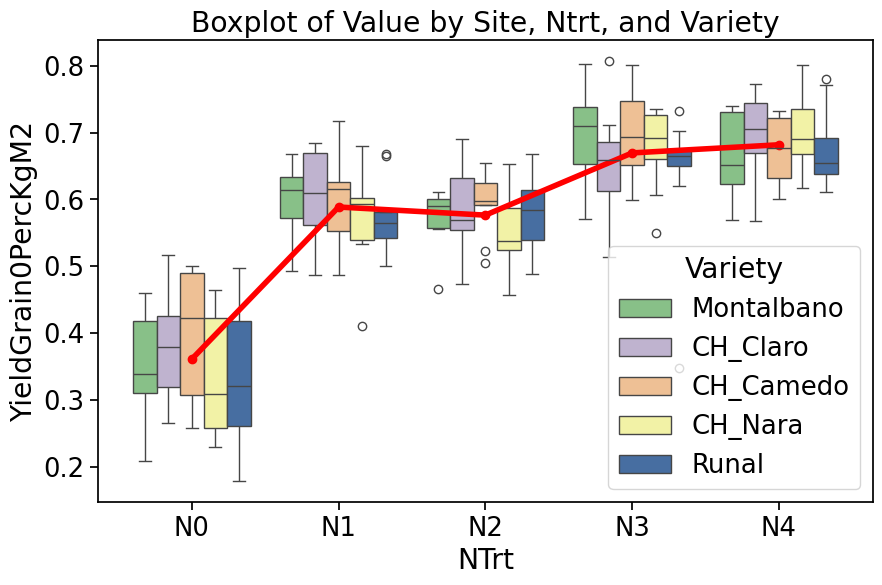

In [121]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(x="NTrt", y="YieldGrain0PercKgM2", hue="Variety", data=df_clean, palette="Accent",order=ntrt_order)

# Calculate the average values per Ntrt (aggregating across varieties)
average_values = df_clean.groupby('NTrt')['YieldGrain0PercKgM2'].mean().reindex(ntrt_order)

# Plot the trend line above the bar plot
plt.plot(ntrt_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Set plot title and labels
plt.title('Boxplot of Value by Site, Ntrt, and Variety')


plt.show()

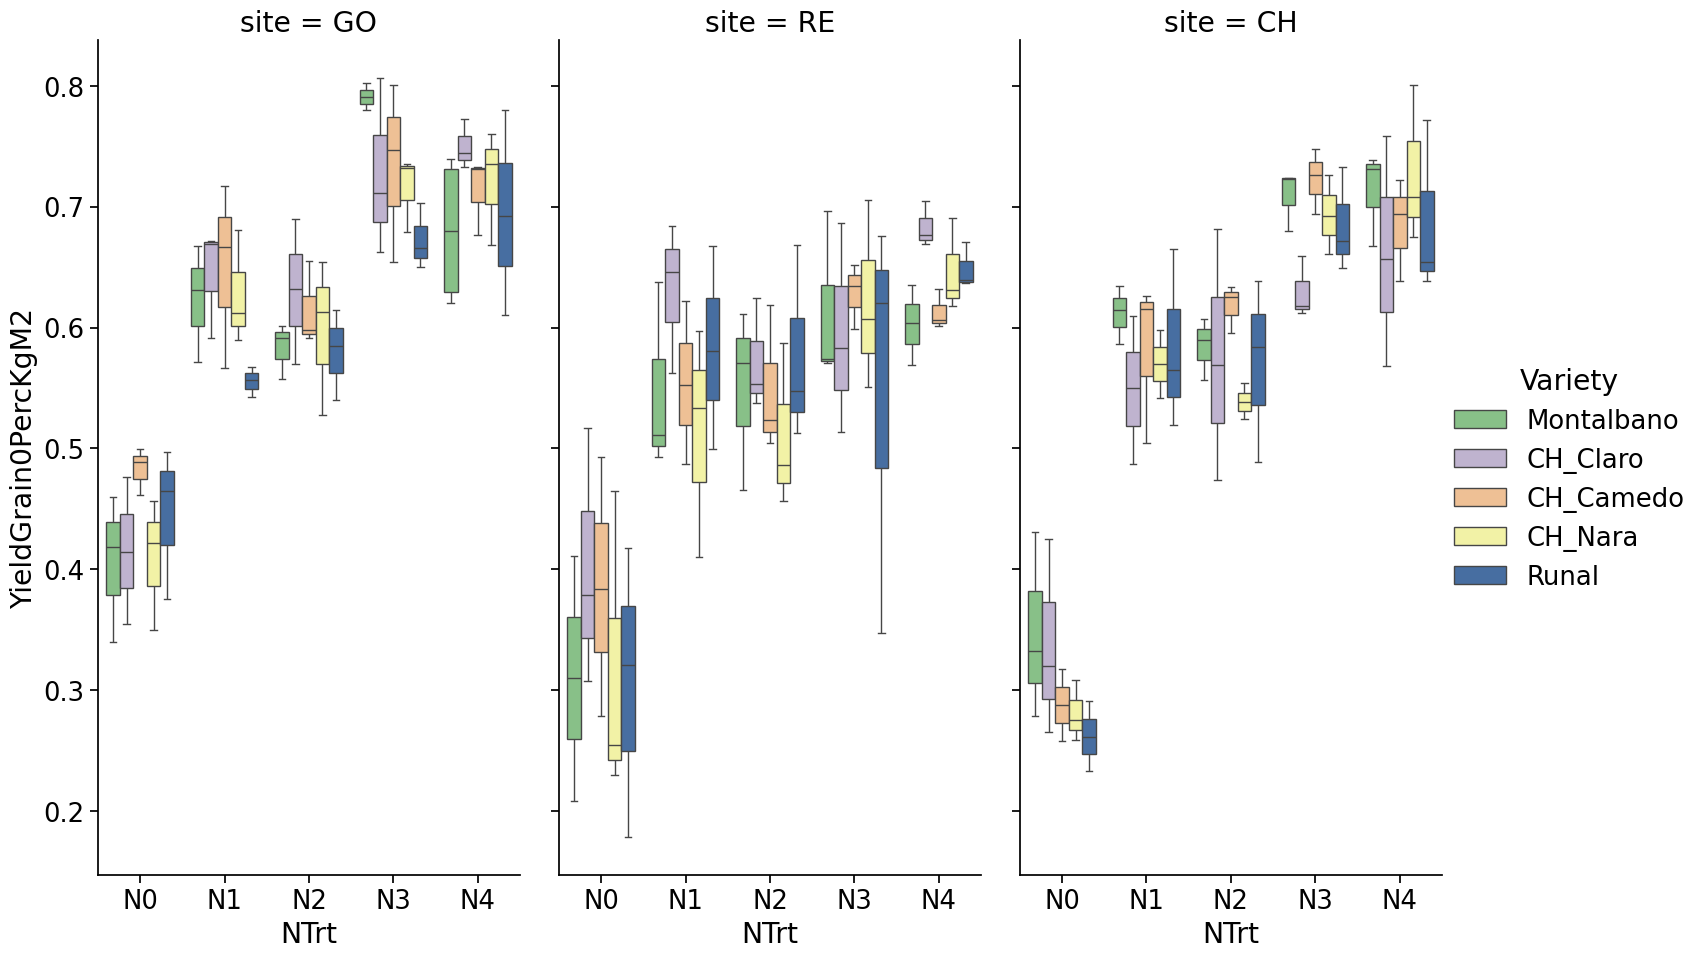

In [120]:
# Set figure size
# Split the plot by Site using facetting
# Set the context for larger font sizes
sns.set_context("notebook", font_scale=1.7)  # Increase the font scale

# Map NTrt to numeric values for trend line calculation
#df_clean['NTrt_numeric'] = df_clean['NTrt'].map({'N0': 0, 'N1': 1, 'N2': 2,'N3': 3,'N4': 4})

g=sns.catplot(x="NTrt", y="YieldGrain0PercKgM2", hue="Variety", col="site", data=df_clean, kind="box", palette="Accent",order=ntrt_order,height=10, aspect=0.5)
# Set plot title and labels
#plt.title('Boxplot of Value by Site, Ntrt, and Variety')
# Add trend lines to each subplot
# Loop through each axis to add a trend line


plt.show()

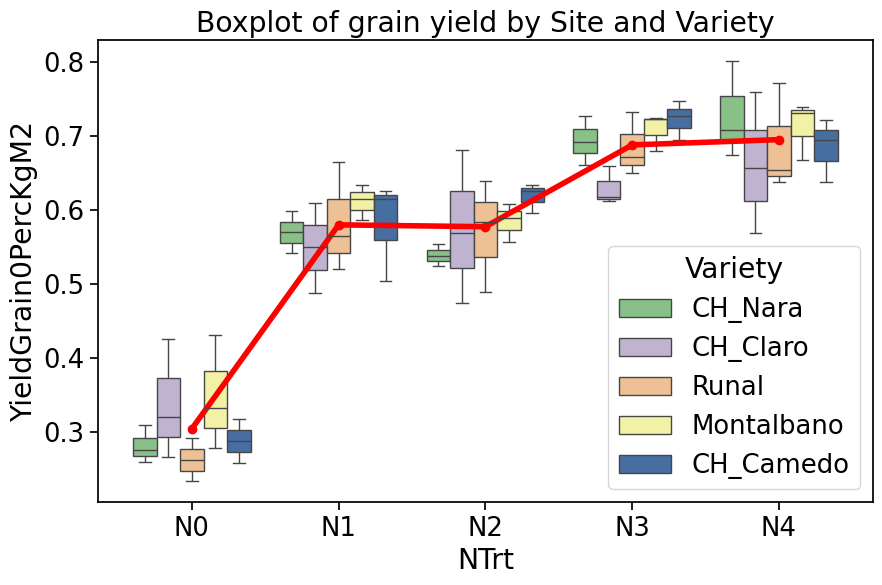

In [123]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(x="NTrt", y="YieldGrain0PercKgM2", hue="Variety", data=df_clean_CH, palette="Accent",order=ntrt_order)

# Calculate the average values per Ntrt (aggregating across varieties)
average_values = df_clean_CH.groupby('NTrt')['YieldGrain0PercKgM2'].mean().reindex(ntrt_order)

# Plot the trend line above the bar plot
plt.plot(ntrt_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Set plot title and labels
plt.title('Boxplot of grain yield by site and variety')


plt.show()

In [140]:
labels

['Trend Line']

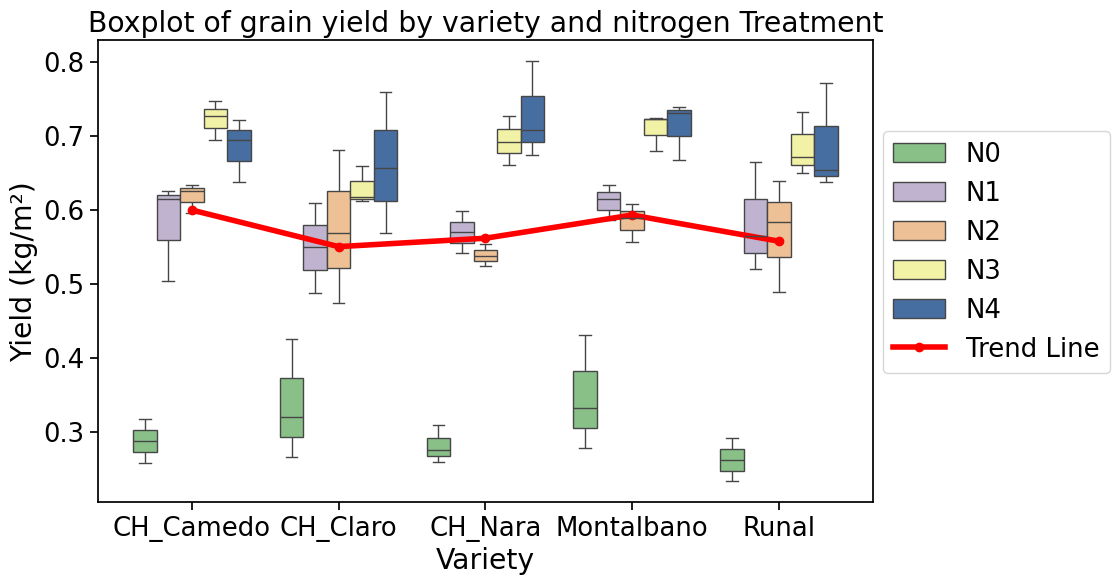

In [154]:
# Sort Variety
variety_order = sorted(df_clean_CH['Variety'].unique())

# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot
s = sns.boxplot(x="Variety", y="YieldGrain0PercKgM2", hue="NTrt", data=df_clean_CH, palette="Accent", order=variety_order,hue_order=ntrt_order, legend=True)

# Calculate the average values per Variety (aggregating across NTrt)
average_values = df_clean_CH.groupby('Variety')['YieldGrain0PercKgM2'].mean().reindex(variety_order)

# Plot the trend line above the box plot
plt.plot(variety_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Set plot title and labels
plt.title('Boxplot of grain yield by variety and nitrogen Treatment')
plt.xlabel('Variety')
plt.ylabel('Yield (kg/m²)')

# Create handles and labels for the varieties from the boxplot
handles, labels = s.get_legend_handles_labels()

# Add trend line handle
#handles.append(plt.Line2D([0], [0], color='red', marker='o', linestyle='-', markersize=8, label='Trend Line'))

# Create a custom legend outside the plot
plt.legend(handles=handles, labels=labels + ['Trend Line'], loc='upper right', bbox_to_anchor=(1.15, 0.75), bbox_transform=plt.gcf().transFigure)

# Show the plot
plt.show()

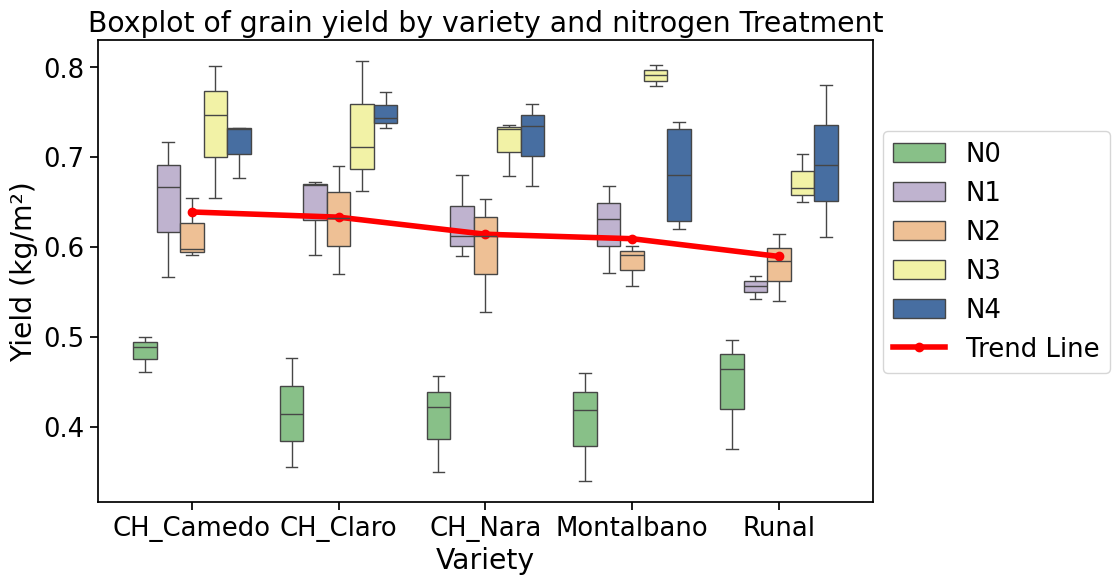

In [155]:
# Sort Variety
variety_order = sorted(df_clean_GO['Variety'].unique())

# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot
s = sns.boxplot(x="Variety", y="YieldGrain0PercKgM2", hue="NTrt", data=df_clean_GO, palette="Accent", order=variety_order,hue_order=ntrt_order, legend=True)

# Calculate the average values per Variety (aggregating across NTrt)
average_values = df_clean_GO.groupby('Variety')['YieldGrain0PercKgM2'].mean().reindex(variety_order)

# Plot the trend line above the box plot
plt.plot(variety_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Set plot title and labels
plt.title('Boxplot of grain yield by variety and nitrogen Treatment')
plt.xlabel('Variety')
plt.ylabel('Yield (kg/m²)')

# Create handles and labels for the varieties from the boxplot
handles, labels = s.get_legend_handles_labels()

# Add trend line handle
#handles.append(plt.Line2D([0], [0], color='red', marker='o', linestyle='-', markersize=8, label='Trend Line'))

# Create a custom legend outside the plot
plt.legend(handles=handles, labels=labels + ['Trend Line'], loc='upper right', bbox_to_anchor=(1.15, 0.75), bbox_transform=plt.gcf().transFigure)

# Show the plot
plt.show()

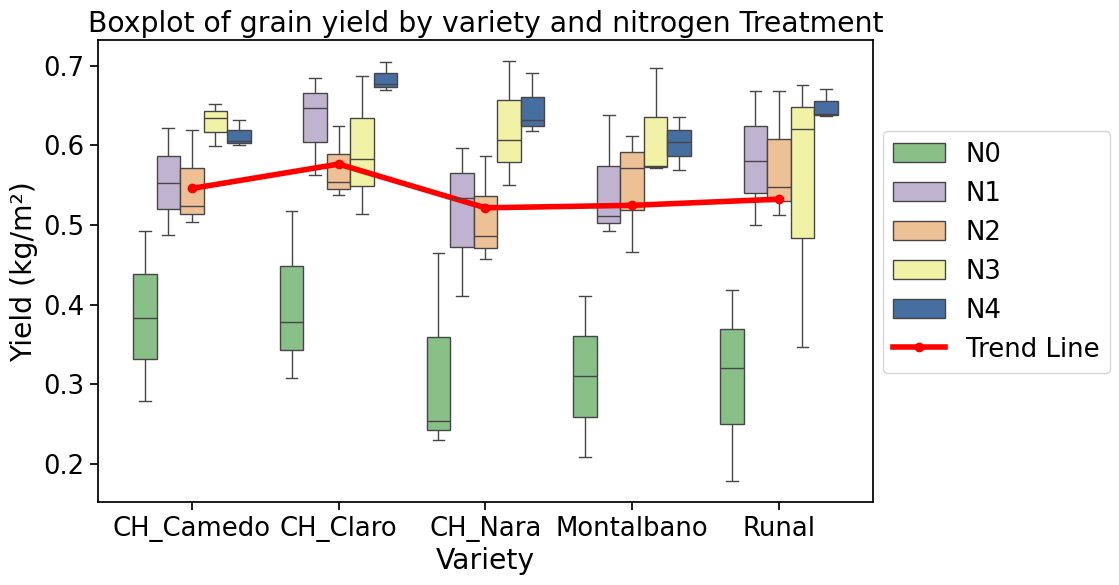

In [156]:
# Sort Variety
variety_order = sorted(df_clean_RE['Variety'].unique())

# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot
s = sns.boxplot(x="Variety", y="YieldGrain0PercKgM2", hue="NTrt", data=df_clean_RE, palette="Accent", order=variety_order,hue_order=ntrt_order, legend=True)

# Calculate the average values per Variety (aggregating across NTrt)
average_values = df_clean_RE.groupby('Variety')['YieldGrain0PercKgM2'].mean().reindex(variety_order)

# Plot the trend line above the box plot
plt.plot(variety_order, average_values, color='red', marker='o', linestyle='-', linewidth=4, label='Trend Line')

# Set plot title and labels
plt.title('Boxplot of grain yield by variety and nitrogen Treatment')
plt.xlabel('Variety')
plt.ylabel('Yield (kg/m²)')

# Create handles and labels for the varieties from the boxplot
handles, labels = s.get_legend_handles_labels()

# Add trend line handle
#handles.append(plt.Line2D([0], [0], color='red', marker='o', linestyle='-', markersize=8, label='Trend Line'))

# Create a custom legend outside the plot
plt.legend(handles=handles, labels=labels + ['Trend Line'], loc='upper right', bbox_to_anchor=(1.15, 0.75), bbox_transform=plt.gcf().transFigure)

# Show the plot
plt.show()

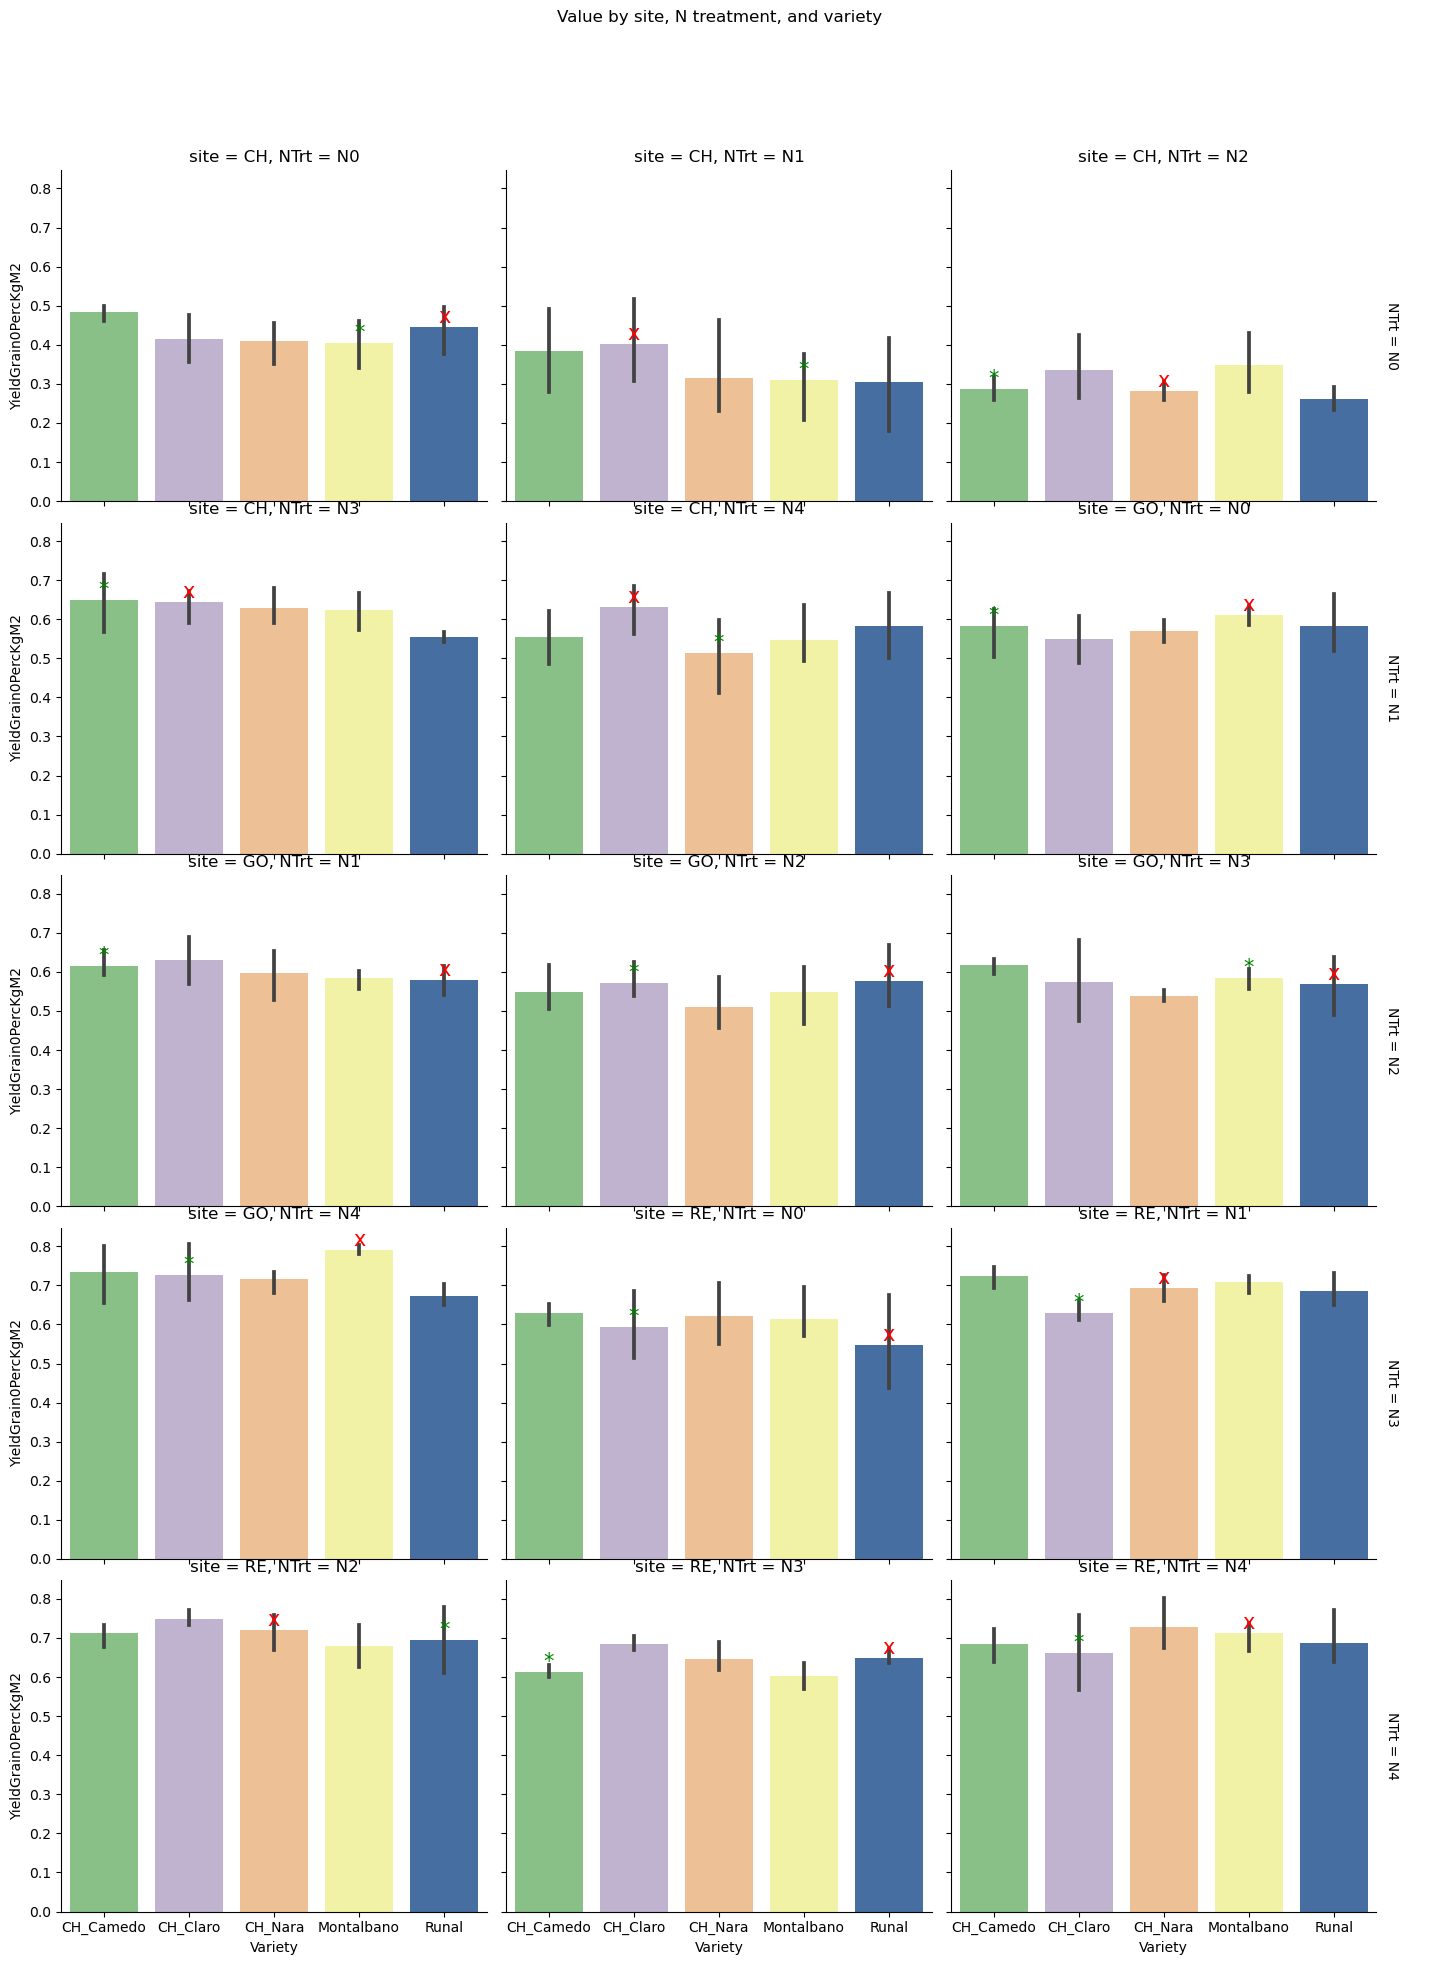

In [269]:
# Create FacetGrid for Site and Ntrt
# Drop rows where 'Variety' or 'YieldGrain0PercKgM2' has missing values
df_clean = df_Agro_WA_2021.dropna(subset=['Variety', 'YieldGrain0PercKgM2'])

# Sort Ntrt and Variety
ntrt_order = sorted(df_clean['NTrt'].unique())  # Sort Ntrt
variety_order = sorted(df_clean['Variety'].unique())  # Sort Variety

g = sns.FacetGrid(df_clean, col="site", row="NTrt", margin_titles=True, row_order= sorted(df_clean['NTrt'].unique()), height=4, aspect=1.2)

# Plot a barplot for Variety against Value in each grid
g.map(sns.barplot, "Variety", "YieldGrain0PercKgM2", order=sorted(df_Agro_WA_2021['Variety'].unique()),palette="Accent")

# Manually set the titles with both 'Site' and 'Ntrt'
for ax, (site, ntrt) in zip(g.axes.flat, df_clean.groupby(['site', 'NTrt']).size().index):
    # Set the title of each subplot explicitly
    ax.set_title(f"site = {site}, NTrt = {ntrt}")

# Group data by 'Site', 'Ntrt' to find best and worst 'Variety' by average yield
grouped = df_clean.groupby(['site', 'NTrt', 'Variety'])['YieldGrain0PercKgM2'].mean().reset_index()


# Loop through each axis in the grid
for ax in g.axes.flat:
    title = ax.get_title()
    # Split title to extract Site and Ntrt
    parts = title.split(',')
    site = parts[0].split('=')[1].strip()  # Extract Site
    ntrt = parts[1].split('=')[1].strip()  # Extract Ntrt
    
    # Filter the grouped data for the current facet (Site and Ntrt)
    subset = grouped[(grouped['site'] == site) & (grouped['NTrt'] == ntrt)]
    
    # Identify the best (highest) and worst (lowest) varieties
    best_variety = subset.loc[subset['YieldGrain0PercKgM2'].idxmax(), 'Variety']
    worst_variety = subset.loc[subset['YieldGrain0PercKgM2'].idxmin(), 'Variety']
    
    # Loop through each variety in the current axis
    for i, bar in enumerate(ax.patches):
        variety = variety_order[i]  # Get the variety name from the order
        
        # Get the height of the bar (yield)
        height = bar.get_height()
        
        # Add a star for the best variety
        if variety == best_variety:
            ax.text(bar.get_x() + bar.get_width() / 2, height, '*', ha='center', va='bottom', color='green', fontsize=15)
        
        # Add a cross for the worst variety
        if variety == worst_variety:
            ax.text(bar.get_x() + bar.get_width() / 2, height, 'x', ha='center', va='bottom', color='red', fontsize=15)



# Add titles and legend
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Value by site, N treatment, and variety')

plt.show()

In [166]:
df_clean_CH.head()
print(df_clean_CH[['ID','Experiment','Year','site','Variety', 'NTrt','YieldGrain0PercKgM2','BMflowDry','BMflowDry','TotNGrainGround']].head())

     ID          Experiment  Year site     Variety NTrt  YieldGrain0PercKgM2  \
364   1  WheatAdvisor_exact  2021   CH     CH_Nara   N4             0.708323   
365   2  WheatAdvisor_exact  2021   CH    CH_Claro   N0             0.319911   
366   3  WheatAdvisor_exact  2021   CH       Runal   N1             0.665302   
367   4  WheatAdvisor_exact  2021   CH  Montalbano   N1             0.586376   
369   6  WheatAdvisor_exact  2021   CH       Runal   N4             0.771605   

     BMflowDry  BMflowDry  TotNGrainGround  
364   1.444444   1.444444         2.341919  
365   0.577778   0.577778         1.974734  
366   1.377778   1.377778         2.110578  
367   1.011111   1.011111         1.887535  
369   1.522222   1.522222         2.646264  


In [167]:
df_clean_CH.head()
print(df_clean_GO[['ID','Experiment','Year','site','Variety', 'NTrt','YieldGrain0PercKgM2','BMflowDry','BMflowDry','TotNGrainGround']].head())

    ID          Experiment  Year site     Variety NTrt  YieldGrain0PercKgM2  \
64   1  WheatAdvisor_exact  2021   GO  Montalbano   N4             0.620691   
65   2  WheatAdvisor_exact  2021   GO    CH_Claro   N0             0.414331   
66   3  WheatAdvisor_exact  2021   GO   CH_Camedo   N4             0.676671   
67   4  WheatAdvisor_exact  2021   GO     CH_Nara   N4             0.668456   
68   5  WheatAdvisor_exact  2021   GO       Runal   N0             0.375471   

    BMflowDry  BMflowDry  TotNGrainGround  
64   1.755556   1.755556         2.359133  
65   1.177778   1.177778         1.945523  
66   2.022222   2.022222         2.588087  
67   1.711111   1.711111         2.425046  
68   1.233333   1.233333         1.939422  


In [168]:
df_clean_CH.head()
print(df_clean_RE[['ID','Experiment','Year','site','Variety', 'NTrt','YieldGrain0PercKgM2','BMflowDry','BMflowDry','TotNGrainGround']].head())

     ID          Experiment  Year site     Variety NTrt  YieldGrain0PercKgM2  \
139   1  WheatAdvisor_exact  2021   RE    CH_Claro   N0             0.378502   
140   2  WheatAdvisor_exact  2021   RE  Montalbano   N0             0.208430   
141   3  WheatAdvisor_exact  2021   RE       Runal   N0             0.178234   
142   4  WheatAdvisor_exact  2021   RE   CH_Camedo   N0             0.278872   
143   5  WheatAdvisor_exact  2021   RE     CH_Nara   N0             0.254449   

     BMflowDry  BMflowDry  TotNGrainGround  
139   0.612403   0.612403         2.070925  
140   0.472868   0.472868         2.018524  
141   0.682171   0.682171         2.233012  
142   0.503876   0.503876         1.909466  
143   0.581395   0.581395         2.048005  


In [169]:
import seaborn as sns

In [167]:
pip install seaborn --upgrade

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.8 MB 19.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 12.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\vuill\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [175]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\206102449.py:13: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)
C:\Users\vuill\AppData\Local\Temp\ipykernel_30964\206102449.py:13: SyntaxWarning: invalid escape sequence '\d'
  df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)


KeyboardInterrupt: 

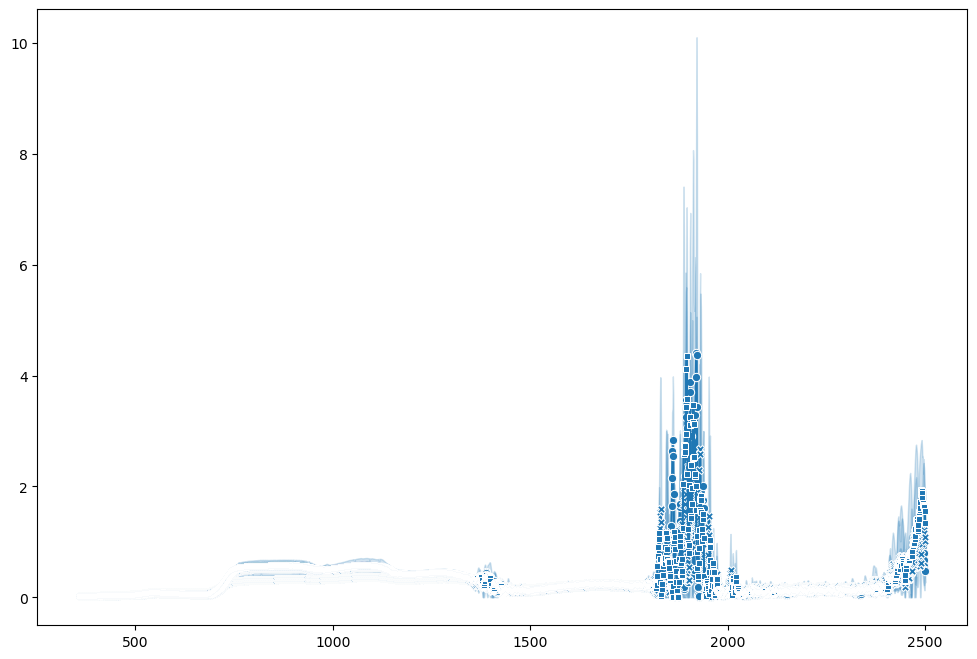

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df and has columns like ['Variety', 'Nitrogen_Treatment', 'rflt_359', 'rflt_360', ..., 'rflt_1000']

# Step 1: Reshape the dataframe using pd.melt()
# This step will convert the reflectance columns into rows with corresponding wavelength and reflectance values.
df_melted = pd.melt(merged_df_AfterAnthesis_2021_CH, id_vars=['Variety', 'NTrt'], 
                    var_name='Wavelength', value_name='Reflectance')

# Step 2: Extract the numeric part of the 'Wavelength' column to get the actual wavelengths
df_melted['Wavelength'] = df_melted['Wavelength'].str.extract('(\d+)').astype(int)

# Step 3: Plot the data using seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Wavelength', y='Reflectance', 
             hue='Variety', style='NTrt', markers=True, dashes=False)

# Step 4: Customize the plot
plt.title('Spectral Signature of Wheat Varieties under Different Nitrogen Treatments')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.legend(title='Variety & Nitrogen Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [101]:
WL=merged_df.iloc[:,1:2146]   
WL.head()

CropStage  rflt_359  rflt_360  rflt_361  rflt_362  rflt_363  rflt_364  \
0  Before1stN  0.046567  0.046704  0.046859  0.047021  0.047168  0.047302   
1  Before1stN  0.042753  0.042765  0.042799  0.042936  0.043066  0.043191   
2  Before1stN  0.042900  0.043016  0.043135  0.043239  0.043332  0.043426   
3  Before1stN  0.046715  0.046834  0.046948  0.047058  0.047181  0.047306   
4  Before1stN  0.045033  0.045197  0.045369  0.045534  0.045663  0.045775   

   rflt_365  rflt_366  rflt_367  ...  rflt_2493  rflt_2494  rflt_2495  \
0  0.047417  0.047545  0.047706  ...   1.118453   0.991645   0.781112   
1  0.043307  0.043424  0.043556  ...   1.192672   1.151842   1.095079   
2  0.043546  0.043660  0.043777  ...   0.181730   0.177406   0.145330   
3  0.047412  0.047560  0.047743  ...   0.988344   0.793460   0.499411   
4  0.045909  0.046005  0.046099  ...   1.544480   1.344946   1.096752   

   rflt_2496  rflt_2497  rflt_2498  rflt_2499  rflt_2500      date  site  
0   0.555108   0.503799   0.595473   0.725592   0.898742  20210219    CH  
1   1.035165   1.025958   1.058941   1.061023   1.012180  20210219    CH  
2   0.117168   0.169604   0.290346   0.394486   0.466533  20210219    CH  
3   0.214361   0.235756   0.516004   0.717842   0.796984  20210219    CH  
4   0.852687   0.796600   0.899228   0.933204   0.854493  20210219    CH  

[5 rows x 2145 columns]

In [35]:
Y=merged_df[['YieldGrain0PercKgM2', 'Variety','site', 'NTrt','Year']]
print(Y)

      YieldGrain0PercKgM2     Variety site NTrt  Year
0                0.708323     CH_Nara   CH   N4  2021
1                0.319911    CH_Claro   CH   N0  2021
2                0.665302       Runal   CH   N1  2021
3                0.586376  Montalbano   CH   N1  2021
4                     NaN     CH_Nara   CH   N1  2021
...                   ...         ...  ...  ...   ...
2815             0.779080    CH_Claro   RE   N2  2022
2816             0.766578       Runal   RE   N3  2022
2817             0.806605  Montalbano   RE   N4  2022
2818             0.656806   CH_Camedo   RE   N0  2022
2819             0.797065     CH_Nara   RE   N1  2022

[2820 rows x 5 columns]


In [37]:
# 2. Concatenate Horizontally (column-wise)
df_horizontal = pd.concat([WL, Y], axis=1)
print("\nHorizontal Concatenation:\n", df_horizontal)


Horizontal Concatenation:
       rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  rflt_356  \
0     0.046091  0.046062  0.046056  0.046075  0.046130  0.046203  0.046288   
1     0.041327  0.041489  0.041671  0.041870  0.042087  0.042264  0.042406   
2     0.042755  0.042691  0.042646  0.042616  0.042595  0.042603  0.042642   
3     0.045935  0.045978  0.046029  0.046090  0.046152  0.046250  0.046371   
4     0.044563  0.044477  0.044460  0.044484  0.044503  0.044559  0.044651   
...        ...       ...       ...       ...       ...       ...       ...   
2815  0.028401  0.028376  0.028366  0.028367  0.028369  0.028383  0.028414   
2816  0.024849  0.024808  0.024783  0.024772  0.024768  0.024790  0.024834   
2817  0.011556  0.011533  0.011529  0.011534  0.011531  0.011535  0.011545   
2818  0.048255  0.048227  0.048212  0.048209  0.048212  0.048245  0.048307   
2819  0.029320  0.029301  0.029294  0.029297  0.029307  0.029320  0.029338   

      rflt_357  rflt_358  rflt_359 

In [39]:
df_horizontal.dropna(axis=0,inplace=True)

In [41]:
df_horizontal

rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  rflt_356  \
0     0.046091  0.046062  0.046056  0.046075  0.046130  0.046203  0.046288   
1     0.041327  0.041489  0.041671  0.041870  0.042087  0.042264  0.042406   
2     0.042755  0.042691  0.042646  0.042616  0.042595  0.042603  0.042642   
3     0.045935  0.045978  0.046029  0.046090  0.046152  0.046250  0.046371   
5     0.043600  0.043523  0.043496  0.043513  0.043569  0.043642  0.043721   
...        ...       ...       ...       ...       ...       ...       ...   
2815  0.028401  0.028376  0.028366  0.028367  0.028369  0.028383  0.028414   
2816  0.024849  0.024808  0.024783  0.024772  0.024768  0.024790  0.024834   
2817  0.011556  0.011533  0.011529  0.011534  0.011531  0.011535  0.011545   
2818  0.048255  0.048227  0.048212  0.048209  0.048212  0.048245  0.048307   
2819  0.029320  0.029301  0.029294  0.029297  0.029307  0.029320  0.029338   

      rflt_357  rflt_358  rflt_359  ...  rflt_2485  rflt_2486  rflt_2487  \
0     0.046373  0.046465  0.046567  ...   0.589646   0.627412   0.748824   
1     0.042540  0.042657  0.042753  ...   0.568014   0.615221   0.723582   
2     0.042721  0.042810  0.042900  ...   0.000000   0.045969   0.189569   
3     0.046471  0.046584  0.046715  ...   1.543602   1.636591   1.717620   
5     0.043766  0.043834  0.043942  ...   0.059004   0.158233   0.322989   
...        ...       ...       ...  ...        ...        ...        ...   
2815  0.028477  0.028555  0.028646  ...   0.378155   0.399413   0.412772   
2816  0.024891  0.024966  0.025060  ...   0.296801   0.286276   0.268564   
2817  0.011559  0.011572  0.011583  ...   0.059568   0.081647   0.106238   
2818  0.048402  0.048508  0.048618  ...   0.387521   0.398731   0.405973   
2819  0.029367  0.029401  0.029436  ...   0.239542   0.271365   0.297000   

      rflt_2488  rflt_2489  YieldGrain0PercKgM2     Variety  site  NTrt  Year  
0      0.883311   1.039108             0.708323     CH_Nara    CH    N4  2021  
1      0.866173   1.040084             0.319911    CH_Claro    CH    N0  2021  
2      0.244184   0.248869             0.665302       Runal    CH    N1  2021  
3      1.677403   1.549791             0.586376  Montalbano    CH    N1  2021  
5      0.428546   0.506218             0.771605       Runal    CH    N4  2021  
...         ...        ...                  ...         ...   ...   ...   ...  
2815   0.415160   0.408295             0.779080    CH_Claro    RE    N2  2022  
2816   0.267746   0.277159             0.766578       Runal    RE    N3  2022  
2817   0.112872   0.107857             0.806605  Montalbano    RE    N4  2022  
2818   0.415206   0.424864             0.656806   CH_Camedo    RE    N0  2022  
2819   0.309011   0.310287             0.797065     CH_Nara    RE    N1  2022  

[2573 rows x 2145 columns]

In [43]:
WL_final=df_horizontal.iloc[:,0:2140]  
WL_final.head()

rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  rflt_356  \
0  0.046091  0.046062  0.046056  0.046075  0.046130  0.046203  0.046288   
1  0.041327  0.041489  0.041671  0.041870  0.042087  0.042264  0.042406   
2  0.042755  0.042691  0.042646  0.042616  0.042595  0.042603  0.042642   
3  0.045935  0.045978  0.046029  0.046090  0.046152  0.046250  0.046371   
5  0.043600  0.043523  0.043496  0.043513  0.043569  0.043642  0.043721   

   rflt_357  rflt_358  rflt_359  ...  rflt_2480  rflt_2481  rflt_2482  \
0  0.046373  0.046465  0.046567  ...   1.014235   1.013253   0.958736   
1  0.042540  0.042657  0.042753  ...   0.784522   0.706198   0.719951   
2  0.042721  0.042810  0.042900  ...   0.460442   0.403427   0.317279   
3  0.046471  0.046584  0.046715  ...   1.141034   1.207110   1.333163   
5  0.043766  0.043834  0.043942  ...   0.383837   0.292498   0.248635   

   rflt_2483  rflt_2484  rflt_2485  rflt_2486  rflt_2487  rflt_2488  rflt_2489  
0   0.868688   0.708847   0.589646   0.627412   0.748824   0.883311   1.039108  
1   0.710940   0.626549   0.568014   0.615221   0.723582   0.866173   1.040084  
2   0.215524   0.068530   0.000000   0.045969   0.189569   0.244184   0.248869  
3   1.437535   1.493361   1.543602   1.636591   1.717620   1.677403   1.549791  
5   0.199117   0.105662   0.059004   0.158233   0.322989   0.428546   0.506218  

[5 rows x 2140 columns]

In [45]:
WL_final.shape

(2573, 2140)

In [47]:
type(WL_final)
WL_final_array = WL_final.to_numpy()  # or df.values
type(WL_final_array)

numpy.ndarray

In [49]:
Y_final=df_horizontal.iloc[:,2140:2145]  
Y_final.head()

YieldGrain0PercKgM2     Variety site NTrt  Year
0             0.708323     CH_Nara   CH   N4  2021
1             0.319911    CH_Claro   CH   N0  2021
2             0.665302       Runal   CH   N1  2021
3             0.586376  Montalbano   CH   N1  2021
5             0.771605       Runal   CH   N4  2021

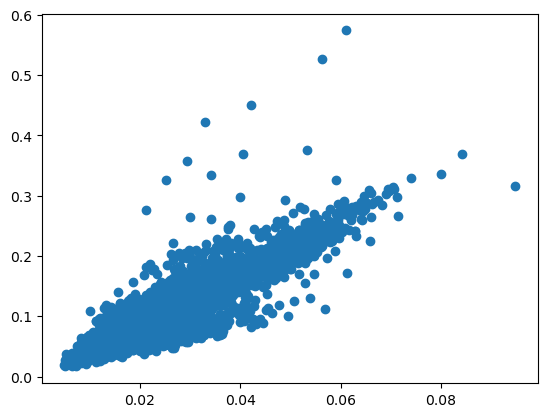

In [51]:
plt.plot(WL_final_array[:,0], WL_final_array[:,250],'o')

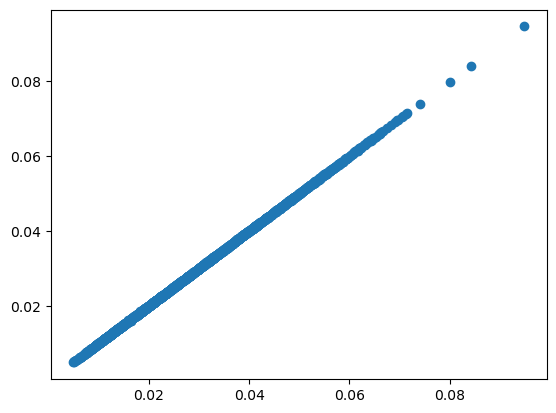

In [53]:
plt.plot(WL_final_array[:,0], WL_final_array[:,2],'o')

In [55]:
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from matplotlib import  pyplot as plt
import seaborn as sns
#sns.set()

from time import time as timer
from imageio import imread
import pandas as pd
import numpy as np
import os

from sklearn.manifold import TSNE

import tensorflow as tf
import tarfile

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

In [56]:
import umap

In [58]:
if not os.path.exists('data'):
    path = os.path.abspath('.')+'/colab_material.tgz'
    tf.keras.utils.get_file(path, 'https://github.com/neworldemancer/DSF5/raw/master/colab_material.tgz')
    tar = tarfile.open(path, "r:gz")
    tar.extractall()
    tar.close()

In [59]:
from utils.routines import *

In [61]:
tsne_model = TSNE(perplexity=30, n_components=2, learning_rate=200, early_exaggeration=4.0,init='pca',
                      n_iter=2000, random_state=2233212, metric='euclidean', verbose=100 )

umap_model = umap.UMAP(n_neighbors=30, n_components=2, random_state=1711)

In [65]:
tsne_model = TSNE(perplexity=30, n_components=2, learning_rate=200, early_exaggeration=4.0,init='pca',
                      n_iter=300, random_state=2233212, metric='euclidean', verbose=1 )

tsne_heart = tsne_model.fit_transform(WL_final_array)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2573 samples in 0.044s...
[t-SNE] Computed neighbors for 2573 samples in 1.297s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2573
[t-SNE] Computed conditional probabilities for sample 2000 / 2573
[t-SNE] Computed conditional probabilities for sample 2573 / 2573
[t-SNE] Mean sigma: 1.364014
[t-SNE] KL divergence after 250 iterations with early exaggeration: 18.564898
[t-SNE] KL divergence after 300 iterations: 1.910766


In [66]:
import numpy as np
from sklearn.manifold import TSNE
from utils.routines import *
import matplotlib.pyplot as plt

tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, verbose=1)

tsne_heart = tsne_model.fit_transform(WL_final_array)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 2573 samples in 0.060s...
[t-SNE] Computed neighbors for 2573 samples in 0.687s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2573
[t-SNE] Computed conditional probabilities for sample 2000 / 2573
[t-SNE] Computed conditional probabilities for sample 2573 / 2573
[t-SNE] Mean sigma: 0.644494
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.301888
[t-SNE] KL divergence after 1000 iterations: 1.656855


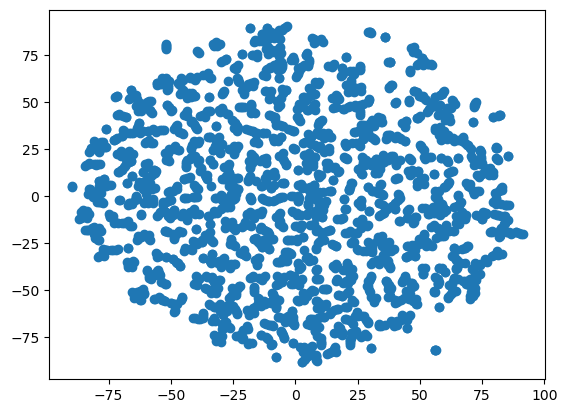

In [69]:
plt.scatter(tsne_heart[:,0],tsne_heart[:,1])
plt.show()

In [71]:
data= load_ex2_data_pca(seed=1235, n_add=20)

tsne_model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10, verbose=1)

tsne_heart = tsne_model.fit_transform(WL_final_array)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2573 samples in 0.038s...
[t-SNE] Computed neighbors for 2573 samples in 0.422s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2573
[t-SNE] Computed conditional probabilities for sample 2000 / 2573
[t-SNE] Computed conditional probabilities for sample 2573 / 2573
[t-SNE] Mean sigma: 1.014301
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.124695
[t-SNE] KL divergence after 1000 iterations: 1.802568


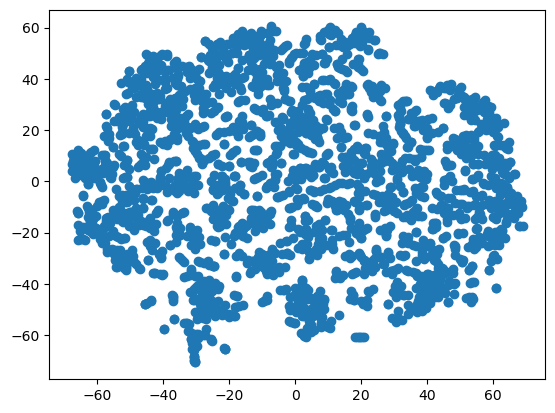

In [72]:
plt.scatter(tsne_heart[:,0],tsne_heart[:,1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


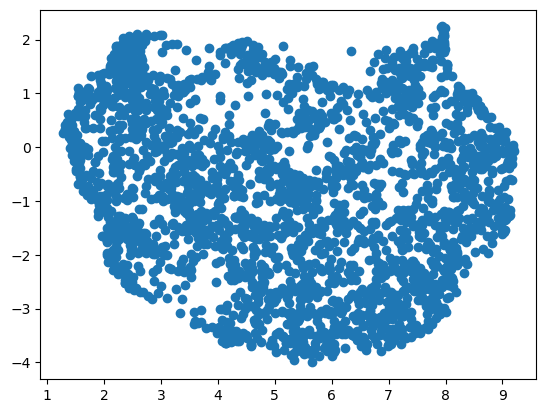

In [75]:
umap_model = umap.UMAP(n_neighbors=50, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


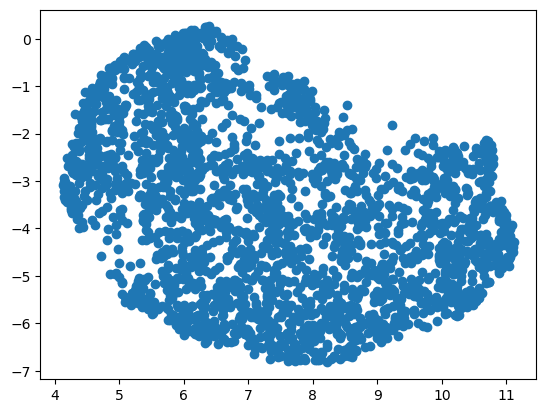

In [77]:
umap_model = umap.UMAP(n_neighbors=100, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


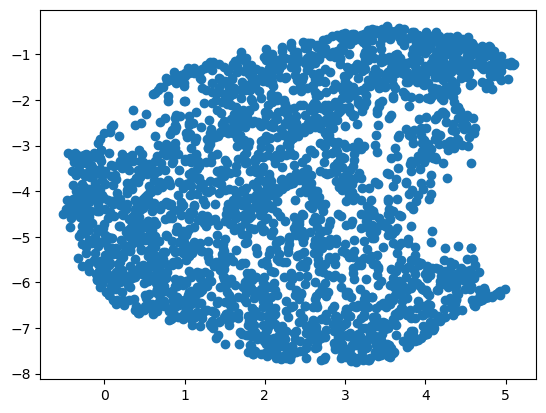

In [79]:
umap_model = umap.UMAP(n_neighbors=200, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


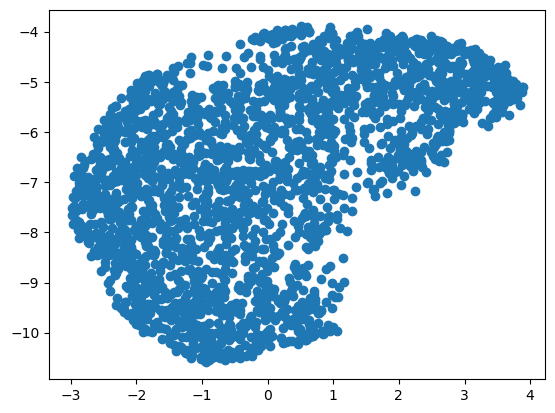

In [81]:
umap_model = umap.UMAP(n_neighbors=400, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


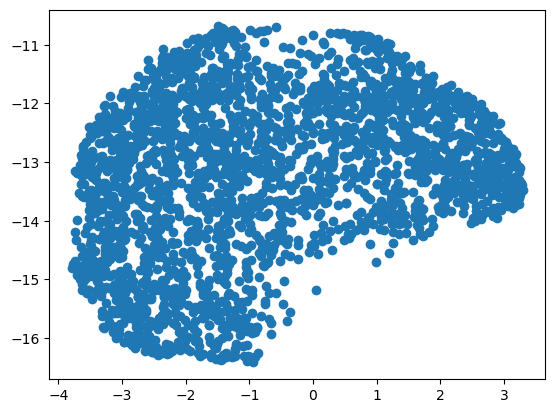

In [83]:
umap_model = umap.UMAP(n_neighbors=800, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


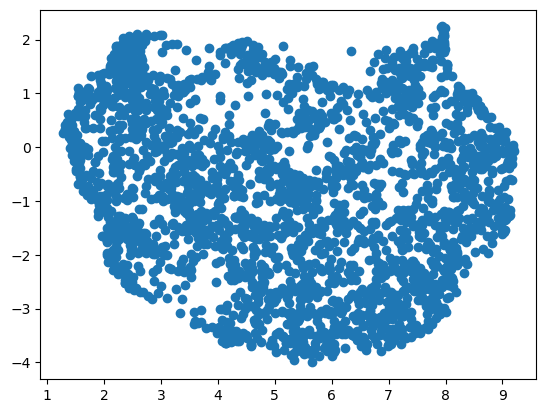

In [85]:
umap_model = umap.UMAP(n_neighbors=50, n_components=2, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


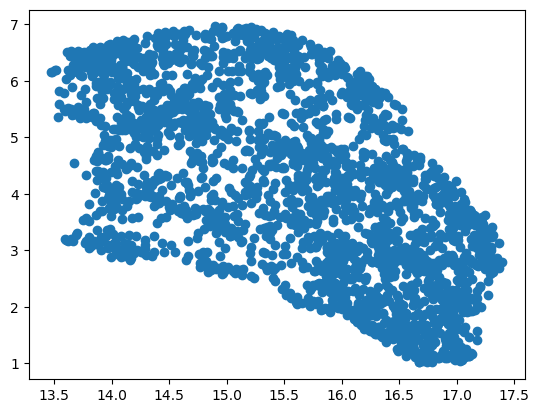

In [87]:
umap_model = umap.UMAP(n_neighbors=50, n_components=3, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


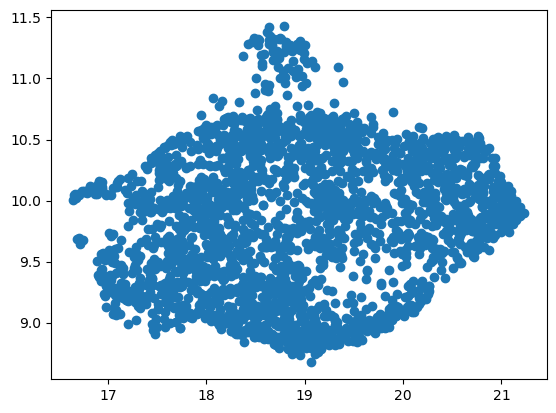

In [89]:
umap_model = umap.UMAP(n_neighbors=50, n_components=5, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


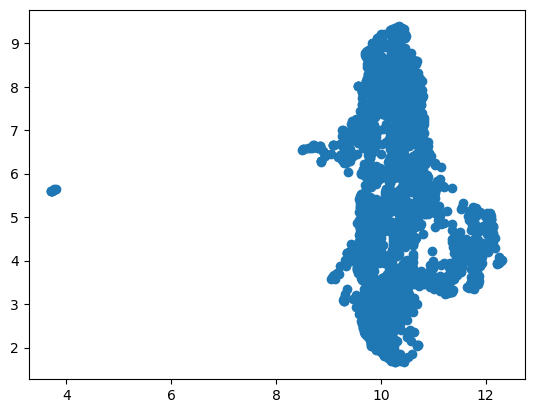

In [99]:
umap_model = umap.UMAP(n_neighbors=5, n_components=5, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


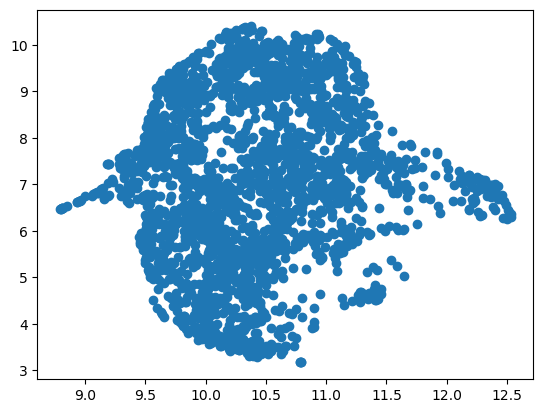

In [101]:
umap_model = umap.UMAP(n_neighbors=10, n_components=5, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


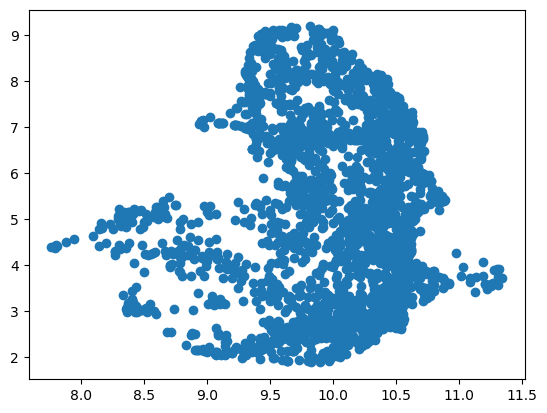

In [103]:
umap_model = umap.UMAP(n_neighbors=6, n_components=5, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


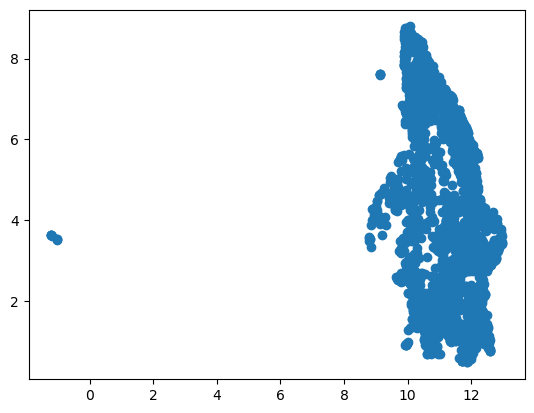

In [105]:
umap_model = umap.UMAP(n_neighbors=4, n_components=5, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


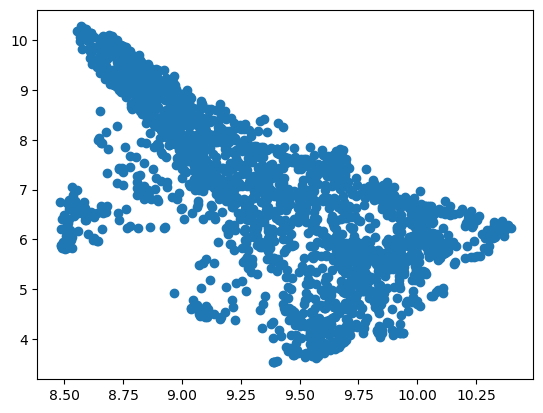

In [201]:
umap_model = umap.UMAP(n_neighbors=10, n_components=10, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

In [193]:
labels=Y_final['site']
labels

0       CH
1       CH
2       CH
3       CH
5       CH
        ..
2815    RE
2816    RE
2817    RE
2818    RE
2819    RE
Name: site, Length: 2573, dtype: object

In [199]:
Y_final_array = labels.to_numpy()  # or df.values
Y_final_array

array(['CH', 'CH', 'CH', ..., 'RE', 'RE', 'RE'], dtype=object)

In [51]:
WL_final.head()

rflt_350  rflt_351  rflt_352  rflt_353  rflt_354  rflt_355  rflt_356  \
0  0.046091  0.046062  0.046056  0.046075  0.046130  0.046203  0.046288   
1  0.041327  0.041489  0.041671  0.041870  0.042087  0.042264  0.042406   
2  0.042755  0.042691  0.042646  0.042616  0.042595  0.042603  0.042642   
3  0.045935  0.045978  0.046029  0.046090  0.046152  0.046250  0.046371   
5  0.043600  0.043523  0.043496  0.043513  0.043569  0.043642  0.043721   

   rflt_357  rflt_358  rflt_359  ...  rflt_2480  rflt_2481  rflt_2482  \
0  0.046373  0.046465  0.046567  ...   1.014235   1.013253   0.958736   
1  0.042540  0.042657  0.042753  ...   0.784522   0.706198   0.719951   
2  0.042721  0.042810  0.042900  ...   0.460442   0.403427   0.317279   
3  0.046471  0.046584  0.046715  ...   1.141034   1.207110   1.333163   
5  0.043766  0.043834  0.043942  ...   0.383837   0.292498   0.248635   

   rflt_2483  rflt_2484  rflt_2485  rflt_2486  rflt_2487  rflt_2488  rflt_2489  
0   0.868688   0.708847   0.589646   0.627412   0.748824   0.883311   1.039108  
1   0.710940   0.626549   0.568014   0.615221   0.723582   0.866173   1.040084  
2   0.215524   0.068530   0.000000   0.045969   0.189569   0.244184   0.248869  
3   1.437535   1.493361   1.543602   1.636591   1.717620   1.677403   1.549791  
5   0.199117   0.105662   0.059004   0.158233   0.322989   0.428546   0.506218  

[5 rows x 2140 columns]

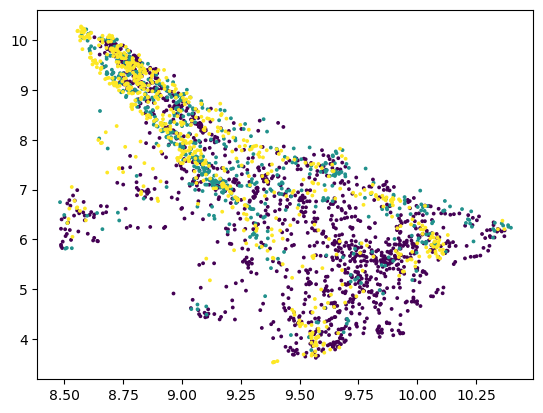

In [215]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert labels to numbers using LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

plt.scatter(umap_hart[:, 0], umap_hart[:, 1], c=numeric_labels, s=3)
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


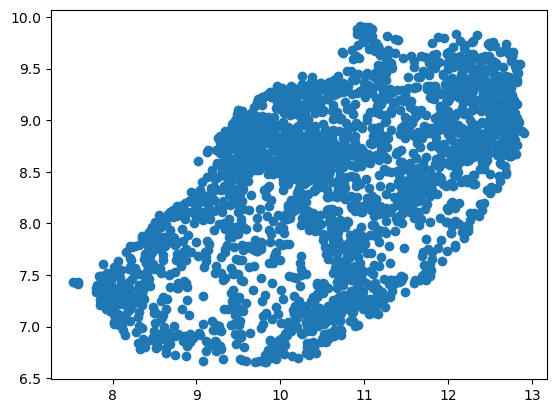

In [91]:
umap_model = umap.UMAP(n_neighbors=20, n_components=10, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


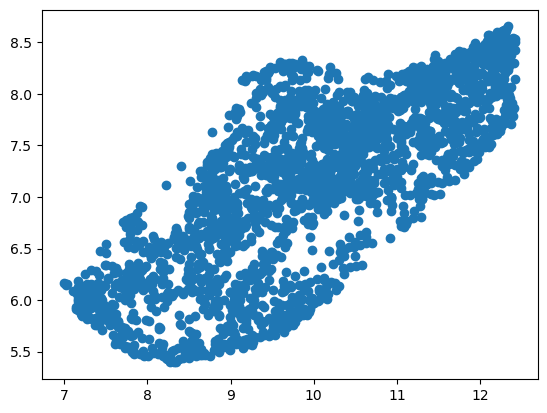

In [93]:
umap_model = umap.UMAP(n_neighbors=20, n_components=20, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


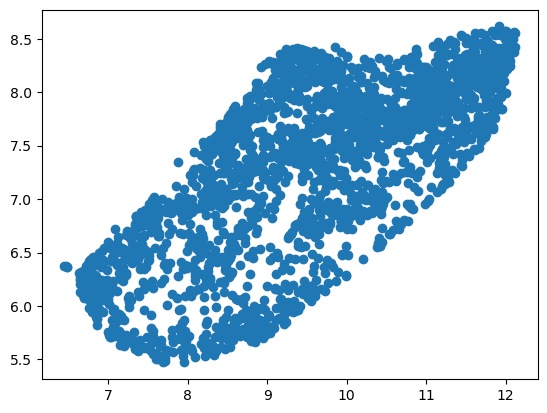

In [95]:
umap_model = umap.UMAP(n_neighbors=20, n_components=40, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()

C:\Users\vuill\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


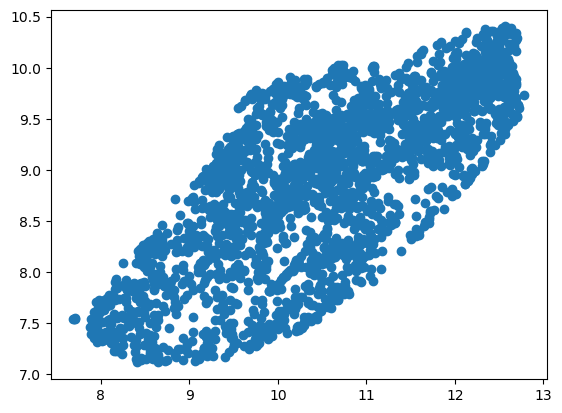

In [97]:
umap_model = umap.UMAP(n_neighbors=20, n_components=80, random_state=1711)

umap_hart = umap_model.fit_transform(WL_final_array)
plt.scatter(umap_hart[:, 0], umap_hart[:, 1])
plt.show()